# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:00:18.454174: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:00:22.025971
2025-04-14 21:00:22.025971


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:00:15"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

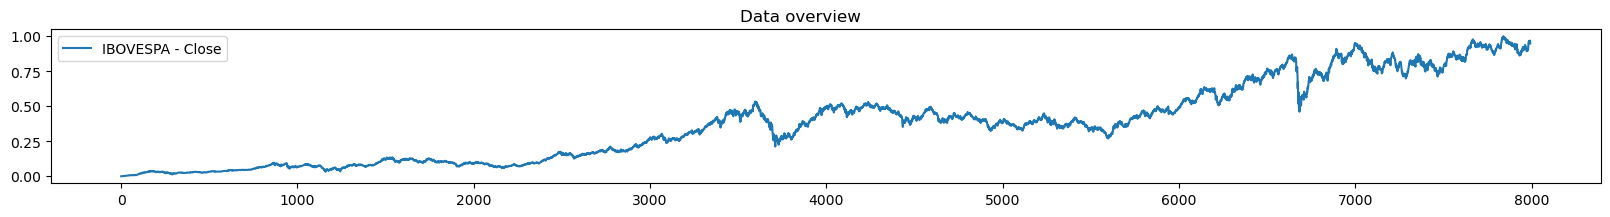

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

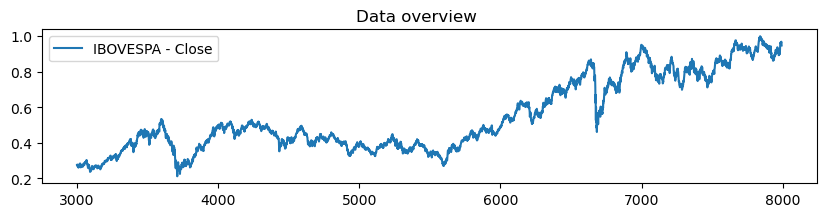

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

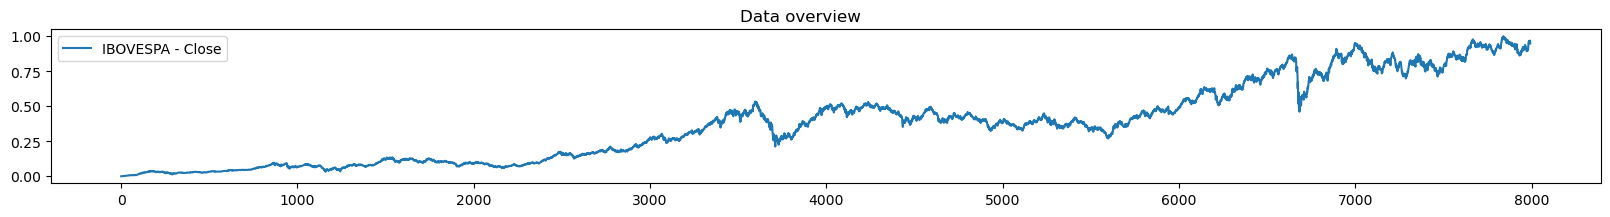

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

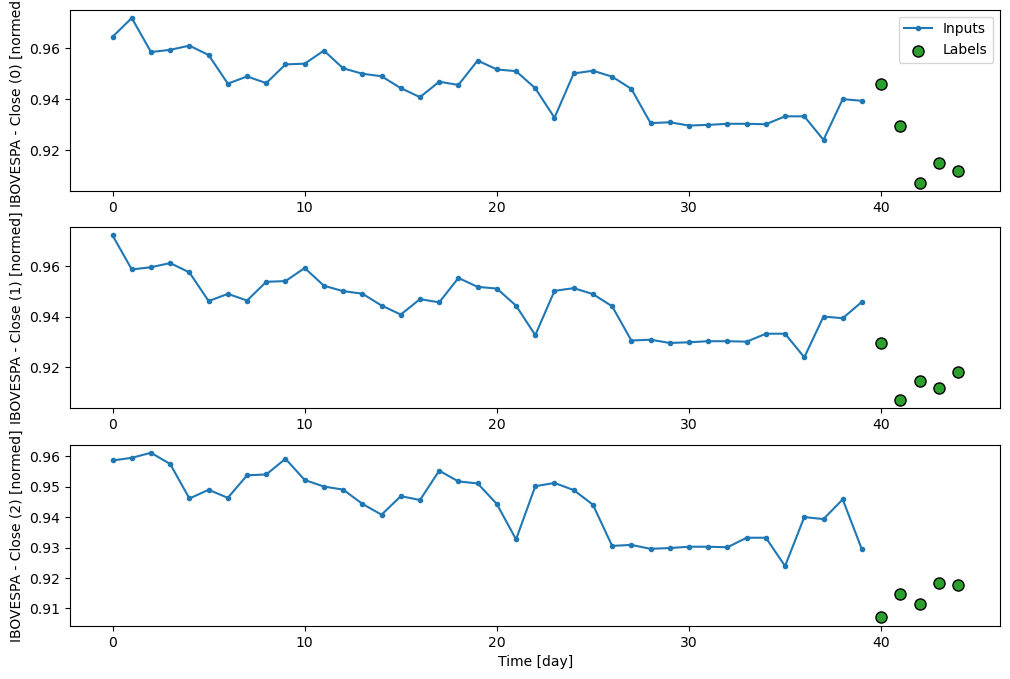

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12:00 3s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 66.1438 - mean_squared_error: 5.5675e-05 - root_mean_squared_error: 0.0074  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 54.1490 - mean_squared_error: 5.6744e-05 - root_mean_squared_error: 0.0075

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 50.8137 - mean_squared_error: 7.2071e-05 - root_mean_squared_error: 0.0083

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 48.6502 - mean_squared_error: 8.2652e-05 - root_mean_squared_error: 0.0089

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 46.4588 - mean_squared_error: 8.6374e-05 - root_mean_squared_error: 0.0091

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 44.4822 - mean_squared_error: 8.7794e-05 - root_mean_squared_error: 0.0092

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 42.5903 - mean_squared_error: 8.7552e-05 - root_mean_squared_error: 0.0092

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 40.9127 - mean_squared_error: 8.7862e-05 - root_mean_squared_error: 0.0093

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 39.5584 - mean_squared_error: 9.3233e-05 - root_mean_squared_error: 0.0095

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 38.4166 - mean_squared_error: 9.9399e-05 - root_mean_squared_error: 0.0098

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 37.0541 - mean_squared_error: 1.0620e-04 - root_mean_squared_error: 0.0101

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.2063 - mean_squared_error: 1.1081e-04 - root_mean_squared_error: 0.0104

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.2588 - mean_squared_error: 1.1828e-04 - root_mean_squared_error: 0.0107

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.5942 - mean_squared_error: 1.2322e-04 - root_mean_squared_error: 0.0109

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.9782 - mean_squared_error: 1.2876e-04 - root_mean_squared_error: 0.0111

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.4262 - mean_squared_error: 1.3577e-04 - root_mean_squared_error: 0.0114

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 32.8854 - mean_squared_error: 1.4169e-04 - root_mean_squared_error: 0.0116

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 32.1938 - mean_squared_error: 1.4842e-04 - root_mean_squared_error: 0.0119

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 31.7252 - mean_squared_error: 1.5330e-04 - root_mean_squared_error: 0.0121

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 31.2644 - mean_squared_error: 1.5732e-04 - root_mean_squared_error: 0.0122

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 30.8261 - mean_squared_error: 1.6072e-04 - root_mean_squared_error: 0.0124

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 30.4166 - mean_squared_error: 1.6375e-04 - root_mean_squared_error: 0.0125

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 30.0550 - mean_squared_error: 1.6737e-04 - root_mean_squared_error: 0.0126

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 29.7400 - mean_squared_error: 1.7275e-04 - root_mean_squared_error: 0.0128

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 29.4610 - mean_squared_error: 1.8084e-04 - root_mean_squared_error: 0.0131

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 29.1956 - mean_squared_error: 1.8891e-04 - root_mean_squared_error: 0.0133

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 28.8488 - mean_squared_error: 1.9896e-04 - root_mean_squared_error: 0.0137

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 28.5933 - mean_squared_error: 2.0608e-04 - root_mean_squared_error: 0.0139

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 28.3356 - mean_squared_error: 2.1241e-04 - root_mean_squared_error: 0.0141

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 27.9957 - mean_squared_error: 2.2044e-04 - root_mean_squared_error: 0.0143

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 27.7455 - mean_squared_error: 2.2630e-04 - root_mean_squared_error: 0.0145

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 27.5058 - mean_squared_error: 2.3354e-04 - root_mean_squared_error: 0.0147

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 27.2733 - mean_squared_error: 2.4155e-04 - root_mean_squared_error: 0.0149

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 27.0463 - mean_squared_error: 2.5056e-04 - root_mean_squared_error: 0.0152

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 26.8203 - mean_squared_error: 2.5904e-04 - root_mean_squared_error: 0.0154

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 26.6005 - mean_squared_error: 2.6893e-04 - root_mean_squared_error: 0.0157

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 26.4126 - mean_squared_error: 2.9272e-04 - root_mean_squared_error: 0.0162

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 26.2408 - mean_squared_error: 3.2050e-04 - root_mean_squared_error: 0.0167

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 26.0776 - mean_squared_error: 3.5106e-04 - root_mean_squared_error: 0.0173

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 25.9312 - mean_squared_error: 3.9571e-04 - root_mean_squared_error: 0.0180

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 25.7977 - mean_squared_error: 4.5021e-04 - root_mean_squared_error: 0.0188

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 25.6703 - mean_squared_error: 5.0598e-04 - root_mean_squared_error: 0.0196

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 25.5440 - mean_squared_error: 5.5992e-04 - root_mean_squared_error: 0.0203

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 25.4255 - mean_squared_error: 6.1634e-04 - root_mean_squared_error: 0.0211

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 25.3132 - mean_squared_error: 6.7344e-04 - root_mean_squared_error: 0.0219

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 25.2011 - mean_squared_error: 7.2777e-04 - root_mean_squared_error: 0.0226

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 25.0877 - mean_squared_error: 7.7895e-04 - root_mean_squared_error: 0.0233

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 24.9726 - mean_squared_error: 8.2700e-04 - root_mean_squared_error: 0.0240

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 24.8585 - mean_squared_error: 8.7278e-04 - root_mean_squared_error: 0.0246

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 24.7486 - mean_squared_error: 9.1753e-04 - root_mean_squared_error: 0.0252

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 24.6394 - mean_squared_error: 9.5994e-04 - root_mean_squared_error: 0.0258

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 24.5308 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0264    

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 24.4248 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0269

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 24.3188 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0274

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 24.2129 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 24.1101 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0284

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 24.0104 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0289

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 23.9111 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 23.8146 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 23.7210 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 23.6299 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 23.5410 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0310

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 23.4529 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 23.3649 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0318

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 23.2766 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0322

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 23.1878 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0326

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 23.0983 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 23.0132 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0333

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 22.9302 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 22.8483 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 22.7686 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 22.6899 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 22.6109 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 22.5320 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 22.4530 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 22.3739 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0365

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 22.2951 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 22.2692 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0369 - val_loss: 0.0681 - val_mean_absolute_error: 0.0681 - val_mean_absolute_percentage_error: 7.2169 - val_mean_squared_error: 0.0052 - val_root_mean_squared_error: 0.0721 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.5897 - mean_absolute_error: 0.5897 - mean_absolute_percentage_error: 7923.2261 - mean_squared_error: 0.3478 - root_mean_squared_error: 0.5897

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.5884 - mean_absolute_error: 0.5884 - mean_absolute_percentage_error: 6076.1221 - mean_squared_error: 0.3463 - root_mean_squared_error: 0.5885 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.5810 - mean_absolute_error: 0.5810 - mean_absolute_percentage_error: 4989.3906 - mean_squared_error: 0.3379 - root_mean_squared_error: 0.5812

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.5679 - mean_absolute_error: 0.5679 - mean_absolute_percentage_error: 4400.0376 - mean_squared_error: 0.3241 - root_mean_squared_error: 0.5689

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5761 - mean_absolute_error: 0.5761 - mean_absolute_percentage_error: 4071.1558 - mean_squared_error: 0.3792 - root_mean_squared_error: 0.6067

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.5874 - mean_absolute_error: 0.5874 - mean_absolute_percentage_error: 3849.3450 - mean_squared_error: 0.4332 - root_mean_squared_error: 0.6460

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5943 - mean_absolute_error: 0.5943 - mean_absolute_percentage_error: 3665.4822 - mean_squared_error: 0.4623 - root_mean_squared_error: 0.6681

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5935 - mean_absolute_error: 0.5935 - mean_absolute_percentage_error: 3494.5610 - mean_squared_error: 0.4741 - root_mean_squared_error: 0.6780

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5859 - mean_absolute_error: 0.5859 - mean_absolute_percentage_error: 3331.6472 - mean_squared_error: 0.4751 - root_mean_squared_error: 0.6800

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.5745 - mean_absolute_error: 0.5745 - mean_absolute_percentage_error: 3179.3101 - mean_squared_error: 0.4702 - root_mean_squared_error: 0.6773

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.5613 - mean_absolute_error: 0.5613 - mean_absolute_percentage_error: 3038.9673 - mean_squared_error: 0.4622 - root_mean_squared_error: 0.6720

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.5474 - mean_absolute_error: 0.5474 - mean_absolute_percentage_error: 2910.0278 - mean_squared_error: 0.4525 - root_mean_squared_error: 0.6651

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5333 - mean_absolute_error: 0.5333 - mean_absolute_percentage_error: 2791.8025 - mean_squared_error: 0.4420 - root_mean_squared_error: 0.6573

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5193 - mean_absolute_error: 0.5193 - mean_absolute_percentage_error: 2683.2063 - mean_squared_error: 0.4312 - root_mean_squared_error: 0.6489

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5056 - mean_absolute_error: 0.5056 - mean_absolute_percentage_error: 2583.1904 - mean_squared_error: 0.4205 - root_mean_squared_error: 0.6404

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4923 - mean_absolute_error: 0.4923 - mean_absolute_percentage_error: 2490.8594 - mean_squared_error: 0.4099 - root_mean_squared_error: 0.6318

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4797 - mean_absolute_error: 0.4797 - mean_absolute_percentage_error: 2405.4424 - mean_squared_error: 0.3997 - root_mean_squared_error: 0.6232

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4675 - mean_absolute_error: 0.4675 - mean_absolute_percentage_error: 2326.2156 - mean_squared_error: 0.3898 - root_mean_squared_error: 0.6148

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4560 - mean_absolute_error: 0.4560 - mean_absolute_percentage_error: 2252.5449 - mean_squared_error: 0.3803 - root_mean_squared_error: 0.6066

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4449 - mean_absolute_error: 0.4449 - mean_absolute_percentage_error: 2183.8921 - mean_squared_error: 0.3712 - root_mean_squared_error: 0.5986

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4345 - mean_absolute_error: 0.4345 - mean_absolute_percentage_error: 2119.7732 - mean_squared_error: 0.3625 - root_mean_squared_error: 0.5909

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4245 - mean_absolute_error: 0.4245 - mean_absolute_percentage_error: 2059.7612 - mean_squared_error: 0.3541 - root_mean_squared_error: 0.5833

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4151 - mean_absolute_error: 0.4151 - mean_absolute_percentage_error: 2003.4883 - mean_squared_error: 0.3462 - root_mean_squared_error: 0.5760

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4061 - mean_absolute_error: 0.4061 - mean_absolute_percentage_error: 1950.6091 - mean_squared_error: 0.3386 - root_mean_squared_error: 0.5689

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3975 - mean_absolute_error: 0.3975 - mean_absolute_percentage_error: 1900.8223 - mean_squared_error: 0.3313 - root_mean_squared_error: 0.5621

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3893 - mean_absolute_error: 0.3893 - mean_absolute_percentage_error: 1853.8168 - mean_squared_error: 0.3244 - root_mean_squared_error: 0.5555

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3815 - mean_absolute_error: 0.3815 - mean_absolute_percentage_error: 1809.3557 - mean_squared_error: 0.3177 - root_mean_squared_error: 0.5490

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3740 - mean_absolute_error: 0.3740 - mean_absolute_percentage_error: 1767.2380 - mean_squared_error: 0.3114 - root_mean_squared_error: 0.5428

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3669 - mean_absolute_error: 0.3669 - mean_absolute_percentage_error: 1727.2765 - mean_squared_error: 0.3053 - root_mean_squared_error: 0.5368

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3601 - mean_absolute_error: 0.3601 - mean_absolute_percentage_error: 1689.3041 - mean_squared_error: 0.2995 - root_mean_squared_error: 0.5310

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3535 - mean_absolute_error: 0.3535 - mean_absolute_percentage_error: 1653.1763 - mean_squared_error: 0.2939 - root_mean_squared_error: 0.5254

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3473 - mean_absolute_error: 0.3473 - mean_absolute_percentage_error: 1618.7640 - mean_squared_error: 0.2885 - root_mean_squared_error: 0.5199

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1585.9392 - mean_squared_error: 0.2833 - root_mean_squared_error: 0.5146

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1554.5868 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.5095

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1524.6019 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.5045

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3248 - mean_absolute_error: 0.3248 - mean_absolute_percentage_error: 1495.8964 - mean_squared_error: 0.2690 - root_mean_squared_error: 0.4997

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 1468.3851 - mean_squared_error: 0.2646 - root_mean_squared_error: 0.4950

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1441.9941 - mean_squared_error: 0.2603 - root_mean_squared_error: 0.4904

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3102 - mean_absolute_error: 0.3102 - mean_absolute_percentage_error: 1416.6625 - mean_squared_error: 0.2562 - root_mean_squared_error: 0.4860

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3057 - mean_absolute_error: 0.3057 - mean_absolute_percentage_error: 1392.3467 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4817

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1368.9641 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4775

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 1346.4655 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4735

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1324.8043 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4696

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1303.9260 - mean_squared_error: 0.2378 - root_mean_squared_error: 0.4658

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 1283.7803 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4621

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 1264.3270 - mean_squared_error: 0.2313 - root_mean_squared_error: 0.4585

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 1245.5392 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4550

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1227.3822 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4516

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1209.8149 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4482

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1192.8066 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4450

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2677 - mean_absolute_error: 0.2677 - mean_absolute_percentage_error: 1176.3322 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4418

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1160.3641 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4387

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 1144.8766 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4356

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1124.9376 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4317

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1110.4895 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4288

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1096.4540 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4259

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1082.8120 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4232

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1069.5479 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4204

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1056.6465 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4178

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1044.0940 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4152

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1031.8783 - mean_squared_error: 0.1923 - root_mean_squared_error: 0.4126

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1019.9847 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4101

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1008.3978 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4077

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 997.1044 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4053 

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 986.0924 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4029

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 975.3527 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.4006

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 964.8731 - mean_squared_error: 0.1807 - root_mean_squared_error: 0.3983

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 954.6431 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3961

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 944.6541 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3939

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 934.8995 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3917

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 925.3721 - mean_squared_error: 0.1739 - root_mean_squared_error: 0.3896

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 916.0612 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3876

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 906.9585 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3855

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 895.1335 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3829

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 886.4902 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3809

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 878.0325 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3790

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 869.7540 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3771

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 861.6486 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3753

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 851.1122 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3728 - val_loss: 0.0902 - val_mean_absolute_error: 0.0902 - val_mean_absolute_percentage_error: 9.5817 - val_mean_squared_error: 0.0087 - val_root_mean_squared_error: 0.0933 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.6707 - mean_absolute_error: 0.6707 - mean_absolute_percentage_error: 9010.6572 - mean_squared_error: 0.4498 - root_mean_squared_error: 0.6707

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.6690 - mean_absolute_error: 0.6690 - mean_absolute_percentage_error: 6908.0728 - mean_squared_error: 0.4475 - root_mean_squared_error: 0.6690 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6632 - mean_absolute_error: 0.6632 - mean_absolute_percentage_error: 5680.9648 - mean_squared_error: 0.4400 - root_mean_squared_error: 0.6633

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6556 - mean_absolute_error: 0.6556 - mean_absolute_percentage_error: 5043.2114 - mean_squared_error: 0.4303 - root_mean_squared_error: 0.6559

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6453 - mean_absolute_error: 0.6453 - mean_absolute_percentage_error: 4611.7524 - mean_squared_error: 0.4179 - root_mean_squared_error: 0.6461

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6323 - mean_absolute_error: 0.6323 - mean_absolute_percentage_error: 4277.8604 - mean_squared_error: 0.4032 - root_mean_squared_error: 0.6342

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.6169 - mean_absolute_error: 0.6169 - mean_absolute_percentage_error: 3998.8635 - mean_squared_error: 0.3871 - root_mean_squared_error: 0.6207

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5990 - mean_absolute_error: 0.5990 - mean_absolute_percentage_error: 3755.5408 - mean_squared_error: 0.3703 - root_mean_squared_error: 0.6061

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5790 - mean_absolute_error: 0.5790 - mean_absolute_percentage_error: 3539.0381 - mean_squared_error: 0.3536 - root_mean_squared_error: 0.5910

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.5613 - mean_absolute_error: 0.5613 - mean_absolute_percentage_error: 3349.4365 - mean_squared_error: 0.3393 - root_mean_squared_error: 0.5780

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.5440 - mean_absolute_error: 0.5440 - mean_absolute_percentage_error: 3180.5469 - mean_squared_error: 0.3260 - root_mean_squared_error: 0.5655

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.5268 - mean_absolute_error: 0.5268 - mean_absolute_percentage_error: 3028.7156 - mean_squared_error: 0.3133 - root_mean_squared_error: 0.5533

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.5100 - mean_absolute_error: 0.5100 - mean_absolute_percentage_error: 2891.6912 - mean_squared_error: 0.3015 - root_mean_squared_error: 0.5417

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4939 - mean_absolute_error: 0.4939 - mean_absolute_percentage_error: 2767.5518 - mean_squared_error: 0.2905 - root_mean_squared_error: 0.5305

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4787 - mean_absolute_error: 0.4787 - mean_absolute_percentage_error: 2654.6206 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5200

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4643 - mean_absolute_error: 0.4643 - mean_absolute_percentage_error: 2551.4756 - mean_squared_error: 0.2707 - root_mean_squared_error: 0.5099

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4507 - mean_absolute_error: 0.4507 - mean_absolute_percentage_error: 2456.9009 - mean_squared_error: 0.2619 - root_mean_squared_error: 0.5004

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4379 - mean_absolute_error: 0.4379 - mean_absolute_percentage_error: 2369.8438 - mean_squared_error: 0.2536 - root_mean_squared_error: 0.4914

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4258 - mean_absolute_error: 0.4258 - mean_absolute_percentage_error: 2289.4436 - mean_squared_error: 0.2458 - root_mean_squared_error: 0.4828

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - mean_absolute_percentage_error: 2191.2993 - mean_squared_error: 0.2363 - root_mean_squared_error: 0.4721

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3968 - mean_absolute_error: 0.3968 - mean_absolute_percentage_error: 2102.1655 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4620

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3870 - mean_absolute_error: 0.3870 - mean_absolute_percentage_error: 2040.4877 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4548

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3777 - mean_absolute_error: 0.3777 - mean_absolute_percentage_error: 1982.7660 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4480

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3689 - mean_absolute_error: 0.3689 - mean_absolute_percentage_error: 1928.6288 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4415

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3606 - mean_absolute_error: 0.3606 - mean_absolute_percentage_error: 1877.7251 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4353

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 1829.7599 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4293

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 1784.4850 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4236

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 1741.6683 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4181

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3311 - mean_absolute_error: 0.3311 - mean_absolute_percentage_error: 1701.1091 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4128

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3245 - mean_absolute_error: 0.3245 - mean_absolute_percentage_error: 1662.6227 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.4077

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 1626.0486 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.4028

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 1591.2441 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3981

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1558.0813 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3936

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1526.4385 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3892

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1496.2119 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3850

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1467.3069 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3809

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2861 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 1439.6321 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3769

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2815 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 1413.1095 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3731

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2771 - mean_absolute_error: 0.2771 - mean_absolute_percentage_error: 1387.6898 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3694

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 1363.3016 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3659

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1339.8636 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3624

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1317.3171 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3591

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1295.6115 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3559

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1274.6965 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3527

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1254.5264 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3497

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1235.0638 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3467

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1216.2734 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3438

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1198.1144 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3410

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1180.5536 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3382

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1163.5619 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3355

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1147.1105 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3329

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2335 - mean_absolute_error: 0.2335 - mean_absolute_percentage_error: 1131.1732 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3304

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1115.7250 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3279

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1100.7427 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3255

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1086.2054 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3231

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1072.0918 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3208

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1058.3828 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3185

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1045.0621 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3163

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 1032.1127 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3141

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1019.5190 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3120

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 1007.2665 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3099

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 995.3398 - mean_squared_error: 0.1125 - root_mean_squared_error: 0.3079 

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 983.7245 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3059

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 972.4080 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3039

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 961.3790 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.3020

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 950.6264 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.3002

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 940.1401 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.2983

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 929.9096 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.2965

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1961 - mean_absolute_error: 0.1961 - mean_absolute_percentage_error: 916.6495 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2942

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 906.9804 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2925

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 897.5364 - mean_squared_error: 0.1019 - root_mean_squared_error: 0.2908

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 888.3112 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2891

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 879.2966 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2875

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 870.4846 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2859

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 861.8682 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2844

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1852 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 853.4406 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2828

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1838 - mean_absolute_error: 0.1838 - mean_absolute_percentage_error: 845.1949 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.2813

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 834.4730 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2794

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 829.2343 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2784 - val_loss: 0.0161 - val_mean_absolute_error: 0.0161 - val_mean_absolute_percentage_error: 1.7008 - val_mean_squared_error: 4.2283e-04 - val_root_mean_squared_error: 0.0206 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.3344 - mean_absolute_error: 0.3344 - mean_absolute_percentage_error: 4491.4165 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3344

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.3297 - mean_absolute_error: 0.3297 - mean_absolute_percentage_error: 3422.1211 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.3298 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 2796.9980 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.3225

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 2455.2151 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.3136

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.3004 - mean_absolute_error: 0.3004 - mean_absolute_percentage_error: 2212.9709 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.3030

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 2017.3495 - mean_squared_error: 0.0860 - root_mean_squared_error: 0.2915

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1856.5691 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2805

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2585 - mean_absolute_error: 0.2585 - mean_absolute_percentage_error: 1724.2703 - mean_squared_error: 0.0752 - root_mean_squared_error: 0.2707

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1612.0210 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2618

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1514.8074 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2536

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1404.4260 - mean_squared_error: 0.0624 - root_mean_squared_error: 0.2438

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1332.9091 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2371

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 1269.3140 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2310

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2008 - mean_absolute_error: 0.2008 - mean_absolute_percentage_error: 1212.3522 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2253

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 1160.9030 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2201

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1880 - mean_absolute_error: 0.1880 - mean_absolute_percentage_error: 1114.1781 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2152

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 1071.5120 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2106

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 1032.3838 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.2063

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 996.3540 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.2023 

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 963.0541 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1985

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1627 - mean_absolute_error: 0.1627 - mean_absolute_percentage_error: 932.1750 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1949

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 903.4523 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1915

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 876.6613 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1883

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1508 - mean_absolute_error: 0.1508 - mean_absolute_percentage_error: 851.6042 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1852

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1473 - mean_absolute_error: 0.1473 - mean_absolute_percentage_error: 828.1111 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1823

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - mean_absolute_percentage_error: 806.0327 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1796

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 785.2428 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1770

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 765.6266 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1744

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 747.0835 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1720

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 729.5256 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1697

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 712.8733 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1675

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 697.0547 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1654

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 682.0076 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1634

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 667.6737 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1614

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 654.0012 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1595

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 640.9437 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1577

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 628.4592 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1559

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 616.5093 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1542

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 605.0605 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1526

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 594.0809 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1510

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 583.5404 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1495

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 573.4113 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1480

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 563.6693 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1466

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 554.2913 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1452

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 545.2566 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1438

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 536.5459 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1425

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 528.1418 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1412

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 517.3855 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1396

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 509.6348 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1384

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 502.1395 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1372

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 494.8865 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1361

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 487.8642 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1350

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 481.0610 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1339

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 474.4665 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1329

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 465.9822 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1315

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 459.8383 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1305

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 453.8727 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1295

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 448.0775 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1286

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 442.4457 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1277

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 436.9700 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1268

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 431.6436 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1259

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 426.4603 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1250

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 421.4143 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1242

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 416.5000 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1234

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 411.7124 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1225

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 407.0461 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1218

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 402.4964 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1210

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 396.6035 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1200

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 392.3091 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1192

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 388.1175 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1185

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 384.0248 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1178

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 380.0273 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1171

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 376.1218 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1164

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 372.3050 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1158

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 367.3487 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1149

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 363.7270 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1143

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 360.1844 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1137

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 355.5826 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1129 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329 - val_mean_absolute_percentage_error: 3.4812 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0365 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 1527.8220 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1145

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 1054.7516 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1074 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 861.6996 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0998 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 738.1743 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0930

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 655.4196 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0879

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 575.2423 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 529.2872 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0789

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 491.3917 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0759

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 459.2625 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0732

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 431.6240 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0708

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 400.2109 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0680

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 379.9008 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0661

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 361.8466 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0644

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 345.6642 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0628

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 331.0724 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0613

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 313.6726 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0595

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 301.9267 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0582

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 291.1423 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0571

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 281.1996 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0560

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 272.0023 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 263.4652 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 255.5192 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0530

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 248.1012 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 241.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 234.6376 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 228.5074 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 222.7300 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 217.2737 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 210.4527 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 205.6469 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 201.0836 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 196.7452 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 192.6140 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 188.6745 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 184.9139 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 181.3197 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 177.8805 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 174.5885 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 171.4330 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 167.4218 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 164.5501 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 161.7879 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 159.1284 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 156.5656 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 154.0944 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 151.7097 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 149.4070 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 147.1819 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 145.0301 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 142.9482 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 140.9326 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 138.9799 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 137.0871 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 135.2518 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 133.4712 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 131.1775 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 129.5149 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 127.3711 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 125.8150 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 123.8057 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 122.3456 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 120.9239 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 119.5391 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 118.1899 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 116.8747 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 115.5921 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 114.3410 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 113.1207 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 111.9295 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 110.7665 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 109.6304 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 108.5206 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 107.4363 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 106.0282 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 104.9995 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 103.9932 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 103.3355 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330 - val_loss: 0.0264 - val_mean_absolute_error: 0.0264 - val_mean_absolute_percentage_error: 2.7887 - val_mean_squared_error: 9.0906e-04 - val_root_mean_squared_error: 0.0302 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 1200.3313 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 897.6415 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 712.6494 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0792

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 600.3187 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 528.1370 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 474.3378 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 432.5412 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0621

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 388.6894 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0587

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 354.2620 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0559

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 332.7779 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0540

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 314.1153 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0524

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 292.7187 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0504

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 278.7791 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0491

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 266.2835 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 255.0106 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0467

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 244.7862 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 235.4659 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 224.2372 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 216.5912 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 209.5240 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 202.9707 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 196.8818 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 191.2067 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 185.8961 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 180.9133 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 176.2283 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 171.8147 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 167.6470 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 163.7044 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 159.9687 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 156.4234 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 153.0542 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 149.8472 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 146.7899 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 143.8720 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 141.0839 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 139.2927 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 136.7017 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 134.2203 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 131.8401 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 129.5547 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.6444 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 124.5578 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.5479 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 120.6101 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 118.7411 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 116.9367 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 115.1938 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 112.9597 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 111.3476 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 109.7869 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 108.2748 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 106.8091 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 104.9236 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 103.5583 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 102.2327 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 100.9451 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 99.6940 - mean_squared_error: 9.9969e-04 - root_mean_squared_error: 0.0284

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 98.4777 - mean_squared_error: 9.8893e-04 - root_mean_squared_error: 0.0283

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 97.2945 - mean_squared_error: 9.7847e-04 - root_mean_squared_error: 0.0281

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 96.1431 - mean_squared_error: 9.6831e-04 - root_mean_squared_error: 0.0280

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 95.0221 - mean_squared_error: 9.5841e-04 - root_mean_squared_error: 0.0278

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 93.9304 - mean_squared_error: 9.4878e-04 - root_mean_squared_error: 0.0277

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 92.8667 - mean_squared_error: 9.3943e-04 - root_mean_squared_error: 0.0275

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 91.8301 - mean_squared_error: 9.3037e-04 - root_mean_squared_error: 0.0274

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 90.8194 - mean_squared_error: 9.2159e-04 - root_mean_squared_error: 0.0273

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 89.5104 - mean_squared_error: 9.1025e-04 - root_mean_squared_error: 0.0271

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 88.5567 - mean_squared_error: 9.0232e-04 - root_mean_squared_error: 0.0270

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 87.6263 - mean_squared_error: 8.9481e-04 - root_mean_squared_error: 0.0269

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 86.7181 - mean_squared_error: 8.8765e-04 - root_mean_squared_error: 0.0268

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 85.8311 - mean_squared_error: 8.8083e-04 - root_mean_squared_error: 0.0267

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 84.9648 - mean_squared_error: 8.7436e-04 - root_mean_squared_error: 0.0266

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 84.1184 - mean_squared_error: 8.6818e-04 - root_mean_squared_error: 0.0265

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 83.2912 - mean_squared_error: 8.6228e-04 - root_mean_squared_error: 0.0264

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 82.4822 - mean_squared_error: 8.5655e-04 - root_mean_squared_error: 0.0263

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 81.6911 - mean_squared_error: 8.5106e-04 - root_mean_squared_error: 0.0263

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 80.9172 - mean_squared_error: 8.4581e-04 - root_mean_squared_error: 0.0262

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 80.4114 - mean_squared_error: 8.4242e-04 - root_mean_squared_error: 0.0262 - val_loss: 0.0157 - val_mean_absolute_error: 0.0157 - val_mean_absolute_percentage_error: 1.6646 - val_mean_squared_error: 3.6249e-04 - val_root_mean_squared_error: 0.0190 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 985.9133 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0741

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 734.5338 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0700 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 579.4866 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 489.3177 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 416.6450 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 377.3037 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0523

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 337.1473 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0494

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 312.9697 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 292.4524 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0458

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 274.8073 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0443

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 259.4673 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 245.9949 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 234.0673 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 223.4013 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 213.8058 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 205.1207 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 197.2107 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 189.9705 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 183.3177 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 177.1789 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 171.4961 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 166.2185 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 161.3045 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 155.2492 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 151.0366 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 147.0773 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 143.3488 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 139.8296 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 136.5020 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 133.3503 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 130.3605 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 127.5209 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 123.9493 - mean_squared_error: 9.7307e-04 - root_mean_squared_error: 0.0285

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 121.4178 - mean_squared_error: 9.5390e-04 - root_mean_squared_error: 0.0282

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 119.0022 - mean_squared_error: 9.3580e-04 - root_mean_squared_error: 0.0279

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 116.6950 - mean_squared_error: 9.1882e-04 - root_mean_squared_error: 0.0276

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 114.4882 - mean_squared_error: 9.0278e-04 - root_mean_squared_error: 0.0273

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 112.3766 - mean_squared_error: 8.8775e-04 - root_mean_squared_error: 0.0271

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 110.3544 - mean_squared_error: 8.7359e-04 - root_mean_squared_error: 0.0269

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 108.4153 - mean_squared_error: 8.6026e-04 - root_mean_squared_error: 0.0267

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 106.5539 - mean_squared_error: 8.4775e-04 - root_mean_squared_error: 0.0265

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 104.7649 - mean_squared_error: 8.3593e-04 - root_mean_squared_error: 0.0263

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.0450 - mean_squared_error: 8.2497e-04 - root_mean_squared_error: 0.0261

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 101.3885 - mean_squared_error: 8.1447e-04 - root_mean_squared_error: 0.0259

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 99.7920 - mean_squared_error: 8.0439e-04 - root_mean_squared_error: 0.0258 

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 98.2526 - mean_squared_error: 7.9478e-04 - root_mean_squared_error: 0.0256

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.2830 - mean_squared_error: 7.8253e-04 - root_mean_squared_error: 0.0254

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 94.8641 - mean_squared_error: 7.7371e-04 - root_mean_squared_error: 0.0253

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.0445 - mean_squared_error: 7.6234e-04 - root_mean_squared_error: 0.0251

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 91.7310 - mean_squared_error: 7.5408e-04 - root_mean_squared_error: 0.0250

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 90.4590 - mean_squared_error: 7.4605e-04 - root_mean_squared_error: 0.0249

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.2264 - mean_squared_error: 7.3822e-04 - root_mean_squared_error: 0.0247

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 88.0314 - mean_squared_error: 7.3060e-04 - root_mean_squared_error: 0.0246

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 86.8727 - mean_squared_error: 7.2322e-04 - root_mean_squared_error: 0.0245

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 85.7482 - mean_squared_error: 7.1604e-04 - root_mean_squared_error: 0.0244

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 84.6563 - mean_squared_error: 7.0903e-04 - root_mean_squared_error: 0.0243

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 83.5957 - mean_squared_error: 7.0220e-04 - root_mean_squared_error: 0.0242

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.5651 - mean_squared_error: 6.9556e-04 - root_mean_squared_error: 0.0240

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 81.5630 - mean_squared_error: 6.8909e-04 - root_mean_squared_error: 0.0239

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 80.5882 - mean_squared_error: 6.8277e-04 - root_mean_squared_error: 0.0238

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 79.6395 - mean_squared_error: 6.7662e-04 - root_mean_squared_error: 0.0237

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 78.7157 - mean_squared_error: 6.7061e-04 - root_mean_squared_error: 0.0236

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 77.8160 - mean_squared_error: 6.6476e-04 - root_mean_squared_error: 0.0235

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 76.9393 - mean_squared_error: 6.5906e-04 - root_mean_squared_error: 0.0234

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 76.0848 - mean_squared_error: 6.5352e-04 - root_mean_squared_error: 0.0233

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 75.2516 - mean_squared_error: 6.4814e-04 - root_mean_squared_error: 0.0232

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 74.4388 - mean_squared_error: 6.4289e-04 - root_mean_squared_error: 0.0231

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 73.6458 - mean_squared_error: 6.3790e-04 - root_mean_squared_error: 0.0231

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 72.6184 - mean_squared_error: 6.3180e-04 - root_mean_squared_error: 0.0230

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 71.8692 - mean_squared_error: 6.2742e-04 - root_mean_squared_error: 0.0229

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 71.1373 - mean_squared_error: 6.2318e-04 - root_mean_squared_error: 0.0228

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 70.4222 - mean_squared_error: 6.1907e-04 - root_mean_squared_error: 0.0227

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 69.7234 - mean_squared_error: 6.1511e-04 - root_mean_squared_error: 0.0227

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 69.0402 - mean_squared_error: 6.1129e-04 - root_mean_squared_error: 0.0226

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 68.3722 - mean_squared_error: 6.0759e-04 - root_mean_squared_error: 0.0226

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 67.7187 - mean_squared_error: 6.0399e-04 - root_mean_squared_error: 0.0225

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 67.0792 - mean_squared_error: 6.0049e-04 - root_mean_squared_error: 0.0225

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 66.6612 - mean_squared_error: 5.9821e-04 - root_mean_squared_error: 0.0224 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1229 - val_mean_squared_error: 1.7135e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 990.6189 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0743

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 730.1165 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 571.9067 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0622

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 482.6927 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 426.8099 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 384.7045 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0517

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 352.1520 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0495

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 325.6388 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 297.0261 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 279.1462 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 263.6787 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 250.0789 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 238.0676 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 227.3244 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 217.6471 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 208.8837 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 200.9029 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 193.5941 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 186.8785 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 180.6838 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 174.9493 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 169.6205 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 164.6575 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 158.5432 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 154.2904 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 150.2920 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 146.5272 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 142.9726 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 139.6105 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 136.4250 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 133.4015 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 130.5275 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 126.9095 - mean_squared_error: 9.8856e-04 - root_mean_squared_error: 0.0291

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 124.3427 - mean_squared_error: 9.6947e-04 - root_mean_squared_error: 0.0288

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 121.8916 - mean_squared_error: 9.5129e-04 - root_mean_squared_error: 0.0285

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 119.5487 - mean_squared_error: 9.3403e-04 - root_mean_squared_error: 0.0282

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 117.3065 - mean_squared_error: 9.1764e-04 - root_mean_squared_error: 0.0279

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 115.1593 - mean_squared_error: 9.0212e-04 - root_mean_squared_error: 0.0276

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 113.1022 - mean_squared_error: 8.8747e-04 - root_mean_squared_error: 0.0274

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 110.4883 - mean_squared_error: 8.6908e-04 - root_mean_squared_error: 0.0271

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 108.6174 - mean_squared_error: 8.5606e-04 - root_mean_squared_error: 0.0269

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 106.8181 - mean_squared_error: 8.4368e-04 - root_mean_squared_error: 0.0267

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 105.0861 - mean_squared_error: 8.3190e-04 - root_mean_squared_error: 0.0265

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 103.4170 - mean_squared_error: 8.2057e-04 - root_mean_squared_error: 0.0263

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 101.8072 - mean_squared_error: 8.0963e-04 - root_mean_squared_error: 0.0261

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 100.2541 - mean_squared_error: 7.9916e-04 - root_mean_squared_error: 0.0259

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 98.7543 - mean_squared_error: 7.8907e-04 - root_mean_squared_error: 0.0258 

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 97.3049 - mean_squared_error: 7.7933e-04 - root_mean_squared_error: 0.0256

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 95.9030 - mean_squared_error: 7.6988e-04 - root_mean_squared_error: 0.0254

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 94.5462 - mean_squared_error: 7.6070e-04 - root_mean_squared_error: 0.0253

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 93.2325 - mean_squared_error: 7.5181e-04 - root_mean_squared_error: 0.0251

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 91.9596 - mean_squared_error: 7.4318e-04 - root_mean_squared_error: 0.0250

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 90.7257 - mean_squared_error: 7.3478e-04 - root_mean_squared_error: 0.0248

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 89.5289 - mean_squared_error: 7.2664e-04 - root_mean_squared_error: 0.0247

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 88.3679 - mean_squared_error: 7.1876e-04 - root_mean_squared_error: 0.0245

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 87.2407 - mean_squared_error: 7.1109e-04 - root_mean_squared_error: 0.0244

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 86.1459 - mean_squared_error: 7.0364e-04 - root_mean_squared_error: 0.0243

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 85.0822 - mean_squared_error: 6.9640e-04 - root_mean_squared_error: 0.0242

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 84.0484 - mean_squared_error: 6.8942e-04 - root_mean_squared_error: 0.0240

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 83.0431 - mean_squared_error: 6.8264e-04 - root_mean_squared_error: 0.0239

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 82.0650 - mean_squared_error: 6.7607e-04 - root_mean_squared_error: 0.0238

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 81.1130 - mean_squared_error: 6.6970e-04 - root_mean_squared_error: 0.0237

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 80.1859 - mean_squared_error: 6.6353e-04 - root_mean_squared_error: 0.0236

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 79.2828 - mean_squared_error: 6.5756e-04 - root_mean_squared_error: 0.0235

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 78.4029 - mean_squared_error: 6.5183e-04 - root_mean_squared_error: 0.0234

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 77.5451 - mean_squared_error: 6.4630e-04 - root_mean_squared_error: 0.0233

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 76.7084 - mean_squared_error: 6.4095e-04 - root_mean_squared_error: 0.0232

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 75.8920 - mean_squared_error: 6.3575e-04 - root_mean_squared_error: 0.0231

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 75.0956 - mean_squared_error: 6.3095e-04 - root_mean_squared_error: 0.0230

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 74.3183 - mean_squared_error: 6.2644e-04 - root_mean_squared_error: 0.0229

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 73.5592 - mean_squared_error: 6.2212e-04 - root_mean_squared_error: 0.0228

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 72.8177 - mean_squared_error: 6.1797e-04 - root_mean_squared_error: 0.0228

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 72.0931 - mean_squared_error: 6.1397e-04 - root_mean_squared_error: 0.0227

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 71.3848 - mean_squared_error: 6.1016e-04 - root_mean_squared_error: 0.0226

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 70.6925 - mean_squared_error: 6.0655e-04 - root_mean_squared_error: 0.0226

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 70.0154 - mean_squared_error: 6.0305e-04 - root_mean_squared_error: 0.0225

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 69.3529 - mean_squared_error: 5.9968e-04 - root_mean_squared_error: 0.0225

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 68.4922 - mean_squared_error: 5.9552e-04 - root_mean_squared_error: 0.0224

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 68.2813 - mean_squared_error: 5.9452e-04 - root_mean_squared_error: 0.0224 - val_loss: 0.0157 - val_mean_absolute_error: 0.0157 - val_mean_absolute_percentage_error: 1.6612 - val_mean_squared_error: 3.7275e-04 - val_root_mean_squared_error: 0.0193 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 1213.6213 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0913

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 911.9831 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0877  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 728.7267 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 615.2343 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 542.7839 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 490.3369 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0686

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 448.7146 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0656

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 415.3620 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0632

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 387.3641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 363.4135 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0591

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 342.6321 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0573

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 324.4119 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 303.3521 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0537

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 289.5333 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0524

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 277.1011 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 265.8463 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 255.5881 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 246.1922 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 237.5527 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 229.5766 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 222.1906 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 215.3286 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 208.9380 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 202.9694 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 197.3770 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 192.1238 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 187.1806 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 182.5198 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 178.1158 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 173.9480 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 169.9968 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 166.2460 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 162.6809 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 159.2868 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 156.0506 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 152.9613 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 150.0088 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 147.1837 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 144.4788 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 141.8867 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 139.4002 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 137.0124 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 134.7165 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 132.5081 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 130.3806 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 127.6620 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 125.7070 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 123.8189 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 121.9943 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 120.8113 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 119.0846 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 117.4130 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 115.7937 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 114.2242 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 112.7022 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 111.2257 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 109.7924 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 108.4003 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 107.0478 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 105.7332 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 104.4545 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 102.8031 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 101.6027 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 100.4334 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 99.2943 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301 

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 98.1840 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 97.1014 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 96.0454 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 95.0149 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 94.0097 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 93.0283 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 92.0699 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 91.1336 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 90.2185 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 89.3241 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 88.4496 - mean_squared_error: 9.9996e-04 - root_mean_squared_error: 0.0287

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 87.5943 - mean_squared_error: 9.9239e-04 - root_mean_squared_error: 0.0286

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 86.7575 - mean_squared_error: 9.8499e-04 - root_mean_squared_error: 0.0284

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 85.6703 - mean_squared_error: 9.7540e-04 - root_mean_squared_error: 0.0283 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0871 - val_mean_squared_error: 1.7074e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 712.7056 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 518.6030 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0498 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 403.5195 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 340.8387 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 299.3871 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 269.0434 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 245.4684 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 226.4005 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 210.5127 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 197.0186 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 185.3854 - mean_squared_error: 9.7462e-04 - root_mean_squared_error: 0.0298

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 175.2381 - mean_squared_error: 9.2246e-04 - root_mean_squared_error: 0.0289

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 166.3389 - mean_squared_error: 8.7656e-04 - root_mean_squared_error: 0.0281

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 158.4710 - mean_squared_error: 8.3589e-04 - root_mean_squared_error: 0.0273

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 151.4357 - mean_squared_error: 7.9949e-04 - root_mean_squared_error: 0.0267

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 145.0971 - mean_squared_error: 7.6669e-04 - root_mean_squared_error: 0.0261

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 139.3448 - mean_squared_error: 7.3696e-04 - root_mean_squared_error: 0.0255

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 134.0934 - mean_squared_error: 7.0978e-04 - root_mean_squared_error: 0.0250

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 129.2823 - mean_squared_error: 6.8488e-04 - root_mean_squared_error: 0.0245

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 124.8543 - mean_squared_error: 6.6193e-04 - root_mean_squared_error: 0.0240

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 120.7678 - mean_squared_error: 6.4073e-04 - root_mean_squared_error: 0.0236

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 116.9818 - mean_squared_error: 6.2106e-04 - root_mean_squared_error: 0.0232

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 113.4656 - mean_squared_error: 6.0276e-04 - root_mean_squared_error: 0.0228

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 110.1905 - mean_squared_error: 5.8569e-04 - root_mean_squared_error: 0.0224

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 107.1268 - mean_squared_error: 5.6969e-04 - root_mean_squared_error: 0.0221

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 104.2545 - mean_squared_error: 5.5469e-04 - root_mean_squared_error: 0.0217

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 100.6941 - mean_squared_error: 5.3619e-04 - root_mean_squared_error: 0.0213

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 98.2050 - mean_squared_error: 5.2331e-04 - root_mean_squared_error: 0.0210 

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 95.1003 - mean_squared_error: 5.0730e-04 - root_mean_squared_error: 0.0207

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 92.9166 - mean_squared_error: 4.9606e-04 - root_mean_squared_error: 0.0204

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 90.8452 - mean_squared_error: 4.8540e-04 - root_mean_squared_error: 0.0202

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 88.8775 - mean_squared_error: 4.7534e-04 - root_mean_squared_error: 0.0200

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 87.0061 - mean_squared_error: 4.6583e-04 - root_mean_squared_error: 0.0197

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 85.2229 - mean_squared_error: 4.5680e-04 - root_mean_squared_error: 0.0195

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.5215 - mean_squared_error: 4.4823e-04 - root_mean_squared_error: 0.0193

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.8966 - mean_squared_error: 4.4014e-04 - root_mean_squared_error: 0.0191

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 80.3431 - mean_squared_error: 4.3257e-04 - root_mean_squared_error: 0.0190

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 78.8561 - mean_squared_error: 4.2545e-04 - root_mean_squared_error: 0.0188

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 77.4338 - mean_squared_error: 4.1897e-04 - root_mean_squared_error: 0.0187

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 76.0703 - mean_squared_error: 4.1285e-04 - root_mean_squared_error: 0.0185

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 74.3379 - mean_squared_error: 4.0537e-04 - root_mean_squared_error: 0.0184

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.0973 - mean_squared_error: 4.0013e-04 - root_mean_squared_error: 0.0182

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.9045 - mean_squared_error: 3.9530e-04 - root_mean_squared_error: 0.0181

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 70.7555 - mean_squared_error: 3.9066e-04 - root_mean_squared_error: 0.0180

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.6479 - mean_squared_error: 3.8621e-04 - root_mean_squared_error: 0.0179

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.5797 - mean_squared_error: 3.8195e-04 - root_mean_squared_error: 0.0179

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 67.5489 - mean_squared_error: 3.7790e-04 - root_mean_squared_error: 0.0178

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 66.5532 - mean_squared_error: 3.7400e-04 - root_mean_squared_error: 0.0177

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.5906 - mean_squared_error: 3.7022e-04 - root_mean_squared_error: 0.0176

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 64.6593 - mean_squared_error: 3.6655e-04 - root_mean_squared_error: 0.0175

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.7578 - mean_squared_error: 3.6298e-04 - root_mean_squared_error: 0.0174

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.8848 - mean_squared_error: 3.5951e-04 - root_mean_squared_error: 0.0174

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.0387 - mean_squared_error: 3.5614e-04 - root_mean_squared_error: 0.0173

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.9505 - mean_squared_error: 3.5179e-04 - root_mean_squared_error: 0.0172

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.1630 - mean_squared_error: 3.4867e-04 - root_mean_squared_error: 0.0171

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.3987 - mean_squared_error: 3.4563e-04 - root_mean_squared_error: 0.0171

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.4136 - mean_squared_error: 3.4171e-04 - root_mean_squared_error: 0.0170

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.6996 - mean_squared_error: 3.3890e-04 - root_mean_squared_error: 0.0169

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.0058 - mean_squared_error: 3.3620e-04 - root_mean_squared_error: 0.0169

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.3310 - mean_squared_error: 3.3360e-04 - root_mean_squared_error: 0.0168

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.6746 - mean_squared_error: 3.3110e-04 - root_mean_squared_error: 0.0167

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.0356 - mean_squared_error: 3.2869e-04 - root_mean_squared_error: 0.0167

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.4135 - mean_squared_error: 3.2638e-04 - root_mean_squared_error: 0.0166

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.8076 - mean_squared_error: 3.2422e-04 - root_mean_squared_error: 0.0166

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.2173 - mean_squared_error: 3.2217e-04 - root_mean_squared_error: 0.0165

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.6418 - mean_squared_error: 3.2024e-04 - root_mean_squared_error: 0.0165

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.2660 - mean_squared_error: 3.1898e-04 - root_mean_squared_error: 0.0165

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.8964 - mean_squared_error: 3.1776e-04 - root_mean_squared_error: 0.0165

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.5326 - mean_squared_error: 3.1656e-04 - root_mean_squared_error: 0.0164

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.9986 - mean_squared_error: 3.1524e-04 - root_mean_squared_error: 0.0164

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.4772 - mean_squared_error: 3.1398e-04 - root_mean_squared_error: 0.0164

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.9682 - mean_squared_error: 3.1292e-04 - root_mean_squared_error: 0.0164

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.6354 - mean_squared_error: 3.1224e-04 - root_mean_squared_error: 0.0164

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.3078 - mean_squared_error: 3.1162e-04 - root_mean_squared_error: 0.0164

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.9852 - mean_squared_error: 3.1104e-04 - root_mean_squared_error: 0.0164

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.6675 - mean_squared_error: 3.1053e-04 - root_mean_squared_error: 0.0164

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.2000 - mean_squared_error: 3.0990e-04 - root_mean_squared_error: 0.0164

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 47.8940 - mean_squared_error: 3.0949e-04 - root_mean_squared_error: 0.0164

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 47.4435 - mean_squared_error: 3.0899e-04 - root_mean_squared_error: 0.0164

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 47.1487 - mean_squared_error: 3.0869e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 46.7147 - mean_squared_error: 3.0839e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 46.5724 - mean_squared_error: 3.0829e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0208 - val_mean_absolute_error: 0.0208 - val_mean_absolute_percentage_error: 2.2057 - val_mean_squared_error: 6.0601e-04 - val_root_mean_squared_error: 0.0246 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 1115.9258 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 837.2491 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0805  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 667.9515 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0750

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 563.3362 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 496.4016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 462.5594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0634

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 420.8848 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 398.1301 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 369.1830 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 344.6990 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0547

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 323.6858 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0530

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 305.4452 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0514

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 289.4317 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0499

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 279.8235 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0490

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 266.7314 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 254.9979 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 247.8213 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0459

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 241.0942 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 234.7728 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 225.9674 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 217.8856 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 210.4365 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 203.5485 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 197.1575 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 191.2133 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 185.6686 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 182.1722 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 178.8227 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 175.6106 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 171.0322 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 168.1297 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 165.3375 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 161.3420 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 157.5613 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 155.1514 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 151.6912 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 148.4036 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 145.2762 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 142.2953 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 139.4515 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 136.7346 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 134.1364 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 131.6489 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 129.2665 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 126.9813 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 124.7873 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.6782 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 121.3173 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 119.9905 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 118.0613 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 116.2014 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 114.9985 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 113.8240 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 112.6764 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 112.1125 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 111.0038 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 109.3866 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 107.8218 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 106.3070 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 104.8397 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 103.4176 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 102.0386 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 100.7010 - mean_squared_error: 9.9203e-04 - root_mean_squared_error: 0.0286

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 98.9780 - mean_squared_error: 9.7735e-04 - root_mean_squared_error: 0.0284 

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 97.7291 - mean_squared_error: 9.6669e-04 - root_mean_squared_error: 0.0282

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 96.5157 - mean_squared_error: 9.5633e-04 - root_mean_squared_error: 0.0280

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 95.3361 - mean_squared_error: 9.4625e-04 - root_mean_squared_error: 0.0279

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 94.1886 - mean_squared_error: 9.3644e-04 - root_mean_squared_error: 0.0277

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 93.0720 - mean_squared_error: 9.2688e-04 - root_mean_squared_error: 0.0276

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 91.9848 - mean_squared_error: 9.1757e-04 - root_mean_squared_error: 0.0274

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 90.9260 - mean_squared_error: 9.0849e-04 - root_mean_squared_error: 0.0273

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 90.2353 - mean_squared_error: 9.0258e-04 - root_mean_squared_error: 0.0272

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 89.2213 - mean_squared_error: 8.9390e-04 - root_mean_squared_error: 0.0271

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 88.2328 - mean_squared_error: 8.8546e-04 - root_mean_squared_error: 0.0269

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 87.5874 - mean_squared_error: 8.7996e-04 - root_mean_squared_error: 0.0268

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 86.9526 - mean_squared_error: 8.7455e-04 - root_mean_squared_error: 0.0268

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 86.3281 - mean_squared_error: 8.6923e-04 - root_mean_squared_error: 0.0267

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 85.7138 - mean_squared_error: 8.6412e-04 - root_mean_squared_error: 0.0266

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 85.4105 - mean_squared_error: 8.6167e-04 - root_mean_squared_error: 0.0266

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 85.1096 - mean_squared_error: 8.5923e-04 - root_mean_squared_error: 0.0265

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 84.2212 - mean_squared_error: 8.5206e-04 - root_mean_squared_error: 0.0264

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 83.3537 - mean_squared_error: 8.4514e-04 - root_mean_squared_error: 0.0263

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 82.7865 - mean_squared_error: 8.4063e-04 - root_mean_squared_error: 0.0262

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 81.9519 - mean_squared_error: 8.3403e-04 - root_mean_squared_error: 0.0261

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 81.4061 - mean_squared_error: 8.2974e-04 - root_mean_squared_error: 0.0261

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 80.8685 - mean_squared_error: 8.2556e-04 - root_mean_squared_error: 0.0260

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 80.3390 - mean_squared_error: 8.2145e-04 - root_mean_squared_error: 0.0259

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 79.5592 - mean_squared_error: 8.1542e-04 - root_mean_squared_error: 0.0259

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 78.7965 - mean_squared_error: 8.0956e-04 - root_mean_squared_error: 0.0258

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 78.0501 - mean_squared_error: 8.0385e-04 - root_mean_squared_error: 0.0257

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 77.5622 - mean_squared_error: 8.0013e-04 - root_mean_squared_error: 0.0256 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1193 - val_mean_squared_error: 1.6646e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 600.2940 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 435.7632 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0415 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 364.2898 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 301.2893 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 262.9310 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 235.2429 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 208.2155 - mean_squared_error: 9.0200e-04 - root_mean_squared_error: 0.0292

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 192.3500 - mean_squared_error: 8.3711e-04 - root_mean_squared_error: 0.0280

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 175.1069 - mean_squared_error: 7.6571e-04 - root_mean_squared_error: 0.0267

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 164.3510 - mean_squared_error: 7.2091e-04 - root_mean_squared_error: 0.0258

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 155.0354 - mean_squared_error: 6.8190e-04 - root_mean_squared_error: 0.0250

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 146.8792 - mean_squared_error: 6.4754e-04 - root_mean_squared_error: 0.0243

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 139.7043 - mean_squared_error: 6.1716e-04 - root_mean_squared_error: 0.0237

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 133.3236 - mean_squared_error: 5.9006e-04 - root_mean_squared_error: 0.0231

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 127.6012 - mean_squared_error: 5.6572e-04 - root_mean_squared_error: 0.0226

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 122.4271 - mean_squared_error: 5.4375e-04 - root_mean_squared_error: 0.0221

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 117.7176 - mean_squared_error: 5.2372e-04 - root_mean_squared_error: 0.0216

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 113.4095 - mean_squared_error: 5.0536e-04 - root_mean_squared_error: 0.0212

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 109.4550 - mean_squared_error: 4.8851e-04 - root_mean_squared_error: 0.0208

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 104.6568 - mean_squared_error: 4.6800e-04 - root_mean_squared_error: 0.0203

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 101.3692 - mean_squared_error: 4.5391e-04 - root_mean_squared_error: 0.0200

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 98.3150 - mean_squared_error: 4.4078e-04 - root_mean_squared_error: 0.0196 

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 95.4706 - mean_squared_error: 4.2851e-04 - root_mean_squared_error: 0.0193

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 92.8119 - mean_squared_error: 4.1701e-04 - root_mean_squared_error: 0.0190

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 90.3189 - mean_squared_error: 4.0620e-04 - root_mean_squared_error: 0.0188

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 87.9760 - mean_squared_error: 3.9604e-04 - root_mean_squared_error: 0.0185

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 85.7713 - mean_squared_error: 3.8652e-04 - root_mean_squared_error: 0.0182

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 83.6906 - mean_squared_error: 3.7754e-04 - root_mean_squared_error: 0.0180

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 81.0921 - mean_squared_error: 3.6635e-04 - root_mean_squared_error: 0.0177

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 79.2629 - mean_squared_error: 3.5850e-04 - root_mean_squared_error: 0.0175

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 77.5267 - mean_squared_error: 3.5108e-04 - root_mean_squared_error: 0.0173

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.8771 - mean_squared_error: 3.4412e-04 - root_mean_squared_error: 0.0171

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 74.3069 - mean_squared_error: 3.3754e-04 - root_mean_squared_error: 0.0169

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 72.3259 - mean_squared_error: 3.2929e-04 - root_mean_squared_error: 0.0167

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 70.9184 - mean_squared_error: 3.2352e-04 - root_mean_squared_error: 0.0166

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 69.5731 - mean_squared_error: 3.1815e-04 - root_mean_squared_error: 0.0164

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.2856 - mean_squared_error: 3.1312e-04 - root_mean_squared_error: 0.0163

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.0537 - mean_squared_error: 3.0856e-04 - root_mean_squared_error: 0.0162

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 65.4908 - mean_squared_error: 3.0296e-04 - root_mean_squared_error: 0.0160

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.3733 - mean_squared_error: 2.9904e-04 - root_mean_squared_error: 0.0159

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 63.2991 - mean_squared_error: 2.9533e-04 - root_mean_squared_error: 0.0158

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 62.2656 - mean_squared_error: 2.9185e-04 - root_mean_squared_error: 0.0157

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.2704 - mean_squared_error: 2.8852e-04 - root_mean_squared_error: 0.0157

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.3112 - mean_squared_error: 2.8533e-04 - root_mean_squared_error: 0.0156

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.3860 - mean_squared_error: 2.8228e-04 - root_mean_squared_error: 0.0155

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.4934 - mean_squared_error: 2.7940e-04 - root_mean_squared_error: 0.0154

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.6315 - mean_squared_error: 2.7668e-04 - root_mean_squared_error: 0.0154

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.7986 - mean_squared_error: 2.7406e-04 - root_mean_squared_error: 0.0153

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.9929 - mean_squared_error: 2.7152e-04 - root_mean_squared_error: 0.0152

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.9587 - mean_squared_error: 2.6824e-04 - root_mean_squared_error: 0.0151

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.2115 - mean_squared_error: 2.6587e-04 - root_mean_squared_error: 0.0151

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.2509 - mean_squared_error: 2.6281e-04 - root_mean_squared_error: 0.0150

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.5559 - mean_squared_error: 2.6059e-04 - root_mean_squared_error: 0.0149

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.8819 - mean_squared_error: 2.5847e-04 - root_mean_squared_error: 0.0149

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.2275 - mean_squared_error: 2.5641e-04 - root_mean_squared_error: 0.0148

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.5919 - mean_squared_error: 2.5440e-04 - root_mean_squared_error: 0.0148

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.9746 - mean_squared_error: 2.5246e-04 - root_mean_squared_error: 0.0147

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.3749 - mean_squared_error: 2.5062e-04 - root_mean_squared_error: 0.0147

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.7917 - mean_squared_error: 2.4885e-04 - root_mean_squared_error: 0.0146

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.2244 - mean_squared_error: 2.4715e-04 - root_mean_squared_error: 0.0146

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.6722 - mean_squared_error: 2.4552e-04 - root_mean_squared_error: 0.0146

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.1345 - mean_squared_error: 2.4395e-04 - root_mean_squared_error: 0.0145

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.4392 - mean_squared_error: 2.4200e-04 - root_mean_squared_error: 0.0145

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.9333 - mean_squared_error: 2.4064e-04 - root_mean_squared_error: 0.0144

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.4402 - mean_squared_error: 2.3939e-04 - root_mean_squared_error: 0.0144

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.9591 - mean_squared_error: 2.3818e-04 - root_mean_squared_error: 0.0144

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.4895 - mean_squared_error: 2.3703e-04 - root_mean_squared_error: 0.0144

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.0319 - mean_squared_error: 2.3630e-04 - root_mean_squared_error: 0.0144

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.5850 - mean_squared_error: 2.3562e-04 - root_mean_squared_error: 0.0143

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.1487 - mean_squared_error: 2.3506e-04 - root_mean_squared_error: 0.0143

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.7224 - mean_squared_error: 2.3455e-04 - root_mean_squared_error: 0.0143

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.3058 - mean_squared_error: 2.3412e-04 - root_mean_squared_error: 0.0143

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.8988 - mean_squared_error: 2.3379e-04 - root_mean_squared_error: 0.0143

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.5007 - mean_squared_error: 2.3353e-04 - root_mean_squared_error: 0.0143

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.1115 - mean_squared_error: 2.3332e-04 - root_mean_squared_error: 0.0143

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 40.7306 - mean_squared_error: 2.3316e-04 - root_mean_squared_error: 0.0144

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 40.2361 - mean_squared_error: 2.3309e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114 - val_mean_absolute_percentage_error: 1.2126 - val_mean_squared_error: 2.1300e-04 - val_root_mean_squared_error: 0.0146 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 987.4935 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0750

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 678.3724 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0697 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 550.6884 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 472.6484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 406.2963 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 369.6228 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0532

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 340.3871 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0510

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 316.0528 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0491

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 295.4605 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 272.3613 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0454

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 257.5818 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 244.5523 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0428

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 232.9827 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 222.6096 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 213.2552 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 204.7726 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 197.0303 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 189.9350 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 183.4034 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 177.3709 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 171.7770 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 166.5773 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 161.7299 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 157.1963 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 152.9442 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 148.9479 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 145.1858 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 141.6347 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 138.2772 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 135.0975 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 132.0805 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 129.2141 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 126.4868 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 123.8873 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 121.4071 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 118.2716 - mean_squared_error: 9.8502e-04 - root_mean_squared_error: 0.0286

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 116.0389 - mean_squared_error: 9.6741e-04 - root_mean_squared_error: 0.0283

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 113.9019 - mean_squared_error: 9.5079e-04 - root_mean_squared_error: 0.0281

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 111.1906 - mean_squared_error: 9.2992e-04 - root_mean_squared_error: 0.0277

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 109.2524 - mean_squared_error: 9.1510e-04 - root_mean_squared_error: 0.0275

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 107.3900 - mean_squared_error: 9.0096e-04 - root_mean_squared_error: 0.0273

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 105.5988 - mean_squared_error: 8.8745e-04 - root_mean_squared_error: 0.0271

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 103.8745 - mean_squared_error: 8.7449e-04 - root_mean_squared_error: 0.0268

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 102.2133 - mean_squared_error: 8.6207e-04 - root_mean_squared_error: 0.0266

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 100.6115 - mean_squared_error: 8.5011e-04 - root_mean_squared_error: 0.0264

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 99.0665 - mean_squared_error: 8.3867e-04 - root_mean_squared_error: 0.0263 

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 97.5747 - mean_squared_error: 8.2765e-04 - root_mean_squared_error: 0.0261

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 96.1335 - mean_squared_error: 8.1703e-04 - root_mean_squared_error: 0.0259

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 94.7397 - mean_squared_error: 8.0675e-04 - root_mean_squared_error: 0.0257

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 93.3911 - mean_squared_error: 7.9679e-04 - root_mean_squared_error: 0.0256

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 92.0855 - mean_squared_error: 7.8713e-04 - root_mean_squared_error: 0.0254

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 90.8206 - mean_squared_error: 7.7775e-04 - root_mean_squared_error: 0.0253

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 89.5945 - mean_squared_error: 7.6865e-04 - root_mean_squared_error: 0.0251

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 88.4057 - mean_squared_error: 7.5984e-04 - root_mean_squared_error: 0.0249

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 87.2525 - mean_squared_error: 7.5130e-04 - root_mean_squared_error: 0.0248

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 86.1328 - mean_squared_error: 7.4299e-04 - root_mean_squared_error: 0.0247

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 85.0454 - mean_squared_error: 7.3491e-04 - root_mean_squared_error: 0.0245

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 83.9891 - mean_squared_error: 7.2708e-04 - root_mean_squared_error: 0.0244

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 82.9622 - mean_squared_error: 7.1947e-04 - root_mean_squared_error: 0.0243

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 81.9634 - mean_squared_error: 7.1207e-04 - root_mean_squared_error: 0.0241

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 80.9916 - mean_squared_error: 7.0487e-04 - root_mean_squared_error: 0.0240

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 80.0455 - mean_squared_error: 6.9785e-04 - root_mean_squared_error: 0.0239

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 79.1241 - mean_squared_error: 6.9102e-04 - root_mean_squared_error: 0.0238

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 78.2265 - mean_squared_error: 6.8439e-04 - root_mean_squared_error: 0.0236

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 77.3517 - mean_squared_error: 6.7795e-04 - root_mean_squared_error: 0.0235

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 76.4989 - mean_squared_error: 6.7169e-04 - root_mean_squared_error: 0.0234

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 75.6671 - mean_squared_error: 6.6560e-04 - root_mean_squared_error: 0.0233

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 74.8554 - mean_squared_error: 6.5968e-04 - root_mean_squared_error: 0.0232

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 74.0640 - mean_squared_error: 6.5430e-04 - root_mean_squared_error: 0.0231

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 73.2914 - mean_squared_error: 6.4909e-04 - root_mean_squared_error: 0.0230

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 72.5371 - mean_squared_error: 6.4413e-04 - root_mean_squared_error: 0.0229

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 71.8003 - mean_squared_error: 6.3932e-04 - root_mean_squared_error: 0.0229

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 71.0803 - mean_squared_error: 6.3470e-04 - root_mean_squared_error: 0.0228

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 70.3767 - mean_squared_error: 6.3025e-04 - root_mean_squared_error: 0.0227

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 69.6888 - mean_squared_error: 6.2595e-04 - root_mean_squared_error: 0.0226

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 69.0161 - mean_squared_error: 6.2179e-04 - root_mean_squared_error: 0.0226

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 68.3580 - mean_squared_error: 6.1775e-04 - root_mean_squared_error: 0.0225

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 67.5033 - mean_squared_error: 6.1258e-04 - root_mean_squared_error: 0.0224 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0724 - val_mean_squared_error: 1.5632e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 613.7860 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 448.2656 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 350.2721 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 297.1759 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 252.7285 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 229.0858 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 210.2874 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 194.8852 - mean_squared_error: 9.4650e-04 - root_mean_squared_error: 0.0298

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 181.9029 - mean_squared_error: 8.8617e-04 - root_mean_squared_error: 0.0287

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 167.4402 - mean_squared_error: 8.1898e-04 - root_mean_squared_error: 0.0275

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 158.2409 - mean_squared_error: 7.7594e-04 - root_mean_squared_error: 0.0267

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 150.1654 - mean_squared_error: 7.3792e-04 - root_mean_squared_error: 0.0260

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 143.0207 - mean_squared_error: 7.0404e-04 - root_mean_squared_error: 0.0253

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 136.6340 - mean_squared_error: 6.7363e-04 - root_mean_squared_error: 0.0247

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 130.8795 - mean_squared_error: 6.4614e-04 - root_mean_squared_error: 0.0241

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 125.6589 - mean_squared_error: 6.2118e-04 - root_mean_squared_error: 0.0236

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 120.8962 - mean_squared_error: 5.9835e-04 - root_mean_squared_error: 0.0231

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 116.5324 - mean_squared_error: 5.7740e-04 - root_mean_squared_error: 0.0226

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 112.5178 - mean_squared_error: 5.5808e-04 - root_mean_squared_error: 0.0222

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 108.8106 - mean_squared_error: 5.4020e-04 - root_mean_squared_error: 0.0218

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 105.3765 - mean_squared_error: 5.2360e-04 - root_mean_squared_error: 0.0214

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 102.1862 - mean_squared_error: 5.0815e-04 - root_mean_squared_error: 0.0211

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 99.2158 - mean_squared_error: 4.9373e-04 - root_mean_squared_error: 0.0207 

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 96.4400 - mean_squared_error: 4.8022e-04 - root_mean_squared_error: 0.0204

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 93.0057 - mean_squared_error: 4.6347e-04 - root_mean_squared_error: 0.0200

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 90.6101 - mean_squared_error: 4.5182e-04 - root_mean_squared_error: 0.0197

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 88.3532 - mean_squared_error: 4.4085e-04 - root_mean_squared_error: 0.0194

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 86.2218 - mean_squared_error: 4.3049e-04 - root_mean_squared_error: 0.0192

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 84.2061 - mean_squared_error: 4.2071e-04 - root_mean_squared_error: 0.0189

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 82.2963 - mean_squared_error: 4.1146e-04 - root_mean_squared_error: 0.0187

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.4835 - mean_squared_error: 4.0269e-04 - root_mean_squared_error: 0.0185

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 78.7609 - mean_squared_error: 3.9443e-04 - root_mean_squared_error: 0.0183

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 77.1211 - mean_squared_error: 3.8660e-04 - root_mean_squared_error: 0.0181

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 75.5577 - mean_squared_error: 3.7915e-04 - root_mean_squared_error: 0.0179

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 74.0655 - mean_squared_error: 3.7212e-04 - root_mean_squared_error: 0.0177

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.6400 - mean_squared_error: 3.6552e-04 - root_mean_squared_error: 0.0175

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.2767 - mean_squared_error: 3.5934e-04 - root_mean_squared_error: 0.0174

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.9719 - mean_squared_error: 3.5361e-04 - root_mean_squared_error: 0.0172

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.3182 - mean_squared_error: 3.4662e-04 - root_mean_squared_error: 0.0171

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.1363 - mean_squared_error: 3.4169e-04 - root_mean_squared_error: 0.0169

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.0005 - mean_squared_error: 3.3698e-04 - root_mean_squared_error: 0.0168

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.9080 - mean_squared_error: 3.3250e-04 - root_mean_squared_error: 0.0167

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.8564 - mean_squared_error: 3.2822e-04 - root_mean_squared_error: 0.0166

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.8430 - mean_squared_error: 3.2411e-04 - root_mean_squared_error: 0.0165

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.8658 - mean_squared_error: 3.2014e-04 - root_mean_squared_error: 0.0164

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.9232 - mean_squared_error: 3.1637e-04 - root_mean_squared_error: 0.0163

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.0133 - mean_squared_error: 3.1277e-04 - root_mean_squared_error: 0.0162

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.1343 - mean_squared_error: 3.0932e-04 - root_mean_squared_error: 0.0161

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 58.2844 - mean_squared_error: 3.0599e-04 - root_mean_squared_error: 0.0160

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.4620 - mean_squared_error: 3.0275e-04 - root_mean_squared_error: 0.0160

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.6660 - mean_squared_error: 2.9963e-04 - root_mean_squared_error: 0.0159

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.8948 - mean_squared_error: 2.9659e-04 - root_mean_squared_error: 0.0158

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.1473 - mean_squared_error: 2.9365e-04 - root_mean_squared_error: 0.0157

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.4226 - mean_squared_error: 2.9080e-04 - root_mean_squared_error: 0.0157

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.7198 - mean_squared_error: 2.8808e-04 - root_mean_squared_error: 0.0156

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.0377 - mean_squared_error: 2.8543e-04 - root_mean_squared_error: 0.0155

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.3753 - mean_squared_error: 2.8286e-04 - root_mean_squared_error: 0.0155

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.7319 - mean_squared_error: 2.8039e-04 - root_mean_squared_error: 0.0154

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.1068 - mean_squared_error: 2.7801e-04 - root_mean_squared_error: 0.0153

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.4989 - mean_squared_error: 2.7572e-04 - root_mean_squared_error: 0.0153

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.9076 - mean_squared_error: 2.7350e-04 - root_mean_squared_error: 0.0152

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.3320 - mean_squared_error: 2.7136e-04 - root_mean_squared_error: 0.0152

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.7714 - mean_squared_error: 2.6928e-04 - root_mean_squared_error: 0.0151

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.2254 - mean_squared_error: 2.6729e-04 - root_mean_squared_error: 0.0151

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.6935 - mean_squared_error: 2.6539e-04 - root_mean_squared_error: 0.0150

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.1749 - mean_squared_error: 2.6359e-04 - root_mean_squared_error: 0.0150

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.6693 - mean_squared_error: 2.6186e-04 - root_mean_squared_error: 0.0149

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.1759 - mean_squared_error: 2.6020e-04 - root_mean_squared_error: 0.0149

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.6947 - mean_squared_error: 2.5884e-04 - root_mean_squared_error: 0.0149

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.2253 - mean_squared_error: 2.5766e-04 - root_mean_squared_error: 0.0148

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.7669 - mean_squared_error: 2.5658e-04 - root_mean_squared_error: 0.0148

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.3193 - mean_squared_error: 2.5558e-04 - root_mean_squared_error: 0.0148

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.8818 - mean_squared_error: 2.5466e-04 - root_mean_squared_error: 0.0148

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.4543 - mean_squared_error: 2.5381e-04 - root_mean_squared_error: 0.0148

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.0364 - mean_squared_error: 2.5305e-04 - root_mean_squared_error: 0.0148

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.6278 - mean_squared_error: 2.5235e-04 - root_mean_squared_error: 0.0147

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.2280 - mean_squared_error: 2.5170e-04 - root_mean_squared_error: 0.0147

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.9664 - mean_squared_error: 2.5131e-04 - root_mean_squared_error: 0.0147

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.5813 - mean_squared_error: 2.5075e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0451 - val_mean_squared_error: 1.5263e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 871.9681 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0666

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 646.9795 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0627 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 510.9745 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 430.2132 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0531

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 378.5027 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 339.9406 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0472

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 309.9940 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0450

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 285.6608 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 265.4427 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 248.2706 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 233.5282 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 220.6763 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 209.3765 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 199.3474 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 190.3588 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 182.2487 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 172.5897 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 166.0778 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 160.1046 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 154.6021 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 149.5164 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 144.7995 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 140.4136 - mean_squared_error: 9.8636e-04 - root_mean_squared_error: 0.0291

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 136.3225 - mean_squared_error: 9.5781e-04 - root_mean_squared_error: 0.0286

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 132.4947 - mean_squared_error: 9.3108e-04 - root_mean_squared_error: 0.0281

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 128.9041 - mean_squared_error: 9.0599e-04 - root_mean_squared_error: 0.0277

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 125.5299 - mean_squared_error: 8.8244e-04 - root_mean_squared_error: 0.0273

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 122.3515 - mean_squared_error: 8.6025e-04 - root_mean_squared_error: 0.0269

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 119.3510 - mean_squared_error: 8.3930e-04 - root_mean_squared_error: 0.0265

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 116.5140 - mean_squared_error: 8.1951e-04 - root_mean_squared_error: 0.0261

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 112.9620 - mean_squared_error: 7.9476e-04 - root_mean_squared_error: 0.0257

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 110.4558 - mean_squared_error: 7.7734e-04 - root_mean_squared_error: 0.0254

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 107.3049 - mean_squared_error: 7.5550e-04 - root_mean_squared_error: 0.0250

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 105.0724 - mean_squared_error: 7.4006e-04 - root_mean_squared_error: 0.0247

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 102.9432 - mean_squared_error: 7.2540e-04 - root_mean_squared_error: 0.0244

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 100.9103 - mean_squared_error: 7.1153e-04 - root_mean_squared_error: 0.0241

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 98.9671 - mean_squared_error: 6.9840e-04 - root_mean_squared_error: 0.0239 

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 97.1084 - mean_squared_error: 6.8602e-04 - root_mean_squared_error: 0.0237

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.3294 - mean_squared_error: 6.7437e-04 - root_mean_squared_error: 0.0234

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 93.6236 - mean_squared_error: 6.6326e-04 - root_mean_squared_error: 0.0232

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 91.9859 - mean_squared_error: 6.5262e-04 - root_mean_squared_error: 0.0230

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.4121 - mean_squared_error: 6.4244e-04 - root_mean_squared_error: 0.0228

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 88.8984 - mean_squared_error: 6.3270e-04 - root_mean_squared_error: 0.0227

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 87.4411 - mean_squared_error: 6.2334e-04 - root_mean_squared_error: 0.0225

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 86.0369 - mean_squared_error: 6.1432e-04 - root_mean_squared_error: 0.0223

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 84.6832 - mean_squared_error: 6.0565e-04 - root_mean_squared_error: 0.0221

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.3774 - mean_squared_error: 5.9735e-04 - root_mean_squared_error: 0.0220

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.1166 - mean_squared_error: 5.8936e-04 - root_mean_squared_error: 0.0218

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.5017 - mean_squared_error: 5.7916e-04 - root_mean_squared_error: 0.0216

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.3369 - mean_squared_error: 5.7179e-04 - root_mean_squared_error: 0.0215

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.2099 - mean_squared_error: 5.6467e-04 - root_mean_squared_error: 0.0213

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.1186 - mean_squared_error: 5.5776e-04 - root_mean_squared_error: 0.0212

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.0612 - mean_squared_error: 5.5106e-04 - root_mean_squared_error: 0.0211

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.0364 - mean_squared_error: 5.4458e-04 - root_mean_squared_error: 0.0209

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.0430 - mean_squared_error: 5.3835e-04 - root_mean_squared_error: 0.0208

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.0790 - mean_squared_error: 5.3229e-04 - root_mean_squared_error: 0.0207

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.1432 - mean_squared_error: 5.2641e-04 - root_mean_squared_error: 0.0206

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.2345 - mean_squared_error: 5.2072e-04 - root_mean_squared_error: 0.0205

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.3518 - mean_squared_error: 5.1522e-04 - root_mean_squared_error: 0.0204

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.4936 - mean_squared_error: 5.0988e-04 - root_mean_squared_error: 0.0202

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.6590 - mean_squared_error: 5.0471e-04 - root_mean_squared_error: 0.0201

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.5810 - mean_squared_error: 4.9805e-04 - root_mean_squared_error: 0.0200

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.7974 - mean_squared_error: 4.9323e-04 - root_mean_squared_error: 0.0199

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.0343 - mean_squared_error: 4.8858e-04 - root_mean_squared_error: 0.0198

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.2908 - mean_squared_error: 4.8409e-04 - root_mean_squared_error: 0.0197

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.5663 - mean_squared_error: 4.7976e-04 - root_mean_squared_error: 0.0196

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.6281 - mean_squared_error: 4.7420e-04 - root_mean_squared_error: 0.0195

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.9447 - mean_squared_error: 4.7029e-04 - root_mean_squared_error: 0.0195

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.2783 - mean_squared_error: 4.6675e-04 - root_mean_squared_error: 0.0194

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.6278 - mean_squared_error: 4.6334e-04 - root_mean_squared_error: 0.0193

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.9928 - mean_squared_error: 4.6011e-04 - root_mean_squared_error: 0.0193

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.3724 - mean_squared_error: 4.5698e-04 - root_mean_squared_error: 0.0192

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.7663 - mean_squared_error: 4.5398e-04 - root_mean_squared_error: 0.0192

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.9796 - mean_squared_error: 4.5022e-04 - root_mean_squared_error: 0.0191

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.4049 - mean_squared_error: 4.4751e-04 - root_mean_squared_error: 0.0191

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.8429 - mean_squared_error: 4.4490e-04 - root_mean_squared_error: 0.0190

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.2931 - mean_squared_error: 4.4242e-04 - root_mean_squared_error: 0.0190

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.9338 - mean_squared_error: 4.4081e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0736 - val_mean_squared_error: 1.6194e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 862.9039 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0654

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 641.0916 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0616 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 506.5177 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 426.8816 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0521

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 362.6186 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0482

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 327.8460 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 300.4308 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 277.8974 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 259.0273 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 242.9112 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 228.9748 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 216.7738 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 206.0031 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 193.4229 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 185.0775 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 177.5169 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 170.6320 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 164.3311 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 158.5405 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 153.1979 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 148.2522 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 143.6592 - mean_squared_error: 9.8895e-04 - root_mean_squared_error: 0.0292

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 138.0210 - mean_squared_error: 9.5056e-04 - root_mean_squared_error: 0.0286

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 134.1134 - mean_squared_error: 9.2392e-04 - root_mean_squared_error: 0.0281

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 131.6452 - mean_squared_error: 9.0707e-04 - root_mean_squared_error: 0.0278

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 128.1314 - mean_squared_error: 8.8309e-04 - root_mean_squared_error: 0.0274

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 124.8263 - mean_squared_error: 8.6055e-04 - root_mean_squared_error: 0.0270

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 121.7098 - mean_squared_error: 8.3928e-04 - root_mean_squared_error: 0.0266

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 118.7656 - mean_squared_error: 8.1919e-04 - root_mean_squared_error: 0.0263

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 115.9796 - mean_squared_error: 8.0019e-04 - root_mean_squared_error: 0.0259

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 113.3385 - mean_squared_error: 7.8219e-04 - root_mean_squared_error: 0.0256

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 110.8312 - mean_squared_error: 7.6514e-04 - root_mean_squared_error: 0.0253

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 108.4474 - mean_squared_error: 7.4897e-04 - root_mean_squared_error: 0.0249

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 106.9218 - mean_squared_error: 7.3863e-04 - root_mean_squared_error: 0.0248

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 104.7229 - mean_squared_error: 7.2376e-04 - root_mean_squared_error: 0.0245

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 102.6248 - mean_squared_error: 7.0966e-04 - root_mean_squared_error: 0.0242

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 99.9724 - mean_squared_error: 6.9206e-04 - root_mean_squared_error: 0.0239 

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 98.0838 - mean_squared_error: 6.7968e-04 - root_mean_squared_error: 0.0236

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 96.2770 - mean_squared_error: 6.6810e-04 - root_mean_squared_error: 0.0234

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 94.5454 - mean_squared_error: 6.5707e-04 - root_mean_squared_error: 0.0232

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.8835 - mean_squared_error: 6.4652e-04 - root_mean_squared_error: 0.0230

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 91.2868 - mean_squared_error: 6.3644e-04 - root_mean_squared_error: 0.0228

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 89.7514 - mean_squared_error: 6.2678e-04 - root_mean_squared_error: 0.0226

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 87.7932 - mean_squared_error: 6.1449e-04 - root_mean_squared_error: 0.0224

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 86.3869 - mean_squared_error: 6.0568e-04 - root_mean_squared_error: 0.0222

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 85.0310 - mean_squared_error: 5.9722e-04 - root_mean_squared_error: 0.0221

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 83.7230 - mean_squared_error: 5.8911e-04 - root_mean_squared_error: 0.0219

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 82.0487 - mean_squared_error: 5.7876e-04 - root_mean_squared_error: 0.0217

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 80.4488 - mean_squared_error: 5.6889e-04 - root_mean_squared_error: 0.0215

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 79.2945 - mean_squared_error: 5.6176e-04 - root_mean_squared_error: 0.0214

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.1774 - mean_squared_error: 5.5486e-04 - root_mean_squared_error: 0.0212

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 77.0953 - mean_squared_error: 5.4817e-04 - root_mean_squared_error: 0.0211

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 76.0467 - mean_squared_error: 5.4168e-04 - root_mean_squared_error: 0.0210

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 75.0303 - mean_squared_error: 5.3542e-04 - root_mean_squared_error: 0.0208

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.0446 - mean_squared_error: 5.2936e-04 - root_mean_squared_error: 0.0207

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 73.0878 - mean_squared_error: 5.2348e-04 - root_mean_squared_error: 0.0206

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 72.1589 - mean_squared_error: 5.1777e-04 - root_mean_squared_error: 0.0205

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 71.2567 - mean_squared_error: 5.1225e-04 - root_mean_squared_error: 0.0204

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 70.3801 - mean_squared_error: 5.0691e-04 - root_mean_squared_error: 0.0203

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 69.5276 - mean_squared_error: 5.0172e-04 - root_mean_squared_error: 0.0201

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.6984 - mean_squared_error: 4.9670e-04 - root_mean_squared_error: 0.0200

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.8914 - mean_squared_error: 4.9181e-04 - root_mean_squared_error: 0.0199

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.1055 - mean_squared_error: 4.8707e-04 - root_mean_squared_error: 0.0199

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 66.3402 - mean_squared_error: 4.8249e-04 - root_mean_squared_error: 0.0198

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.5946 - mean_squared_error: 4.7807e-04 - root_mean_squared_error: 0.0197

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.8678 - mean_squared_error: 4.7380e-04 - root_mean_squared_error: 0.0196

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.1591 - mean_squared_error: 4.6966e-04 - root_mean_squared_error: 0.0195

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.4678 - mean_squared_error: 4.6565e-04 - root_mean_squared_error: 0.0194

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.7938 - mean_squared_error: 4.6211e-04 - root_mean_squared_error: 0.0193

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.1359 - mean_squared_error: 4.5870e-04 - root_mean_squared_error: 0.0193

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.4938 - mean_squared_error: 4.5547e-04 - root_mean_squared_error: 0.0192

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.8665 - mean_squared_error: 4.5235e-04 - root_mean_squared_error: 0.0192

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.0526 - mean_squared_error: 4.4840e-04 - root_mean_squared_error: 0.0191

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.4584 - mean_squared_error: 4.4563e-04 - root_mean_squared_error: 0.0190

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.8775 - mean_squared_error: 4.4294e-04 - root_mean_squared_error: 0.0190

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.3095 - mean_squared_error: 4.4037e-04 - root_mean_squared_error: 0.0190

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.7539 - mean_squared_error: 4.3792e-04 - root_mean_squared_error: 0.0189

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.2108 - mean_squared_error: 4.3556e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0666 - val_mean_squared_error: 1.6272e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 784.1478 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0598

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 581.3000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0561 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 458.1400 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 386.6569 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 329.1351 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0439

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 297.9472 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 273.2907 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 252.9389 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 230.6808 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 216.7394 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 204.6086 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 193.9557 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 184.5274 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 176.1014 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 168.5140 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 161.6421 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 155.3829 - mean_squared_error: 9.7627e-04 - root_mean_squared_error: 0.0294

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 149.6546 - mean_squared_error: 9.4090e-04 - root_mean_squared_error: 0.0288

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 144.3907 - mean_squared_error: 9.0834e-04 - root_mean_squared_error: 0.0282

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 139.5341 - mean_squared_error: 8.7826e-04 - root_mean_squared_error: 0.0277

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 135.0386 - mean_squared_error: 8.5036e-04 - root_mean_squared_error: 0.0272

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 132.2220 - mean_squared_error: 8.3286e-04 - root_mean_squared_error: 0.0269

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 128.2438 - mean_squared_error: 8.0810e-04 - root_mean_squared_error: 0.0264

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 124.5327 - mean_squared_error: 7.8497e-04 - root_mean_squared_error: 0.0260

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 121.0600 - mean_squared_error: 7.6329e-04 - root_mean_squared_error: 0.0256

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 117.8017 - mean_squared_error: 7.4295e-04 - root_mean_squared_error: 0.0252

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 114.7390 - mean_squared_error: 7.2384e-04 - root_mean_squared_error: 0.0248

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 111.8535 - mean_squared_error: 7.0584e-04 - root_mean_squared_error: 0.0244

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 109.1288 - mean_squared_error: 6.8885e-04 - root_mean_squared_error: 0.0241

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 106.5519 - mean_squared_error: 6.7279e-04 - root_mean_squared_error: 0.0238

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 103.3250 - mean_squared_error: 6.5270e-04 - root_mean_squared_error: 0.0234

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 101.0477 - mean_squared_error: 6.3858e-04 - root_mean_squared_error: 0.0231

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 98.8824 - mean_squared_error: 6.2519e-04 - root_mean_squared_error: 0.0228 

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 96.8203 - mean_squared_error: 6.1247e-04 - root_mean_squared_error: 0.0226

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.8540 - mean_squared_error: 6.0038e-04 - root_mean_squared_error: 0.0223

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 92.9770 - mean_squared_error: 5.8896e-04 - root_mean_squared_error: 0.0221

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 91.1834 - mean_squared_error: 5.7820e-04 - root_mean_squared_error: 0.0218

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.4675 - mean_squared_error: 5.6802e-04 - root_mean_squared_error: 0.0216

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.8261 - mean_squared_error: 5.5856e-04 - root_mean_squared_error: 0.0214

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.2528 - mean_squared_error: 5.4955e-04 - root_mean_squared_error: 0.0213

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.7428 - mean_squared_error: 5.4094e-04 - root_mean_squared_error: 0.0211

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.2918 - mean_squared_error: 5.3271e-04 - root_mean_squared_error: 0.0209

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.8965 - mean_squared_error: 5.2484e-04 - root_mean_squared_error: 0.0207

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.5534 - mean_squared_error: 5.1730e-04 - root_mean_squared_error: 0.0206

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.2595 - mean_squared_error: 5.1003e-04 - root_mean_squared_error: 0.0204

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.6061 - mean_squared_error: 5.0078e-04 - root_mean_squared_error: 0.0202

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.4172 - mean_squared_error: 4.9419e-04 - root_mean_squared_error: 0.0201

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.2691 - mean_squared_error: 4.8785e-04 - root_mean_squared_error: 0.0200

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.1598 - mean_squared_error: 4.8175e-04 - root_mean_squared_error: 0.0198

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.0870 - mean_squared_error: 4.7583e-04 - root_mean_squared_error: 0.0197

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.0491 - mean_squared_error: 4.7011e-04 - root_mean_squared_error: 0.0196

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.0442 - mean_squared_error: 4.6457e-04 - root_mean_squared_error: 0.0195

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.0706 - mean_squared_error: 4.5919e-04 - root_mean_squared_error: 0.0194

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.1269 - mean_squared_error: 4.5398e-04 - root_mean_squared_error: 0.0193

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.9134 - mean_squared_error: 4.4733e-04 - root_mean_squared_error: 0.0191

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.0347 - mean_squared_error: 4.4251e-04 - root_mean_squared_error: 0.0190

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.1816 - mean_squared_error: 4.3783e-04 - root_mean_squared_error: 0.0189

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.3532 - mean_squared_error: 4.3331e-04 - root_mean_squared_error: 0.0188

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.5483 - mean_squared_error: 4.2894e-04 - root_mean_squared_error: 0.0187

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.7659 - mean_squared_error: 4.2471e-04 - root_mean_squared_error: 0.0186

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.0048 - mean_squared_error: 4.2061e-04 - root_mean_squared_error: 0.0185

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.2641 - mean_squared_error: 4.1663e-04 - root_mean_squared_error: 0.0184

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.5431 - mean_squared_error: 4.1276e-04 - root_mean_squared_error: 0.0184

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.8408 - mean_squared_error: 4.0903e-04 - root_mean_squared_error: 0.0183

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.1567 - mean_squared_error: 4.0542e-04 - root_mean_squared_error: 0.0182

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.4899 - mean_squared_error: 4.0196e-04 - root_mean_squared_error: 0.0181

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.8399 - mean_squared_error: 3.9861e-04 - root_mean_squared_error: 0.0181

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.2057 - mean_squared_error: 3.9536e-04 - root_mean_squared_error: 0.0180

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.5874 - mean_squared_error: 3.9245e-04 - root_mean_squared_error: 0.0179

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.9841 - mean_squared_error: 3.8976e-04 - root_mean_squared_error: 0.0179

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.3952 - mean_squared_error: 3.8722e-04 - root_mean_squared_error: 0.0178

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.8201 - mean_squared_error: 3.8478e-04 - root_mean_squared_error: 0.0178

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.2582 - mean_squared_error: 3.8245e-04 - root_mean_squared_error: 0.0177

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.7092 - mean_squared_error: 3.8024e-04 - root_mean_squared_error: 0.0177

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.1726 - mean_squared_error: 3.7813e-04 - root_mean_squared_error: 0.0177

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.6480 - mean_squared_error: 3.7612e-04 - root_mean_squared_error: 0.0176

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.9663 - mean_squared_error: 3.7357e-04 - root_mean_squared_error: 0.0176

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.3048 - mean_squared_error: 3.7118e-04 - root_mean_squared_error: 0.0175 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0517 - val_mean_squared_error: 1.5468e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 779.5920 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0594

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 577.4530 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0557 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 454.9480 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0509

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 383.4131 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0469

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 337.8183 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 303.6871 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 269.6542 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 249.4863 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 232.6074 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 218.1956 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 205.7468 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 194.8356 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 185.2041 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 176.6136 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 168.8905 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 161.9032 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 155.5509 - mean_squared_error: 9.6549e-04 - root_mean_squared_error: 0.0293

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 147.9169 - mean_squared_error: 9.1914e-04 - root_mean_squared_error: 0.0285

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 142.7317 - mean_squared_error: 8.8758e-04 - root_mean_squared_error: 0.0279

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 137.9468 - mean_squared_error: 8.5840e-04 - root_mean_squared_error: 0.0274

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 132.1115 - mean_squared_error: 8.2274e-04 - root_mean_squared_error: 0.0267

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 128.0947 - mean_squared_error: 7.9813e-04 - root_mean_squared_error: 0.0263

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 124.3500 - mean_squared_error: 7.7514e-04 - root_mean_squared_error: 0.0258

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 120.8480 - mean_squared_error: 7.5361e-04 - root_mean_squared_error: 0.0254

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 117.5639 - mean_squared_error: 7.3339e-04 - root_mean_squared_error: 0.0250

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 114.4784 - mean_squared_error: 7.1441e-04 - root_mean_squared_error: 0.0247

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 111.5733 - mean_squared_error: 6.9654e-04 - root_mean_squared_error: 0.0243

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 108.8316 - mean_squared_error: 6.7967e-04 - root_mean_squared_error: 0.0240

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 106.2398 - mean_squared_error: 6.6373e-04 - root_mean_squared_error: 0.0237

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 103.7857 - mean_squared_error: 6.4866e-04 - root_mean_squared_error: 0.0234

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 101.4575 - mean_squared_error: 6.3437e-04 - root_mean_squared_error: 0.0231

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 99.2461 - mean_squared_error: 6.2085e-04 - root_mean_squared_error: 0.0228 

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 97.1421 - mean_squared_error: 6.0802e-04 - root_mean_squared_error: 0.0225

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.1372 - mean_squared_error: 5.9582e-04 - root_mean_squared_error: 0.0223

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 93.2246 - mean_squared_error: 5.8425e-04 - root_mean_squared_error: 0.0220

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.8076 - mean_squared_error: 5.6982e-04 - root_mean_squared_error: 0.0217

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.0870 - mean_squared_error: 5.5970e-04 - root_mean_squared_error: 0.0215

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.4411 - mean_squared_error: 5.5026e-04 - root_mean_squared_error: 0.0213

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 85.8645 - mean_squared_error: 5.4133e-04 - root_mean_squared_error: 0.0211

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.3519 - mean_squared_error: 5.3281e-04 - root_mean_squared_error: 0.0209

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.8989 - mean_squared_error: 5.2466e-04 - root_mean_squared_error: 0.0208

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 81.5019 - mean_squared_error: 5.1687e-04 - root_mean_squared_error: 0.0206

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.1577 - mean_squared_error: 5.0941e-04 - root_mean_squared_error: 0.0205

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.8628 - mean_squared_error: 5.0223e-04 - root_mean_squared_error: 0.0203

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.6147 - mean_squared_error: 4.9531e-04 - root_mean_squared_error: 0.0202

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 76.4111 - mean_squared_error: 4.8870e-04 - root_mean_squared_error: 0.0200

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.2495 - mean_squared_error: 4.8235e-04 - root_mean_squared_error: 0.0199

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.1277 - mean_squared_error: 4.7625e-04 - root_mean_squared_error: 0.0198

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.0433 - mean_squared_error: 4.7036e-04 - root_mean_squared_error: 0.0196

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.9945 - mean_squared_error: 4.6466e-04 - root_mean_squared_error: 0.0195

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.9795 - mean_squared_error: 4.5914e-04 - root_mean_squared_error: 0.0194

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.9965 - mean_squared_error: 4.5379e-04 - root_mean_squared_error: 0.0193

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.0440 - mean_squared_error: 4.4860e-04 - root_mean_squared_error: 0.0192

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.8193 - mean_squared_error: 4.4195e-04 - root_mean_squared_error: 0.0190

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.9331 - mean_squared_error: 4.3718e-04 - root_mean_squared_error: 0.0189

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.0729 - mean_squared_error: 4.3253e-04 - root_mean_squared_error: 0.0188

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.2378 - mean_squared_error: 4.2802e-04 - root_mean_squared_error: 0.0187

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.4267 - mean_squared_error: 4.2368e-04 - root_mean_squared_error: 0.0186

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.8987 - mean_squared_error: 4.2086e-04 - root_mean_squared_error: 0.0186

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.1251 - mean_squared_error: 4.1675e-04 - root_mean_squared_error: 0.0185

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.3727 - mean_squared_error: 4.1276e-04 - root_mean_squared_error: 0.0184

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.6405 - mean_squared_error: 4.0889e-04 - root_mean_squared_error: 0.0183

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.9276 - mean_squared_error: 4.0513e-04 - root_mean_squared_error: 0.0182

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.2333 - mean_squared_error: 4.0151e-04 - root_mean_squared_error: 0.0181

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.5569 - mean_squared_error: 3.9802e-04 - root_mean_squared_error: 0.0181

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.8978 - mean_squared_error: 3.9467e-04 - root_mean_squared_error: 0.0180

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.2551 - mean_squared_error: 3.9143e-04 - root_mean_squared_error: 0.0179

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.6281 - mean_squared_error: 3.8829e-04 - root_mean_squared_error: 0.0179

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.0168 - mean_squared_error: 3.8548e-04 - root_mean_squared_error: 0.0178

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.4203 - mean_squared_error: 3.8288e-04 - root_mean_squared_error: 0.0177

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.8380 - mean_squared_error: 3.8042e-04 - root_mean_squared_error: 0.0177

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.2693 - mean_squared_error: 3.7806e-04 - root_mean_squared_error: 0.0177

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.7136 - mean_squared_error: 3.7580e-04 - root_mean_squared_error: 0.0176

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.1707 - mean_squared_error: 3.7364e-04 - root_mean_squared_error: 0.0176

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.6401 - mean_squared_error: 3.7159e-04 - root_mean_squared_error: 0.0175

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.1212 - mean_squared_error: 3.6963e-04 - root_mean_squared_error: 0.0175

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.6137 - mean_squared_error: 3.6774e-04 - root_mean_squared_error: 0.0175

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.1173 - mean_squared_error: 3.6596e-04 - root_mean_squared_error: 0.0174

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.7928 - mean_squared_error: 3.6479e-04 - root_mean_squared_error: 0.0174 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0566 - val_mean_squared_error: 1.5806e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 798.0596 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0612

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 591.6975 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0576 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 438.2392 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0512

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 375.8936 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 333.5092 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 301.1121 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 275.5852 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 254.6003 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 236.9651 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 221.9129 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 208.9024 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 194.0612 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 184.4587 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 175.8997 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 168.2153 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 161.2693 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 154.9509 - mean_squared_error: 9.9487e-04 - root_mean_squared_error: 0.0295

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 149.1772 - mean_squared_error: 9.5813e-04 - root_mean_squared_error: 0.0289

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 143.8793 - mean_squared_error: 9.2441e-04 - root_mean_squared_error: 0.0283

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 138.9988 - mean_squared_error: 8.9332e-04 - root_mean_squared_error: 0.0278

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 134.4853 - mean_squared_error: 8.6453e-04 - root_mean_squared_error: 0.0272

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 130.2973 - mean_squared_error: 8.3779e-04 - root_mean_squared_error: 0.0268

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 126.4007 - mean_squared_error: 8.1287e-04 - root_mean_squared_error: 0.0263

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 122.7623 - mean_squared_error: 7.8958e-04 - root_mean_squared_error: 0.0259

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 119.3553 - mean_squared_error: 7.6775e-04 - root_mean_squared_error: 0.0255

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 116.1578 - mean_squared_error: 7.4727e-04 - root_mean_squared_error: 0.0251

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 113.1519 - mean_squared_error: 7.2807e-04 - root_mean_squared_error: 0.0247

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 109.4098 - mean_squared_error: 7.0416e-04 - root_mean_squared_error: 0.0242

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.7841 - mean_squared_error: 6.8741e-04 - root_mean_squared_error: 0.0239

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 103.4994 - mean_squared_error: 6.6648e-04 - root_mean_squared_error: 0.0235

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 100.4375 - mean_squared_error: 6.4705e-04 - root_mean_squared_error: 0.0231

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 98.2738 - mean_squared_error: 6.3338e-04 - root_mean_squared_error: 0.0228 

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 95.5485 - mean_squared_error: 6.1620e-04 - root_mean_squared_error: 0.0225

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 93.6148 - mean_squared_error: 6.0409e-04 - root_mean_squared_error: 0.0222

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 91.7688 - mean_squared_error: 5.9265e-04 - root_mean_squared_error: 0.0220

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 90.0043 - mean_squared_error: 5.8185e-04 - root_mean_squared_error: 0.0218

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 88.3165 - mean_squared_error: 5.7170e-04 - root_mean_squared_error: 0.0216

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 86.7013 - mean_squared_error: 5.6218e-04 - root_mean_squared_error: 0.0214

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 85.1527 - mean_squared_error: 5.5311e-04 - root_mean_squared_error: 0.0212

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 83.6660 - mean_squared_error: 5.4444e-04 - root_mean_squared_error: 0.0210

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 82.2373 - mean_squared_error: 5.3615e-04 - root_mean_squared_error: 0.0209

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 80.8632 - mean_squared_error: 5.2823e-04 - root_mean_squared_error: 0.0207

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.5402 - mean_squared_error: 5.2062e-04 - root_mean_squared_error: 0.0205

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.2655 - mean_squared_error: 5.1328e-04 - root_mean_squared_error: 0.0204

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.0366 - mean_squared_error: 5.0624e-04 - root_mean_squared_error: 0.0202

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 75.4652 - mean_squared_error: 4.9732e-04 - root_mean_squared_error: 0.0201

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.3339 - mean_squared_error: 4.9093e-04 - root_mean_squared_error: 0.0199

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.2406 - mean_squared_error: 4.8476e-04 - root_mean_squared_error: 0.0198

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.8384 - mean_squared_error: 4.7683e-04 - root_mean_squared_error: 0.0196

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 70.8263 - mean_squared_error: 4.7112e-04 - root_mean_squared_error: 0.0195

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.5260 - mean_squared_error: 4.6376e-04 - root_mean_squared_error: 0.0194

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.5860 - mean_squared_error: 4.5844e-04 - root_mean_squared_error: 0.0192

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 67.6748 - mean_squared_error: 4.5332e-04 - root_mean_squared_error: 0.0191

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.7909 - mean_squared_error: 4.4836e-04 - root_mean_squared_error: 0.0190

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.9329 - mean_squared_error: 4.4354e-04 - root_mean_squared_error: 0.0189

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 65.0999 - mean_squared_error: 4.3887e-04 - root_mean_squared_error: 0.0188

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.2908 - mean_squared_error: 4.3438e-04 - root_mean_squared_error: 0.0187

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.5045 - mean_squared_error: 4.3002e-04 - root_mean_squared_error: 0.0186

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.7398 - mean_squared_error: 4.2579e-04 - root_mean_squared_error: 0.0185

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.9959 - mean_squared_error: 4.2171e-04 - root_mean_squared_error: 0.0185

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.2719 - mean_squared_error: 4.1774e-04 - root_mean_squared_error: 0.0184

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.5668 - mean_squared_error: 4.1390e-04 - root_mean_squared_error: 0.0183

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.8801 - mean_squared_error: 4.1020e-04 - root_mean_squared_error: 0.0182

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.2111 - mean_squared_error: 4.0664e-04 - root_mean_squared_error: 0.0181

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.5589 - mean_squared_error: 4.0321e-04 - root_mean_squared_error: 0.0181

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.9228 - mean_squared_error: 3.9988e-04 - root_mean_squared_error: 0.0180

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.3024 - mean_squared_error: 3.9677e-04 - root_mean_squared_error: 0.0179

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.6975 - mean_squared_error: 3.9400e-04 - root_mean_squared_error: 0.0179

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.1070 - mean_squared_error: 3.9134e-04 - root_mean_squared_error: 0.0178

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.5304 - mean_squared_error: 3.8882e-04 - root_mean_squared_error: 0.0178

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.9673 - mean_squared_error: 3.8639e-04 - root_mean_squared_error: 0.0177

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.4170 - mean_squared_error: 3.8406e-04 - root_mean_squared_error: 0.0177

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.7028 - mean_squared_error: 3.8115e-04 - root_mean_squared_error: 0.0176

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.1810 - mean_squared_error: 3.7907e-04 - root_mean_squared_error: 0.0176

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.6708 - mean_squared_error: 3.7708e-04 - root_mean_squared_error: 0.0176

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.0079 - mean_squared_error: 3.7457e-04 - root_mean_squared_error: 0.0175

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.8454 - mean_squared_error: 3.7396e-04 - root_mean_squared_error: 0.0175 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0639 - val_mean_squared_error: 1.6128e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 825.0048 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0624

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 613.8640 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0589 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 485.9545 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0542

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 408.8657 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0500

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 359.5445 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 322.8747 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 294.2671 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 271.0321 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 251.7228 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 235.3280 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 221.2408 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 205.2166 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 194.8694 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 185.6631 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 177.4026 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 169.9423 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 163.1679 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 156.9823 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 151.3112 - mean_squared_error: 9.8924e-04 - root_mean_squared_error: 0.0293

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 146.0893 - mean_squared_error: 9.5541e-04 - root_mean_squared_error: 0.0288

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 141.2654 - mean_squared_error: 9.2412e-04 - root_mean_squared_error: 0.0282

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 136.7931 - mean_squared_error: 8.9508e-04 - root_mean_squared_error: 0.0277

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 132.6361 - mean_squared_error: 8.6805e-04 - root_mean_squared_error: 0.0272

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 128.7598 - mean_squared_error: 8.4281e-04 - root_mean_squared_error: 0.0268

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 125.1336 - mean_squared_error: 8.1918e-04 - root_mean_squared_error: 0.0263

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 121.7327 - mean_squared_error: 7.9701e-04 - root_mean_squared_error: 0.0259

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 118.5376 - mean_squared_error: 7.7621e-04 - root_mean_squared_error: 0.0255

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 115.5283 - mean_squared_error: 7.5662e-04 - root_mean_squared_error: 0.0252

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 112.6880 - mean_squared_error: 7.3814e-04 - root_mean_squared_error: 0.0248

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 110.0028 - mean_squared_error: 7.2068e-04 - root_mean_squared_error: 0.0245

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 107.4599 - mean_squared_error: 7.0417e-04 - root_mean_squared_error: 0.0242

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 105.0473 - mean_squared_error: 6.8853e-04 - root_mean_squared_error: 0.0239

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 102.7557 - mean_squared_error: 6.7374e-04 - root_mean_squared_error: 0.0236

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 100.5748 - mean_squared_error: 6.5968e-04 - root_mean_squared_error: 0.0233

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 98.4967 - mean_squared_error: 6.4632e-04 - root_mean_squared_error: 0.0230 

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 96.5143 - mean_squared_error: 6.3367e-04 - root_mean_squared_error: 0.0228

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 94.6213 - mean_squared_error: 6.2173e-04 - root_mean_squared_error: 0.0225

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 92.8112 - mean_squared_error: 6.1045e-04 - root_mean_squared_error: 0.0223

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 91.0801 - mean_squared_error: 5.9988e-04 - root_mean_squared_error: 0.0221

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.4224 - mean_squared_error: 5.8989e-04 - root_mean_squared_error: 0.0219

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.8323 - mean_squared_error: 5.8035e-04 - root_mean_squared_error: 0.0217

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 86.3055 - mean_squared_error: 5.7123e-04 - root_mean_squared_error: 0.0215

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.8378 - mean_squared_error: 5.6249e-04 - root_mean_squared_error: 0.0213

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 83.4258 - mean_squared_error: 5.5413e-04 - root_mean_squared_error: 0.0212

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.0662 - mean_squared_error: 5.4609e-04 - root_mean_squared_error: 0.0210

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.7558 - mean_squared_error: 5.3835e-04 - root_mean_squared_error: 0.0209

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.4925 - mean_squared_error: 5.3094e-04 - root_mean_squared_error: 0.0207

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.2736 - mean_squared_error: 5.2383e-04 - root_mean_squared_error: 0.0206

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.0966 - mean_squared_error: 5.1698e-04 - root_mean_squared_error: 0.0204

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.9591 - mean_squared_error: 5.1037e-04 - root_mean_squared_error: 0.0203

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.8590 - mean_squared_error: 5.0398e-04 - root_mean_squared_error: 0.0202

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.7947 - mean_squared_error: 4.9779e-04 - root_mean_squared_error: 0.0200

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.7642 - mean_squared_error: 4.9180e-04 - root_mean_squared_error: 0.0199

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.7658 - mean_squared_error: 4.8599e-04 - root_mean_squared_error: 0.0198

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.7982 - mean_squared_error: 4.8036e-04 - root_mean_squared_error: 0.0197

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.8601 - mean_squared_error: 4.7494e-04 - root_mean_squared_error: 0.0196

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.9499 - mean_squared_error: 4.6968e-04 - root_mean_squared_error: 0.0194

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.0663 - mean_squared_error: 4.6458e-04 - root_mean_squared_error: 0.0193

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.2084 - mean_squared_error: 4.5963e-04 - root_mean_squared_error: 0.0192

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.3750 - mean_squared_error: 4.5486e-04 - root_mean_squared_error: 0.0191

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.2998 - mean_squared_error: 4.4872e-04 - root_mean_squared_error: 0.0190

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.5191 - mean_squared_error: 4.4428e-04 - root_mean_squared_error: 0.0189

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.7594 - mean_squared_error: 4.3997e-04 - root_mean_squared_error: 0.0188

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.0196 - mean_squared_error: 4.3579e-04 - root_mean_squared_error: 0.0187

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.2993 - mean_squared_error: 4.3175e-04 - root_mean_squared_error: 0.0186

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.5975 - mean_squared_error: 4.2786e-04 - root_mean_squared_error: 0.0186

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.9136 - mean_squared_error: 4.2410e-04 - root_mean_squared_error: 0.0185

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.2467 - mean_squared_error: 4.2047e-04 - root_mean_squared_error: 0.0184

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.5961 - mean_squared_error: 4.1694e-04 - root_mean_squared_error: 0.0183

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.7539 - mean_squared_error: 4.1285e-04 - root_mean_squared_error: 0.0183

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.1399 - mean_squared_error: 4.0993e-04 - root_mean_squared_error: 0.0182

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.5405 - mean_squared_error: 4.0714e-04 - root_mean_squared_error: 0.0181

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.9549 - mean_squared_error: 4.0444e-04 - root_mean_squared_error: 0.0181

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.1950 - mean_squared_error: 4.0103e-04 - root_mean_squared_error: 0.0180

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.6401 - mean_squared_error: 3.9859e-04 - root_mean_squared_error: 0.0180

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.0977 - mean_squared_error: 3.9626e-04 - root_mean_squared_error: 0.0179

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.5672 - mean_squared_error: 3.9401e-04 - root_mean_squared_error: 0.0179

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.8780 - mean_squared_error: 3.9117e-04 - root_mean_squared_error: 0.0179

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.7091 - mean_squared_error: 3.9048e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0342 - val_mean_squared_error: 1.5338e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 719.1538 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0547

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 531.9935 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 418.7965 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 352.9644 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 311.2726 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 280.0443 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 255.8035 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 236.0796 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 219.6901 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 205.7367 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 193.7488 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 183.2741 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 174.0430 - mean_squared_error: 9.8582e-04 - root_mean_squared_error: 0.0300

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 165.8393 - mean_squared_error: 9.4085e-04 - root_mean_squared_error: 0.0292

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 158.4751 - mean_squared_error: 9.0028e-04 - root_mean_squared_error: 0.0285

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 151.8232 - mean_squared_error: 8.6351e-04 - root_mean_squared_error: 0.0278

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 145.7874 - mean_squared_error: 8.3012e-04 - root_mean_squared_error: 0.0272

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 140.2776 - mean_squared_error: 7.9958e-04 - root_mean_squared_error: 0.0266

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 135.2268 - mean_squared_error: 7.7153e-04 - root_mean_squared_error: 0.0261

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 130.5773 - mean_squared_error: 7.4564e-04 - root_mean_squared_error: 0.0256

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 126.2831 - mean_squared_error: 7.2169e-04 - root_mean_squared_error: 0.0251

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 122.3029 - mean_squared_error: 6.9944e-04 - root_mean_squared_error: 0.0247

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 118.6049 - mean_squared_error: 6.7872e-04 - root_mean_squared_error: 0.0243

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 115.1597 - mean_squared_error: 6.5938e-04 - root_mean_squared_error: 0.0239

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 111.9370 - mean_squared_error: 6.4125e-04 - root_mean_squared_error: 0.0235

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 108.9151 - mean_squared_error: 6.2423e-04 - root_mean_squared_error: 0.0231

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 106.0760 - mean_squared_error: 6.0828e-04 - root_mean_squared_error: 0.0228

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 103.4036 - mean_squared_error: 5.9328e-04 - root_mean_squared_error: 0.0225

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 100.8815 - mean_squared_error: 5.7914e-04 - root_mean_squared_error: 0.0222

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 98.4971 - mean_squared_error: 5.6578e-04 - root_mean_squared_error: 0.0219 

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 96.2388 - mean_squared_error: 5.5313e-04 - root_mean_squared_error: 0.0216

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 93.4055 - mean_squared_error: 5.3730e-04 - root_mean_squared_error: 0.0213

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 91.4032 - mean_squared_error: 5.2617e-04 - root_mean_squared_error: 0.0210

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.4964 - mean_squared_error: 5.1558e-04 - root_mean_squared_error: 0.0208

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.6782 - mean_squared_error: 5.0552e-04 - root_mean_squared_error: 0.0206

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.9427 - mean_squared_error: 4.9599e-04 - root_mean_squared_error: 0.0203

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 84.2846 - mean_squared_error: 4.8703e-04 - root_mean_squared_error: 0.0201

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.6983 - mean_squared_error: 4.7858e-04 - root_mean_squared_error: 0.0200

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.1807 - mean_squared_error: 4.7073e-04 - root_mean_squared_error: 0.0198

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.7270 - mean_squared_error: 4.6333e-04 - root_mean_squared_error: 0.0196

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.3321 - mean_squared_error: 4.5628e-04 - root_mean_squared_error: 0.0195

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.9920 - mean_squared_error: 4.4955e-04 - root_mean_squared_error: 0.0193

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.7033 - mean_squared_error: 4.4312e-04 - root_mean_squared_error: 0.0192

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.4631 - mean_squared_error: 4.3697e-04 - root_mean_squared_error: 0.0190

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 73.2684 - mean_squared_error: 4.3105e-04 - root_mean_squared_error: 0.0189

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.1165 - mean_squared_error: 4.2535e-04 - root_mean_squared_error: 0.0188

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.0056 - mean_squared_error: 4.1991e-04 - root_mean_squared_error: 0.0187

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.9334 - mean_squared_error: 4.1469e-04 - root_mean_squared_error: 0.0185

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.8977 - mean_squared_error: 4.0968e-04 - root_mean_squared_error: 0.0184

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.8965 - mean_squared_error: 4.0484e-04 - root_mean_squared_error: 0.0183

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.9278 - mean_squared_error: 4.0014e-04 - root_mean_squared_error: 0.0182

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.6845 - mean_squared_error: 3.9412e-04 - root_mean_squared_error: 0.0181

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.7860 - mean_squared_error: 3.8975e-04 - root_mean_squared_error: 0.0180

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.9151 - mean_squared_error: 3.8552e-04 - root_mean_squared_error: 0.0179

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.0708 - mean_squared_error: 3.8144e-04 - root_mean_squared_error: 0.0178

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.2519 - mean_squared_error: 3.7749e-04 - root_mean_squared_error: 0.0177

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.4569 - mean_squared_error: 3.7366e-04 - root_mean_squared_error: 0.0176

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.6850 - mean_squared_error: 3.6994e-04 - root_mean_squared_error: 0.0175

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.9352 - mean_squared_error: 3.6636e-04 - root_mean_squared_error: 0.0174

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.2065 - mean_squared_error: 3.6290e-04 - root_mean_squared_error: 0.0173

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.4979 - mean_squared_error: 3.5955e-04 - root_mean_squared_error: 0.0173

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.8085 - mean_squared_error: 3.5630e-04 - root_mean_squared_error: 0.0172

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.1375 - mean_squared_error: 3.5316e-04 - root_mean_squared_error: 0.0171

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.4840 - mean_squared_error: 3.5010e-04 - root_mean_squared_error: 0.0170

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.8475 - mean_squared_error: 3.4717e-04 - root_mean_squared_error: 0.0170

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.2273 - mean_squared_error: 3.4435e-04 - root_mean_squared_error: 0.0169

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.6228 - mean_squared_error: 3.4165e-04 - root_mean_squared_error: 0.0169

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.8398 - mean_squared_error: 3.3818e-04 - root_mean_squared_error: 0.0168

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.2693 - mean_squared_error: 3.3578e-04 - root_mean_squared_error: 0.0167

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.7129 - mean_squared_error: 3.3370e-04 - root_mean_squared_error: 0.0167

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.1698 - mean_squared_error: 3.3172e-04 - root_mean_squared_error: 0.0166

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.6394 - mean_squared_error: 3.2984e-04 - root_mean_squared_error: 0.0166

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.1212 - mean_squared_error: 3.2804e-04 - root_mean_squared_error: 0.0166

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.6148 - mean_squared_error: 3.2633e-04 - root_mean_squared_error: 0.0165

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.1199 - mean_squared_error: 3.2473e-04 - root_mean_squared_error: 0.0165

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.6360 - mean_squared_error: 3.2320e-04 - root_mean_squared_error: 0.0165

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.1628 - mean_squared_error: 3.2175e-04 - root_mean_squared_error: 0.0165

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.6998 - mean_squared_error: 3.2039e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.2474 - mean_squared_error: 3.1909e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0865 - val_mean_squared_error: 1.7263e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 785.0720 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0594

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 584.1115 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0562 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 433.8988 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 372.0185 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 330.6757 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 299.0970 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 274.5398 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 248.5604 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 232.5913 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 218.8431 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 206.8833 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 193.1257 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 184.1622 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 178.7090 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 171.1983 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 164.3803 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 158.1568 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 152.4525 - mean_squared_error: 9.8028e-04 - root_mean_squared_error: 0.0296

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 147.2013 - mean_squared_error: 9.4770e-04 - root_mean_squared_error: 0.0290

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 142.3491 - mean_squared_error: 9.1750e-04 - root_mean_squared_error: 0.0285

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 137.8505 - mean_squared_error: 8.8941e-04 - root_mean_squared_error: 0.0280

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 133.6671 - mean_squared_error: 8.6321e-04 - root_mean_squared_error: 0.0275

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 128.5244 - mean_squared_error: 8.3090e-04 - root_mean_squared_error: 0.0270

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 124.9550 - mean_squared_error: 8.0841e-04 - root_mean_squared_error: 0.0265

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 121.6050 - mean_squared_error: 7.8725e-04 - root_mean_squared_error: 0.0261

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 118.4551 - mean_squared_error: 7.6737e-04 - root_mean_squared_error: 0.0258

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 115.4873 - mean_squared_error: 7.4863e-04 - root_mean_squared_error: 0.0254

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 112.6844 - mean_squared_error: 7.3091e-04 - root_mean_squared_error: 0.0251

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 110.0333 - mean_squared_error: 7.1416e-04 - root_mean_squared_error: 0.0247

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 107.5214 - mean_squared_error: 6.9828e-04 - root_mean_squared_error: 0.0244

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 105.1371 - mean_squared_error: 6.8323e-04 - root_mean_squared_error: 0.0241

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 102.1405 - mean_squared_error: 6.6438e-04 - root_mean_squared_error: 0.0238

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 100.0177 - mean_squared_error: 6.5104e-04 - root_mean_squared_error: 0.0235

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.9931 - mean_squared_error: 6.3835e-04 - root_mean_squared_error: 0.0232 

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 95.4353 - mean_squared_error: 6.2245e-04 - root_mean_squared_error: 0.0229

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 93.6154 - mean_squared_error: 6.1131e-04 - root_mean_squared_error: 0.0227

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 91.3097 - mean_squared_error: 5.9742e-04 - root_mean_squared_error: 0.0224

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 89.6660 - mean_squared_error: 5.8775e-04 - root_mean_squared_error: 0.0222

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 88.0892 - mean_squared_error: 5.7852e-04 - root_mean_squared_error: 0.0220

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 86.5746 - mean_squared_error: 5.6969e-04 - root_mean_squared_error: 0.0218

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 85.1184 - mean_squared_error: 5.6123e-04 - root_mean_squared_error: 0.0217

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 83.2617 - mean_squared_error: 5.5052e-04 - root_mean_squared_error: 0.0214

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 81.9285 - mean_squared_error: 5.4284e-04 - root_mean_squared_error: 0.0213

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 80.2248 - mean_squared_error: 5.3304e-04 - root_mean_squared_error: 0.0211

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 78.9995 - mean_squared_error: 5.2607e-04 - root_mean_squared_error: 0.0209

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 77.8164 - mean_squared_error: 5.1936e-04 - root_mean_squared_error: 0.0208

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 76.6731 - mean_squared_error: 5.1289e-04 - root_mean_squared_error: 0.0207

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.5675 - mean_squared_error: 5.0663e-04 - root_mean_squared_error: 0.0205

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.4976 - mean_squared_error: 5.0057e-04 - root_mean_squared_error: 0.0204

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.4617 - mean_squared_error: 4.9470e-04 - root_mean_squared_error: 0.0203

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.4581 - mean_squared_error: 4.8900e-04 - root_mean_squared_error: 0.0202

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.8063 - mean_squared_error: 4.8529e-04 - root_mean_squared_error: 0.0201

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.1676 - mean_squared_error: 4.8167e-04 - root_mean_squared_error: 0.0200

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.2340 - mean_squared_error: 4.7639e-04 - root_mean_squared_error: 0.0199

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.3279 - mean_squared_error: 4.7127e-04 - root_mean_squared_error: 0.0198

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.4482 - mean_squared_error: 4.6630e-04 - root_mean_squared_error: 0.0197

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.5937 - mean_squared_error: 4.6147e-04 - root_mean_squared_error: 0.0196

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.7636 - mean_squared_error: 4.5681e-04 - root_mean_squared_error: 0.0195

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.9565 - mean_squared_error: 4.5229e-04 - root_mean_squared_error: 0.0194

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.1714 - mean_squared_error: 4.4789e-04 - root_mean_squared_error: 0.0193

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.4074 - mean_squared_error: 4.4364e-04 - root_mean_squared_error: 0.0192

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.6635 - mean_squared_error: 4.3950e-04 - root_mean_squared_error: 0.0191

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.9389 - mean_squared_error: 4.3549e-04 - root_mean_squared_error: 0.0190

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.0017 - mean_squared_error: 4.3034e-04 - root_mean_squared_error: 0.0189

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.3195 - mean_squared_error: 4.2664e-04 - root_mean_squared_error: 0.0188

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.6542 - mean_squared_error: 4.2306e-04 - root_mean_squared_error: 0.0187

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.0051 - mean_squared_error: 4.1959e-04 - root_mean_squared_error: 0.0187

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.3720 - mean_squared_error: 4.1643e-04 - root_mean_squared_error: 0.0186

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.7542 - mean_squared_error: 4.1349e-04 - root_mean_squared_error: 0.0185

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.1511 - mean_squared_error: 4.1069e-04 - root_mean_squared_error: 0.0185

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.5619 - mean_squared_error: 4.0798e-04 - root_mean_squared_error: 0.0184

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 56.9861 - mean_squared_error: 4.0538e-04 - root_mean_squared_error: 0.0184

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.4235 - mean_squared_error: 4.0289e-04 - root_mean_squared_error: 0.0183

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 55.8734 - mean_squared_error: 4.0050e-04 - root_mean_squared_error: 0.0183

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.3356 - mean_squared_error: 3.9820e-04 - root_mean_squared_error: 0.0182

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 54.8094 - mean_squared_error: 3.9599e-04 - root_mean_squared_error: 0.0182

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 54.1257 - mean_squared_error: 3.9320e-04 - root_mean_squared_error: 0.0182

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.9582 - mean_squared_error: 3.9251e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0263 - val_mean_squared_error: 1.5127e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 670.0847 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 495.5880 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 390.2121 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 328.9624 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 290.1058 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 261.0087 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 238.3967 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 219.9519 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 204.5800 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 191.4974 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 180.2505 - mean_squared_error: 9.5366e-04 - root_mean_squared_error: 0.0296

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 170.4250 - mean_squared_error: 9.0347e-04 - root_mean_squared_error: 0.0287

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 161.7819 - mean_squared_error: 8.5900e-04 - root_mean_squared_error: 0.0279

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 154.1070 - mean_squared_error: 8.1929e-04 - root_mean_squared_error: 0.0272

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 145.0848 - mean_squared_error: 7.7240e-04 - root_mean_squared_error: 0.0263

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 139.0739 - mean_squared_error: 7.4108e-04 - root_mean_squared_error: 0.0257

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 133.6104 - mean_squared_error: 7.1259e-04 - root_mean_squared_error: 0.0251

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 128.6168 - mean_squared_error: 6.8649e-04 - root_mean_squared_error: 0.0246

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 124.0347 - mean_squared_error: 6.6252e-04 - root_mean_squared_error: 0.0241

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 119.8123 - mean_squared_error: 6.4039e-04 - root_mean_squared_error: 0.0237

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 115.9095 - mean_squared_error: 6.1990e-04 - root_mean_squared_error: 0.0232

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 112.2896 - mean_squared_error: 6.0086e-04 - root_mean_squared_error: 0.0228

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 108.9241 - mean_squared_error: 5.8312e-04 - root_mean_squared_error: 0.0224

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 105.7847 - mean_squared_error: 5.6655e-04 - root_mean_squared_error: 0.0221

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 102.8465 - mean_squared_error: 5.5101e-04 - root_mean_squared_error: 0.0217

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 100.0897 - mean_squared_error: 5.3643e-04 - root_mean_squared_error: 0.0214

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 97.4994 - mean_squared_error: 5.2278e-04 - root_mean_squared_error: 0.0211 

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 95.0590 - mean_squared_error: 5.0993e-04 - root_mean_squared_error: 0.0208

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 92.7548 - mean_squared_error: 4.9780e-04 - root_mean_squared_error: 0.0205

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 90.5760 - mean_squared_error: 4.8636e-04 - root_mean_squared_error: 0.0202

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 88.5115 - mean_squared_error: 4.7552e-04 - root_mean_squared_error: 0.0200

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 85.9208 - mean_squared_error: 4.6198e-04 - root_mean_squared_error: 0.0197

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 84.0892 - mean_squared_error: 4.5246e-04 - root_mean_squared_error: 0.0194

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 82.3445 - mean_squared_error: 4.4341e-04 - root_mean_squared_error: 0.0192

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.1430 - mean_squared_error: 4.3206e-04 - root_mean_squared_error: 0.0189

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 78.5788 - mean_squared_error: 4.2415e-04 - root_mean_squared_error: 0.0188

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.0833 - mean_squared_error: 4.1671e-04 - root_mean_squared_error: 0.0186

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 75.6527 - mean_squared_error: 4.0979e-04 - root_mean_squared_error: 0.0184

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 74.2838 - mean_squared_error: 4.0337e-04 - root_mean_squared_error: 0.0183

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 72.9711 - mean_squared_error: 3.9727e-04 - root_mean_squared_error: 0.0181

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 71.7107 - mean_squared_error: 3.9145e-04 - root_mean_squared_error: 0.0180

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.1058 - mean_squared_error: 3.8411e-04 - root_mean_squared_error: 0.0178

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.9550 - mean_squared_error: 3.7890e-04 - root_mean_squared_error: 0.0177

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 67.8466 - mean_squared_error: 3.7388e-04 - root_mean_squared_error: 0.0176

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 66.7781 - mean_squared_error: 3.6906e-04 - root_mean_squared_error: 0.0175

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.7478 - mean_squared_error: 3.6446e-04 - root_mean_squared_error: 0.0174

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.7535 - mean_squared_error: 3.6006e-04 - root_mean_squared_error: 0.0173

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 63.7931 - mean_squared_error: 3.5583e-04 - root_mean_squared_error: 0.0172

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.8647 - mean_squared_error: 3.5175e-04 - root_mean_squared_error: 0.0171

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.9667 - mean_squared_error: 3.4779e-04 - root_mean_squared_error: 0.0170

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.0976 - mean_squared_error: 3.4396e-04 - root_mean_squared_error: 0.0169

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.2560 - mean_squared_error: 3.4025e-04 - root_mean_squared_error: 0.0168

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.4404 - mean_squared_error: 3.3665e-04 - root_mean_squared_error: 0.0167

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.6498 - mean_squared_error: 3.3316e-04 - root_mean_squared_error: 0.0166

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.8833 - mean_squared_error: 3.2981e-04 - root_mean_squared_error: 0.0165

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.1394 - mean_squared_error: 3.2656e-04 - root_mean_squared_error: 0.0165

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.4171 - mean_squared_error: 3.2340e-04 - root_mean_squared_error: 0.0164

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.7157 - mean_squared_error: 3.2035e-04 - root_mean_squared_error: 0.0163

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.0344 - mean_squared_error: 3.1742e-04 - root_mean_squared_error: 0.0162

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.3719 - mean_squared_error: 3.1458e-04 - root_mean_squared_error: 0.0162

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.7276 - mean_squared_error: 3.1184e-04 - root_mean_squared_error: 0.0161

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.1006 - mean_squared_error: 3.0918e-04 - root_mean_squared_error: 0.0160

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.4900 - mean_squared_error: 3.0660e-04 - root_mean_squared_error: 0.0160

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.8955 - mean_squared_error: 3.0413e-04 - root_mean_squared_error: 0.0159

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.3162 - mean_squared_error: 3.0175e-04 - root_mean_squared_error: 0.0159

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.7517 - mean_squared_error: 2.9948e-04 - root_mean_squared_error: 0.0158

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.2012 - mean_squared_error: 2.9729e-04 - root_mean_squared_error: 0.0157

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.8417 - mean_squared_error: 2.9587e-04 - root_mean_squared_error: 0.0157

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.4881 - mean_squared_error: 2.9449e-04 - root_mean_squared_error: 0.0157

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.1405 - mean_squared_error: 2.9335e-04 - root_mean_squared_error: 0.0157

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.7985 - mean_squared_error: 2.9225e-04 - root_mean_squared_error: 0.0156

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.2957 - mean_squared_error: 2.9068e-04 - root_mean_squared_error: 0.0156

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.8048 - mean_squared_error: 2.8920e-04 - root_mean_squared_error: 0.0156

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.3251 - mean_squared_error: 2.8779e-04 - root_mean_squared_error: 0.0155

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.8564 - mean_squared_error: 2.8646e-04 - root_mean_squared_error: 0.0155

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.5499 - mean_squared_error: 2.8564e-04 - root_mean_squared_error: 0.0155

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.2480 - mean_squared_error: 2.8484e-04 - root_mean_squared_error: 0.0155

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.9506 - mean_squared_error: 2.8407e-04 - root_mean_squared_error: 0.0155

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.5127 - mean_squared_error: 2.8299e-04 - root_mean_squared_error: 0.0155

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.0843 - mean_squared_error: 2.8198e-04 - root_mean_squared_error: 0.0155

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.6657 - mean_squared_error: 2.8104e-04 - root_mean_squared_error: 0.0154 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1326 - val_mean_squared_error: 1.8751e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 716.1399 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0543

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 586.7772 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 452.6309 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 395.7419 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 339.7567 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0427

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 302.3823 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 273.7342 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 258.2762 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 244.9083 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 238.8039 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 227.5989 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 217.5678 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 208.4937 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 196.4253 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 185.8589 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 176.5486 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 168.2769 - mean_squared_error: 9.8011e-04 - root_mean_squared_error: 0.0299

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 160.8571 - mean_squared_error: 9.3834e-04 - root_mean_squared_error: 0.0292

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 154.1617 - mean_squared_error: 9.0051e-04 - root_mean_squared_error: 0.0285

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 150.0461 - mean_squared_error: 8.7725e-04 - root_mean_squared_error: 0.0281

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 146.1768 - mean_squared_error: 8.5535e-04 - root_mean_squared_error: 0.0277

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 140.7840 - mean_squared_error: 8.2477e-04 - root_mean_squared_error: 0.0271

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 135.8312 - mean_squared_error: 7.9663e-04 - root_mean_squared_error: 0.0266

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 131.2633 - mean_squared_error: 7.7060e-04 - root_mean_squared_error: 0.0261

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 128.4110 - mean_squared_error: 7.5431e-04 - root_mean_squared_error: 0.0258

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 124.3909 - mean_squared_error: 7.3131e-04 - root_mean_squared_error: 0.0253

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 120.6529 - mean_squared_error: 7.0987e-04 - root_mean_squared_error: 0.0249

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 117.1676 - mean_squared_error: 6.8982e-04 - root_mean_squared_error: 0.0245

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 113.9062 - mean_squared_error: 6.7103e-04 - root_mean_squared_error: 0.0241

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 111.8456 - mean_squared_error: 6.5914e-04 - root_mean_squared_error: 0.0239

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 109.8687 - mean_squared_error: 6.4773e-04 - root_mean_squared_error: 0.0237

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.0509 - mean_squared_error: 6.3149e-04 - root_mean_squared_error: 0.0233

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.3942 - mean_squared_error: 6.1618e-04 - root_mean_squared_error: 0.0230

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 101.8842 - mean_squared_error: 6.0172e-04 - root_mean_squared_error: 0.0227

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 100.2866 - mean_squared_error: 5.9251e-04 - root_mean_squared_error: 0.0225

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 98.7455 - mean_squared_error: 5.8364e-04 - root_mean_squared_error: 0.0223 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 96.5327 - mean_squared_error: 5.7090e-04 - root_mean_squared_error: 0.0220

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 94.4308 - mean_squared_error: 5.5884e-04 - root_mean_squared_error: 0.0218

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 93.0869 - mean_squared_error: 5.5115e-04 - root_mean_squared_error: 0.0216

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 91.1509 - mean_squared_error: 5.4008e-04 - root_mean_squared_error: 0.0213

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 89.3047 - mean_squared_error: 5.2956e-04 - root_mean_squared_error: 0.0211

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 87.5424 - mean_squared_error: 5.1961e-04 - root_mean_squared_error: 0.0209

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 85.8584 - mean_squared_error: 5.1025e-04 - root_mean_squared_error: 0.0207

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 84.2473 - mean_squared_error: 5.0141e-04 - root_mean_squared_error: 0.0205

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.7057 - mean_squared_error: 4.9321e-04 - root_mean_squared_error: 0.0203

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.2292 - mean_squared_error: 4.8550e-04 - root_mean_squared_error: 0.0201

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 80.2782 - mean_squared_error: 4.8056e-04 - root_mean_squared_error: 0.0200

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.8989 - mean_squared_error: 4.7345e-04 - root_mean_squared_error: 0.0199

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 78.0093 - mean_squared_error: 4.6890e-04 - root_mean_squared_error: 0.0198

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.7171 - mean_squared_error: 4.6233e-04 - root_mean_squared_error: 0.0196

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.8826 - mean_squared_error: 4.5811e-04 - root_mean_squared_error: 0.0195

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.6691 - mean_squared_error: 4.5199e-04 - root_mean_squared_error: 0.0194

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.4990 - mean_squared_error: 4.4610e-04 - root_mean_squared_error: 0.0193

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.3706 - mean_squared_error: 4.4048e-04 - root_mean_squared_error: 0.0192

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.6403 - mean_squared_error: 4.3687e-04 - root_mean_squared_error: 0.0191

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.5759 - mean_squared_error: 4.3162e-04 - root_mean_squared_error: 0.0190

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.2291 - mean_squared_error: 4.2992e-04 - root_mean_squared_error: 0.0189

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.5472 - mean_squared_error: 4.2656e-04 - root_mean_squared_error: 0.0189

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.8802 - mean_squared_error: 4.2327e-04 - root_mean_squared_error: 0.0188

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.9066 - mean_squared_error: 4.1847e-04 - root_mean_squared_error: 0.0187

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.9642 - mean_squared_error: 4.1382e-04 - root_mean_squared_error: 0.0186

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.0510 - mean_squared_error: 4.0930e-04 - root_mean_squared_error: 0.0185

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.1659 - mean_squared_error: 4.0491e-04 - root_mean_squared_error: 0.0184

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.3077 - mean_squared_error: 4.0067e-04 - root_mean_squared_error: 0.0183

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.4751 - mean_squared_error: 3.9657e-04 - root_mean_squared_error: 0.0182

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.6668 - mean_squared_error: 3.9258e-04 - root_mean_squared_error: 0.0181

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.8819 - mean_squared_error: 3.8871e-04 - root_mean_squared_error: 0.0180

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.1194 - mean_squared_error: 3.8497e-04 - root_mean_squared_error: 0.0179

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.3783 - mean_squared_error: 3.8134e-04 - root_mean_squared_error: 0.0178

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.6575 - mean_squared_error: 3.7783e-04 - root_mean_squared_error: 0.0178

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.7266 - mean_squared_error: 3.7331e-04 - root_mean_squared_error: 0.0177

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.0499 - mean_squared_error: 3.7002e-04 - root_mean_squared_error: 0.0176

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.3907 - mean_squared_error: 3.6684e-04 - root_mean_squared_error: 0.0175

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.7485 - mean_squared_error: 3.6377e-04 - root_mean_squared_error: 0.0174

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.3294 - mean_squared_error: 3.6178e-04 - root_mean_squared_error: 0.0174

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.7140 - mean_squared_error: 3.5889e-04 - root_mean_squared_error: 0.0173

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.1137 - mean_squared_error: 3.5609e-04 - root_mean_squared_error: 0.0173

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.7216 - mean_squared_error: 3.5426e-04 - root_mean_squared_error: 0.0172

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.3359 - mean_squared_error: 3.5258e-04 - root_mean_squared_error: 0.0172

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.9567 - mean_squared_error: 3.5106e-04 - root_mean_squared_error: 0.0171

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.5835 - mean_squared_error: 3.4957e-04 - root_mean_squared_error: 0.0171

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.2163 - mean_squared_error: 3.4813e-04 - root_mean_squared_error: 0.0171

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.8547 - mean_squared_error: 3.4675e-04 - root_mean_squared_error: 0.0171

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.4988 - mean_squared_error: 3.4539e-04 - root_mean_squared_error: 0.0170

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.1483 - mean_squared_error: 3.4407e-04 - root_mean_squared_error: 0.0170

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.6325 - mean_squared_error: 3.4217e-04 - root_mean_squared_error: 0.0170

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.2951 - mean_squared_error: 3.4096e-04 - root_mean_squared_error: 0.0169

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.7984 - mean_squared_error: 3.3920e-04 - root_mean_squared_error: 0.0169

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.4734 - mean_squared_error: 3.3807e-04 - root_mean_squared_error: 0.0169

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.9948 - mean_squared_error: 3.3644e-04 - root_mean_squared_error: 0.0169

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.5266 - mean_squared_error: 3.3490e-04 - root_mean_squared_error: 0.0168

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.2204 - mean_squared_error: 3.3390e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0630 - val_mean_squared_error: 1.6531e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 579.2471 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

  2/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 525.2526 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0434

  4/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 426.4368 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411

  5/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 390.0223 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0398

  6/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 359.8229 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

  8/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 313.7941 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 282.5997 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 12/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 259.5809 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

 13/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 249.8119 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 232.5517 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314 

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 211.7012 - mean_squared_error: 9.4391e-04 - root_mean_squared_error: 0.0300

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 200.1358 - mean_squared_error: 8.9543e-04 - root_mean_squared_error: 0.0291

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 189.9653 - mean_squared_error: 8.5224e-04 - root_mean_squared_error: 0.0283

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 180.9710 - mean_squared_error: 8.1382e-04 - root_mean_squared_error: 0.0276

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 172.8997 - mean_squared_error: 7.7912e-04 - root_mean_squared_error: 0.0270

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 165.6286 - mean_squared_error: 7.4784e-04 - root_mean_squared_error: 0.0263

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 159.0476 - mean_squared_error: 7.1952e-04 - root_mean_squared_error: 0.0258

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 150.2379 - mean_squared_error: 6.8138e-04 - root_mean_squared_error: 0.0250

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 142.5008 - mean_squared_error: 6.4763e-04 - root_mean_squared_error: 0.0243

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 137.8497 - mean_squared_error: 6.2722e-04 - root_mean_squared_error: 0.0239

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 131.5002 - mean_squared_error: 5.9923e-04 - root_mean_squared_error: 0.0233

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 127.6288 - mean_squared_error: 5.8210e-04 - root_mean_squared_error: 0.0229

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 124.0108 - mean_squared_error: 5.6606e-04 - root_mean_squared_error: 0.0226

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 120.6223 - mean_squared_error: 5.5103e-04 - root_mean_squared_error: 0.0222

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 115.9226 - mean_squared_error: 5.3016e-04 - root_mean_squared_error: 0.0217

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 111.6252 - mean_squared_error: 5.1103e-04 - root_mean_squared_error: 0.0213

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 107.6803 - mean_squared_error: 4.9345e-04 - root_mean_squared_error: 0.0209

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 104.0435 - mean_squared_error: 4.7720e-04 - root_mean_squared_error: 0.0205

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 100.6810 - mean_squared_error: 4.6216e-04 - root_mean_squared_error: 0.0201

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 97.5610 - mean_squared_error: 4.4816e-04 - root_mean_squared_error: 0.0198 

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 94.6594 - mean_squared_error: 4.3512e-04 - root_mean_squared_error: 0.0194

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 91.9517 - mean_squared_error: 4.2293e-04 - root_mean_squared_error: 0.0191

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 89.4165 - mean_squared_error: 4.1149e-04 - root_mean_squared_error: 0.0188

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 87.0371 - mean_squared_error: 4.0075e-04 - root_mean_squared_error: 0.0186

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.8009 - mean_squared_error: 3.9070e-04 - root_mean_squared_error: 0.0183

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 82.6936 - mean_squared_error: 3.8124e-04 - root_mean_squared_error: 0.0180

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 80.7037 - mean_squared_error: 3.7231e-04 - root_mean_squared_error: 0.0178

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 78.8217 - mean_squared_error: 3.6389e-04 - root_mean_squared_error: 0.0176

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 77.0380 - mean_squared_error: 3.5592e-04 - root_mean_squared_error: 0.0174

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.3447 - mean_squared_error: 3.4838e-04 - root_mean_squared_error: 0.0172

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 73.7353 - mean_squared_error: 3.4128e-04 - root_mean_squared_error: 0.0170

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 72.2027 - mean_squared_error: 3.3452e-04 - root_mean_squared_error: 0.0168

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.7414 - mean_squared_error: 3.2811e-04 - root_mean_squared_error: 0.0166

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.3467 - mean_squared_error: 3.2209e-04 - root_mean_squared_error: 0.0164

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 68.0144 - mean_squared_error: 3.1647e-04 - root_mean_squared_error: 0.0163

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 66.7399 - mean_squared_error: 3.1123e-04 - root_mean_squared_error: 0.0161

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.5211 - mean_squared_error: 3.0645e-04 - root_mean_squared_error: 0.0160

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 64.3540 - mean_squared_error: 3.0202e-04 - root_mean_squared_error: 0.0159

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.2342 - mean_squared_error: 2.9780e-04 - root_mean_squared_error: 0.0158

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.1585 - mean_squared_error: 2.9380e-04 - root_mean_squared_error: 0.0157

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.1241 - mean_squared_error: 2.9000e-04 - root_mean_squared_error: 0.0156

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 60.1286 - mean_squared_error: 2.8637e-04 - root_mean_squared_error: 0.0155

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.1695 - mean_squared_error: 2.8289e-04 - root_mean_squared_error: 0.0154

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.2449 - mean_squared_error: 2.7954e-04 - root_mean_squared_error: 0.0153

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.3533 - mean_squared_error: 2.7636e-04 - root_mean_squared_error: 0.0152

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 56.4927 - mean_squared_error: 2.7334e-04 - root_mean_squared_error: 0.0151

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 55.3906 - mean_squared_error: 2.6950e-04 - root_mean_squared_error: 0.0150

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 54.5958 - mean_squared_error: 2.6672e-04 - root_mean_squared_error: 0.0150

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.5761 - mean_squared_error: 2.6316e-04 - root_mean_squared_error: 0.0149

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.8395 - mean_squared_error: 2.6059e-04 - root_mean_squared_error: 0.0148

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.1259 - mean_squared_error: 2.5808e-04 - root_mean_squared_error: 0.0147

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.4341 - mean_squared_error: 2.5566e-04 - root_mean_squared_error: 0.0147

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.7634 - mean_squared_error: 2.5333e-04 - root_mean_squared_error: 0.0146

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 49.8999 - mean_squared_error: 2.5035e-04 - root_mean_squared_error: 0.0145

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 49.2743 - mean_squared_error: 2.4818e-04 - root_mean_squared_error: 0.0145

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.6667 - mean_squared_error: 2.4610e-04 - root_mean_squared_error: 0.0144

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.0765 - mean_squared_error: 2.4410e-04 - root_mean_squared_error: 0.0144

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.5026 - mean_squared_error: 2.4218e-04 - root_mean_squared_error: 0.0143

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.9444 - mean_squared_error: 2.4032e-04 - root_mean_squared_error: 0.0143

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.4011 - mean_squared_error: 2.3853e-04 - root_mean_squared_error: 0.0142

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.8721 - mean_squared_error: 2.3679e-04 - root_mean_squared_error: 0.0142

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.3568 - mean_squared_error: 2.3512e-04 - root_mean_squared_error: 0.0141

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.6903 - mean_squared_error: 2.3303e-04 - root_mean_squared_error: 0.0141

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.2052 - mean_squared_error: 2.3156e-04 - root_mean_squared_error: 0.0140

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.7320 - mean_squared_error: 2.3014e-04 - root_mean_squared_error: 0.0140

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.2702 - mean_squared_error: 2.2877e-04 - root_mean_squared_error: 0.0140

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.8201 - mean_squared_error: 2.2779e-04 - root_mean_squared_error: 0.0140

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.3807 - mean_squared_error: 2.2687e-04 - root_mean_squared_error: 0.0139

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.9518 - mean_squared_error: 2.2604e-04 - root_mean_squared_error: 0.0139

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.5327 - mean_squared_error: 2.2526e-04 - root_mean_squared_error: 0.0139

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.1232 - mean_squared_error: 2.2454e-04 - root_mean_squared_error: 0.0139

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.7230 - mean_squared_error: 2.2391e-04 - root_mean_squared_error: 0.0139

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.3318 - mean_squared_error: 2.2333e-04 - root_mean_squared_error: 0.0139

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.9492 - mean_squared_error: 2.2282e-04 - root_mean_squared_error: 0.0139

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.5751 - mean_squared_error: 2.2236e-04 - root_mean_squared_error: 0.0139

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.0891 - mean_squared_error: 2.2185e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.1833 - val_mean_squared_error: 2.0349e-04 - val_root_mean_squared_error: 0.0143 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 678.1074 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 504.4847 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 399.3117 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 321.3693 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 285.7770 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 250.8233 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 225.0288 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 209.4341 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 196.1568 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 184.7109 - mean_squared_error: 9.9156e-04 - root_mean_squared_error: 0.0303

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 174.7001 - mean_squared_error: 9.3998e-04 - root_mean_squared_error: 0.0294

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 165.8826 - mean_squared_error: 8.9422e-04 - root_mean_squared_error: 0.0286

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 155.6316 - mean_squared_error: 8.4063e-04 - root_mean_squared_error: 0.0276

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 148.8548 - mean_squared_error: 8.0502e-04 - root_mean_squared_error: 0.0269

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 142.7295 - mean_squared_error: 7.7278e-04 - root_mean_squared_error: 0.0263

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 135.4191 - mean_squared_error: 7.3435e-04 - root_mean_squared_error: 0.0256

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 130.4783 - mean_squared_error: 7.0832e-04 - root_mean_squared_error: 0.0250

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 125.9365 - mean_squared_error: 6.8435e-04 - root_mean_squared_error: 0.0246

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 121.7455 - mean_squared_error: 6.6218e-04 - root_mean_squared_error: 0.0241

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 117.8650 - mean_squared_error: 6.4161e-04 - root_mean_squared_error: 0.0237

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 114.2605 - mean_squared_error: 6.2245e-04 - root_mean_squared_error: 0.0233

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 110.9034 - mean_squared_error: 6.0457e-04 - root_mean_squared_error: 0.0229

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 106.7647 - mean_squared_error: 5.8246e-04 - root_mean_squared_error: 0.0224

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 103.8853 - mean_squared_error: 5.6705e-04 - root_mean_squared_error: 0.0221

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 101.1795 - mean_squared_error: 5.5260e-04 - root_mean_squared_error: 0.0218

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 98.6314 - mean_squared_error: 5.3899e-04 - root_mean_squared_error: 0.0215 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 96.2259 - mean_squared_error: 5.2614e-04 - root_mean_squared_error: 0.0212

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 93.9515 - mean_squared_error: 5.1400e-04 - root_mean_squared_error: 0.0209

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 91.1040 - mean_squared_error: 4.9881e-04 - root_mean_squared_error: 0.0205

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.0946 - mean_squared_error: 4.8812e-04 - root_mean_squared_error: 0.0203

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 87.1847 - mean_squared_error: 4.7802e-04 - root_mean_squared_error: 0.0201

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 84.7790 - mean_squared_error: 4.6532e-04 - root_mean_squared_error: 0.0198

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 83.0720 - mean_squared_error: 4.5636e-04 - root_mean_squared_error: 0.0195

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 81.4423 - mean_squared_error: 4.4792e-04 - root_mean_squared_error: 0.0193

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 79.8848 - mean_squared_error: 4.4001e-04 - root_mean_squared_error: 0.0192

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 78.3945 - mean_squared_error: 4.3258e-04 - root_mean_squared_error: 0.0190

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 76.9692 - mean_squared_error: 4.2576e-04 - root_mean_squared_error: 0.0188

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 75.6032 - mean_squared_error: 4.1931e-04 - root_mean_squared_error: 0.0187

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.2921 - mean_squared_error: 4.1318e-04 - root_mean_squared_error: 0.0185

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.0324 - mean_squared_error: 4.0738e-04 - root_mean_squared_error: 0.0184

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.8209 - mean_squared_error: 4.0185e-04 - root_mean_squared_error: 0.0183

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 70.6547 - mean_squared_error: 3.9657e-04 - root_mean_squared_error: 0.0182

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.1655 - mean_squared_error: 3.8985e-04 - root_mean_squared_error: 0.0180

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.0951 - mean_squared_error: 3.8506e-04 - root_mean_squared_error: 0.0179

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 67.0624 - mean_squared_error: 3.8049e-04 - root_mean_squared_error: 0.0178

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 66.0649 - mean_squared_error: 3.7608e-04 - root_mean_squared_error: 0.0177

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 65.1009 - mean_squared_error: 3.7184e-04 - root_mean_squared_error: 0.0176

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.1684 - mean_squared_error: 3.6772e-04 - root_mean_squared_error: 0.0175

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.2661 - mean_squared_error: 3.6373e-04 - root_mean_squared_error: 0.0174

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.3924 - mean_squared_error: 3.5986e-04 - root_mean_squared_error: 0.0173

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.5458 - mean_squared_error: 3.5610e-04 - root_mean_squared_error: 0.0172

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.4571 - mean_squared_error: 3.5127e-04 - root_mean_squared_error: 0.0171

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.6694 - mean_squared_error: 3.4779e-04 - root_mean_squared_error: 0.0170

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.9048 - mean_squared_error: 3.4441e-04 - root_mean_squared_error: 0.0170

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.9197 - mean_squared_error: 3.4006e-04 - root_mean_squared_error: 0.0169

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.2057 - mean_squared_error: 3.3692e-04 - root_mean_squared_error: 0.0168

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.2845 - mean_squared_error: 3.3288e-04 - root_mean_squared_error: 0.0167

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.6157 - mean_squared_error: 3.2996e-04 - root_mean_squared_error: 0.0166

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.9649 - mean_squared_error: 3.2713e-04 - root_mean_squared_error: 0.0165

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.3312 - mean_squared_error: 3.2438e-04 - root_mean_squared_error: 0.0165

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.7139 - mean_squared_error: 3.2171e-04 - root_mean_squared_error: 0.0164

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.1126 - mean_squared_error: 3.1913e-04 - root_mean_squared_error: 0.0164

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.5266 - mean_squared_error: 3.1664e-04 - root_mean_squared_error: 0.0163

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.9551 - mean_squared_error: 3.1425e-04 - root_mean_squared_error: 0.0162

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.3977 - mean_squared_error: 3.1192e-04 - root_mean_squared_error: 0.0162

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.8538 - mean_squared_error: 3.0978e-04 - root_mean_squared_error: 0.0161

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.3235 - mean_squared_error: 3.0795e-04 - root_mean_squared_error: 0.0161

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.8057 - mean_squared_error: 3.0620e-04 - root_mean_squared_error: 0.0161

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.3001 - mean_squared_error: 3.0455e-04 - root_mean_squared_error: 0.0160

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.8061 - mean_squared_error: 3.0297e-04 - root_mean_squared_error: 0.0160

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.3233 - mean_squared_error: 3.0147e-04 - root_mean_squared_error: 0.0160

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.8515 - mean_squared_error: 3.0006e-04 - root_mean_squared_error: 0.0159

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.3901 - mean_squared_error: 2.9870e-04 - root_mean_squared_error: 0.0159

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.9390 - mean_squared_error: 2.9743e-04 - root_mean_squared_error: 0.0159

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.4976 - mean_squared_error: 2.9623e-04 - root_mean_squared_error: 0.0159

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.0662 - mean_squared_error: 2.9508e-04 - root_mean_squared_error: 0.0159 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0790 - val_mean_squared_error: 1.6959e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 514.1160 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 344.7316 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 276.9982 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 238.4112 - mean_squared_error: 9.1782e-04 - root_mean_squared_error: 0.0298

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 211.7910 - mean_squared_error: 8.2424e-04 - root_mean_squared_error: 0.0281

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 191.6041 - mean_squared_error: 7.5058e-04 - root_mean_squared_error: 0.0267

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 175.6192 - mean_squared_error: 6.9103e-04 - root_mean_squared_error: 0.0255

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 162.5423 - mean_squared_error: 6.4166e-04 - root_mean_squared_error: 0.0245

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 148.2633 - mean_squared_error: 5.8734e-04 - root_mean_squared_error: 0.0233

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 139.3334 - mean_squared_error: 5.5336e-04 - root_mean_squared_error: 0.0226

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 131.5793 - mean_squared_error: 5.2372e-04 - root_mean_squared_error: 0.0219

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 124.7815 - mean_squared_error: 4.9758e-04 - root_mean_squared_error: 0.0213

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 118.7792 - mean_squared_error: 4.7438e-04 - root_mean_squared_error: 0.0207

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 113.4150 - mean_squared_error: 4.5356e-04 - root_mean_squared_error: 0.0202

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 108.5814 - mean_squared_error: 4.3473e-04 - root_mean_squared_error: 0.0197

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 104.2017 - mean_squared_error: 4.1767e-04 - root_mean_squared_error: 0.0193

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 100.2117 - mean_squared_error: 4.0211e-04 - root_mean_squared_error: 0.0189

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 96.5598 - mean_squared_error: 3.8785e-04 - root_mean_squared_error: 0.0185 

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 93.2034 - mean_squared_error: 3.7473e-04 - root_mean_squared_error: 0.0181

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 90.1065 - mean_squared_error: 3.6260e-04 - root_mean_squared_error: 0.0178

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 87.2399 - mean_squared_error: 3.5136e-04 - root_mean_squared_error: 0.0175

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 84.5781 - mean_squared_error: 3.4090e-04 - root_mean_squared_error: 0.0172

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 82.1008 - mean_squared_error: 3.3114e-04 - root_mean_squared_error: 0.0169

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 79.0479 - mean_squared_error: 3.1908e-04 - root_mean_squared_error: 0.0166

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 76.9246 - mean_squared_error: 3.1069e-04 - root_mean_squared_error: 0.0163

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 74.9302 - mean_squared_error: 3.0284e-04 - root_mean_squared_error: 0.0161

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 73.0530 - mean_squared_error: 2.9548e-04 - root_mean_squared_error: 0.0159

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 71.2813 - mean_squared_error: 2.8854e-04 - root_mean_squared_error: 0.0157

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 69.0685 - mean_squared_error: 2.7990e-04 - root_mean_squared_error: 0.0154

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 67.5102 - mean_squared_error: 2.7384e-04 - root_mean_squared_error: 0.0152

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 65.5545 - mean_squared_error: 2.6627e-04 - root_mean_squared_error: 0.0150

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 64.1716 - mean_squared_error: 2.6098e-04 - root_mean_squared_error: 0.0148

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 62.8541 - mean_squared_error: 2.5595e-04 - root_mean_squared_error: 0.0147

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 61.5973 - mean_squared_error: 2.5120e-04 - root_mean_squared_error: 0.0145

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.3976 - mean_squared_error: 2.4677e-04 - root_mean_squared_error: 0.0144

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.8802 - mean_squared_error: 2.4141e-04 - root_mean_squared_error: 0.0142

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 57.7997 - mean_squared_error: 2.3779e-04 - root_mean_squared_error: 0.0141

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.4314 - mean_squared_error: 2.3350e-04 - root_mean_squared_error: 0.0140

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 55.4538 - mean_squared_error: 2.3049e-04 - root_mean_squared_error: 0.0139

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.5148 - mean_squared_error: 2.2766e-04 - root_mean_squared_error: 0.0138

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 53.3185 - mean_squared_error: 2.2411e-04 - root_mean_squared_error: 0.0137

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 52.4603 - mean_squared_error: 2.2160e-04 - root_mean_squared_error: 0.0137

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.6333 - mean_squared_error: 2.1919e-04 - root_mean_squared_error: 0.0136

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.8358 - mean_squared_error: 2.1689e-04 - root_mean_squared_error: 0.0135

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.0667 - mean_squared_error: 2.1472e-04 - root_mean_squared_error: 0.0135

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.0823 - mean_squared_error: 2.1199e-04 - root_mean_squared_error: 0.0134

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.3729 - mean_squared_error: 2.1004e-04 - root_mean_squared_error: 0.0133

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.6867 - mean_squared_error: 2.0814e-04 - root_mean_squared_error: 0.0133

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.0226 - mean_squared_error: 2.0631e-04 - root_mean_squared_error: 0.0132

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.3796 - mean_squared_error: 2.0453e-04 - root_mean_squared_error: 0.0132

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.7566 - mean_squared_error: 2.0279e-04 - root_mean_squared_error: 0.0131

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.1526 - mean_squared_error: 2.0112e-04 - root_mean_squared_error: 0.0131

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.5670 - mean_squared_error: 1.9952e-04 - root_mean_squared_error: 0.0130

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.9989 - mean_squared_error: 1.9796e-04 - root_mean_squared_error: 0.0130

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.4473 - mean_squared_error: 1.9646e-04 - root_mean_squared_error: 0.0130

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.9116 - mean_squared_error: 1.9500e-04 - root_mean_squared_error: 0.0129

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.3914 - mean_squared_error: 1.9362e-04 - root_mean_squared_error: 0.0129

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.8857 - mean_squared_error: 1.9229e-04 - root_mean_squared_error: 0.0128

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.3938 - mean_squared_error: 1.9100e-04 - root_mean_squared_error: 0.0128

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.9152 - mean_squared_error: 1.8977e-04 - root_mean_squared_error: 0.0128

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.4492 - mean_squared_error: 1.8858e-04 - root_mean_squared_error: 0.0127

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.9953 - mean_squared_error: 1.8744e-04 - root_mean_squared_error: 0.0127

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.5531 - mean_squared_error: 1.8636e-04 - root_mean_squared_error: 0.0127

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.1223 - mean_squared_error: 1.8535e-04 - root_mean_squared_error: 0.0126

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.7021 - mean_squared_error: 1.8440e-04 - root_mean_squared_error: 0.0126

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.2923 - mean_squared_error: 1.8349e-04 - root_mean_squared_error: 0.0126

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.8925 - mean_squared_error: 1.8272e-04 - root_mean_squared_error: 0.0126

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.5026 - mean_squared_error: 1.8222e-04 - root_mean_squared_error: 0.0126

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.2479 - mean_squared_error: 1.8191e-04 - root_mean_squared_error: 0.0126

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.9972 - mean_squared_error: 1.8164e-04 - root_mean_squared_error: 0.0126

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.6284 - mean_squared_error: 1.8126e-04 - root_mean_squared_error: 0.0126

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.2680 - mean_squared_error: 1.8093e-04 - root_mean_squared_error: 0.0126

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.9158 - mean_squared_error: 1.8066e-04 - root_mean_squared_error: 0.0126

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.5716 - mean_squared_error: 1.8044e-04 - root_mean_squared_error: 0.0126

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.1245 - mean_squared_error: 1.8023e-04 - root_mean_squared_error: 0.0126

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.7977 - mean_squared_error: 1.8013e-04 - root_mean_squared_error: 0.0126

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.3733 - mean_squared_error: 1.8007e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2300 - val_mean_squared_error: 2.1788e-04 - val_root_mean_squared_error: 0.0148 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 625.2495 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 464.0237 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 366.3353 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 308.8695 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 272.9700 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 246.3396 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 225.5012 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 208.6432 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 190.2299 - mean_squared_error: 9.3019e-04 - root_mean_squared_error: 0.0296

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 178.6981 - mean_squared_error: 8.7734e-04 - root_mean_squared_error: 0.0286

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 168.6843 - mean_squared_error: 8.3106e-04 - root_mean_squared_error: 0.0278

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 159.8819 - mean_squared_error: 7.8996e-04 - root_mean_squared_error: 0.0270

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 152.1048 - mean_squared_error: 7.5331e-04 - root_mean_squared_error: 0.0263

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 145.1651 - mean_squared_error: 7.2038e-04 - root_mean_squared_error: 0.0256

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 138.9214 - mean_squared_error: 6.9059e-04 - root_mean_squared_error: 0.0250

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 133.2731 - mean_squared_error: 6.6357e-04 - root_mean_squared_error: 0.0245

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 128.1338 - mean_squared_error: 6.3897e-04 - root_mean_squared_error: 0.0240

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 124.9526 - mean_squared_error: 6.2370e-04 - root_mean_squared_error: 0.0236

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 123.4302 - mean_squared_error: 6.1639e-04 - root_mean_squared_error: 0.0235

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 119.1095 - mean_squared_error: 5.9560e-04 - root_mean_squared_error: 0.0230

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 115.1240 - mean_squared_error: 5.7637e-04 - root_mean_squared_error: 0.0226

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 111.4363 - mean_squared_error: 5.5852e-04 - root_mean_squared_error: 0.0222

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 108.0119 - mean_squared_error: 5.4190e-04 - root_mean_squared_error: 0.0218

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 104.8239 - mean_squared_error: 5.2638e-04 - root_mean_squared_error: 0.0215

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 101.8461 - mean_squared_error: 5.1185e-04 - root_mean_squared_error: 0.0212

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 99.0565 - mean_squared_error: 4.9820e-04 - root_mean_squared_error: 0.0208 

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 96.4367 - mean_squared_error: 4.8537e-04 - root_mean_squared_error: 0.0205

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 93.9727 - mean_squared_error: 4.7333e-04 - root_mean_squared_error: 0.0202

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 91.6494 - mean_squared_error: 4.6197e-04 - root_mean_squared_error: 0.0200

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 89.4541 - mean_squared_error: 4.5124e-04 - root_mean_squared_error: 0.0197

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 87.3768 - mean_squared_error: 4.4109e-04 - root_mean_squared_error: 0.0194

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 85.4072 - mean_squared_error: 4.3148e-04 - root_mean_squared_error: 0.0192

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 83.5368 - mean_squared_error: 4.2237e-04 - root_mean_squared_error: 0.0190

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 81.7585 - mean_squared_error: 4.1375e-04 - root_mean_squared_error: 0.0188

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 80.0647 - mean_squared_error: 4.0556e-04 - root_mean_squared_error: 0.0186

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 78.4494 - mean_squared_error: 3.9778e-04 - root_mean_squared_error: 0.0184

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.9074 - mean_squared_error: 3.9045e-04 - root_mean_squared_error: 0.0182

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 75.4341 - mean_squared_error: 3.8359e-04 - root_mean_squared_error: 0.0180

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 74.0244 - mean_squared_error: 3.7716e-04 - root_mean_squared_error: 0.0178

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 72.2394 - mean_squared_error: 3.6938e-04 - root_mean_squared_error: 0.0176

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 70.9657 - mean_squared_error: 3.6397e-04 - root_mean_squared_error: 0.0175

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 69.7429 - mean_squared_error: 3.5882e-04 - root_mean_squared_error: 0.0174

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.5679 - mean_squared_error: 3.5395e-04 - root_mean_squared_error: 0.0173

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 67.4377 - mean_squared_error: 3.4932e-04 - root_mean_squared_error: 0.0172

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 66.3496 - mean_squared_error: 3.4490e-04 - root_mean_squared_error: 0.0170

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.3009 - mean_squared_error: 3.4065e-04 - root_mean_squared_error: 0.0169

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 63.9606 - mean_squared_error: 3.3527e-04 - root_mean_squared_error: 0.0168

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 62.9964 - mean_squared_error: 3.3145e-04 - root_mean_squared_error: 0.0167

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 62.0651 - mean_squared_error: 3.2777e-04 - root_mean_squared_error: 0.0166

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 61.1649 - mean_squared_error: 3.2422e-04 - root_mean_squared_error: 0.0165

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.2940 - mean_squared_error: 3.2078e-04 - root_mean_squared_error: 0.0165

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.4511 - mean_squared_error: 3.1744e-04 - root_mean_squared_error: 0.0164

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.6349 - mean_squared_error: 3.1421e-04 - root_mean_squared_error: 0.0163

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.8439 - mean_squared_error: 3.1106e-04 - root_mean_squared_error: 0.0162

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.0771 - mean_squared_error: 3.0801e-04 - root_mean_squared_error: 0.0161

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.0905 - mean_squared_error: 3.0411e-04 - root_mean_squared_error: 0.0160

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.3760 - mean_squared_error: 3.0129e-04 - root_mean_squared_error: 0.0160

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.4553 - mean_squared_error: 2.9765e-04 - root_mean_squared_error: 0.0159

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.7878 - mean_squared_error: 2.9503e-04 - root_mean_squared_error: 0.0158

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.1390 - mean_squared_error: 2.9250e-04 - root_mean_squared_error: 0.0157

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.5081 - mean_squared_error: 2.9005e-04 - root_mean_squared_error: 0.0157

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.8941 - mean_squared_error: 2.8767e-04 - root_mean_squared_error: 0.0156

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.2963 - mean_squared_error: 2.8536e-04 - root_mean_squared_error: 0.0156

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.7141 - mean_squared_error: 2.8311e-04 - root_mean_squared_error: 0.0155

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.1469 - mean_squared_error: 2.8096e-04 - root_mean_squared_error: 0.0155

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.5941 - mean_squared_error: 2.7888e-04 - root_mean_squared_error: 0.0154

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.0552 - mean_squared_error: 2.7689e-04 - root_mean_squared_error: 0.0154

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.5295 - mean_squared_error: 2.7496e-04 - root_mean_squared_error: 0.0153

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.0165 - mean_squared_error: 2.7309e-04 - root_mean_squared_error: 0.0153

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.5163 - mean_squared_error: 2.7162e-04 - root_mean_squared_error: 0.0152

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.8679 - mean_squared_error: 2.6978e-04 - root_mean_squared_error: 0.0152

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.3949 - mean_squared_error: 2.6849e-04 - root_mean_squared_error: 0.0152

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.9326 - mean_squared_error: 2.6726e-04 - root_mean_squared_error: 0.0151

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.4809 - mean_squared_error: 2.6611e-04 - root_mean_squared_error: 0.0151

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.0394 - mean_squared_error: 2.6504e-04 - root_mean_squared_error: 0.0151

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.6076 - mean_squared_error: 2.6402e-04 - root_mean_squared_error: 0.0151

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.1854 - mean_squared_error: 2.6307e-04 - root_mean_squared_error: 0.0151

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.6366 - mean_squared_error: 2.6191e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.3685 - mean_squared_error: 2.6136e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1160 - val_mean_squared_error: 1.8109e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 493.4149 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0378

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 362.3333 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 283.6433 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 239.7849 - mean_squared_error: 8.7864e-04 - root_mean_squared_error: 0.0292

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 211.8379 - mean_squared_error: 7.8849e-04 - root_mean_squared_error: 0.0275

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 190.7750 - mean_squared_error: 7.1640e-04 - root_mean_squared_error: 0.0261

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 174.5103 - mean_squared_error: 6.5966e-04 - root_mean_squared_error: 0.0250

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 161.2333 - mean_squared_error: 6.1234e-04 - root_mean_squared_error: 0.0240

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 150.1648 - mean_squared_error: 5.7250e-04 - root_mean_squared_error: 0.0231

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 140.7199 - mean_squared_error: 5.3837e-04 - root_mean_squared_error: 0.0224

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 130.1065 - mean_squared_error: 5.0000e-04 - root_mean_squared_error: 0.0215

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 123.2888 - mean_squared_error: 4.7509e-04 - root_mean_squared_error: 0.0209

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 117.2804 - mean_squared_error: 4.5296e-04 - root_mean_squared_error: 0.0203

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 111.9229 - mean_squared_error: 4.3310e-04 - root_mean_squared_error: 0.0198

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 107.1013 - mean_squared_error: 4.1514e-04 - root_mean_squared_error: 0.0194

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 102.7355 - mean_squared_error: 3.9883e-04 - root_mean_squared_error: 0.0189

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 98.7646 - mean_squared_error: 3.8400e-04 - root_mean_squared_error: 0.0185 

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 93.9889 - mean_squared_error: 3.6611e-04 - root_mean_squared_error: 0.0180

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 90.7435 - mean_squared_error: 3.5392e-04 - root_mean_squared_error: 0.0177

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 87.7476 - mean_squared_error: 3.4264e-04 - root_mean_squared_error: 0.0174

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 84.9735 - mean_squared_error: 3.3217e-04 - root_mean_squared_error: 0.0171

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 82.3967 - mean_squared_error: 3.2243e-04 - root_mean_squared_error: 0.0168

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 79.9976 - mean_squared_error: 3.1333e-04 - root_mean_squared_error: 0.0165

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 77.7556 - mean_squared_error: 3.0480e-04 - root_mean_squared_error: 0.0163

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 75.6542 - mean_squared_error: 2.9680e-04 - root_mean_squared_error: 0.0160

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 73.6804 - mean_squared_error: 2.8929e-04 - root_mean_squared_error: 0.0158

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 71.2289 - mean_squared_error: 2.8002e-04 - root_mean_squared_error: 0.0155

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 69.5104 - mean_squared_error: 2.7352e-04 - root_mean_squared_error: 0.0153

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 67.8855 - mean_squared_error: 2.6740e-04 - root_mean_squared_error: 0.0151

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 66.3463 - mean_squared_error: 2.6161e-04 - root_mean_squared_error: 0.0149

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 64.8854 - mean_squared_error: 2.5613e-04 - root_mean_squared_error: 0.0148

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 63.4974 - mean_squared_error: 2.5098e-04 - root_mean_squared_error: 0.0146

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 62.1762 - mean_squared_error: 2.4610e-04 - root_mean_squared_error: 0.0145

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 60.9168 - mean_squared_error: 2.4148e-04 - root_mean_squared_error: 0.0143

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 59.7150 - mean_squared_error: 2.3713e-04 - root_mean_squared_error: 0.0142

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.5672 - mean_squared_error: 2.3311e-04 - root_mean_squared_error: 0.0140

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 57.4698 - mean_squared_error: 2.2941e-04 - root_mean_squared_error: 0.0139

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.4200 - mean_squared_error: 2.2605e-04 - root_mean_squared_error: 0.0138

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 55.4159 - mean_squared_error: 2.2306e-04 - root_mean_squared_error: 0.0137

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.4529 - mean_squared_error: 2.2025e-04 - root_mean_squared_error: 0.0137

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 53.5282 - mean_squared_error: 2.1760e-04 - root_mean_squared_error: 0.0136

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 52.6392 - mean_squared_error: 2.1510e-04 - root_mean_squared_error: 0.0135

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.7839 - mean_squared_error: 2.1275e-04 - root_mean_squared_error: 0.0134

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.9601 - mean_squared_error: 2.1051e-04 - root_mean_squared_error: 0.0134

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.1660 - mean_squared_error: 2.0836e-04 - root_mean_squared_error: 0.0133

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.4002 - mean_squared_error: 2.0632e-04 - root_mean_squared_error: 0.0133

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.6613 - mean_squared_error: 2.0441e-04 - root_mean_squared_error: 0.0132

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.9476 - mean_squared_error: 2.0257e-04 - root_mean_squared_error: 0.0132

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.2578 - mean_squared_error: 2.0081e-04 - root_mean_squared_error: 0.0131

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.5905 - mean_squared_error: 1.9910e-04 - root_mean_squared_error: 0.0131

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.9446 - mean_squared_error: 1.9744e-04 - root_mean_squared_error: 0.0130

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.3192 - mean_squared_error: 1.9583e-04 - root_mean_squared_error: 0.0130

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.5151 - mean_squared_error: 1.9374e-04 - root_mean_squared_error: 0.0129

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.9335 - mean_squared_error: 1.9224e-04 - root_mean_squared_error: 0.0129

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.3696 - mean_squared_error: 1.9081e-04 - root_mean_squared_error: 0.0128

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.8221 - mean_squared_error: 1.8941e-04 - root_mean_squared_error: 0.0128

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.2905 - mean_squared_error: 1.8806e-04 - root_mean_squared_error: 0.0127

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.7743 - mean_squared_error: 1.8676e-04 - root_mean_squared_error: 0.0127

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.2727 - mean_squared_error: 1.8552e-04 - root_mean_squared_error: 0.0127

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.7849 - mean_squared_error: 1.8432e-04 - root_mean_squared_error: 0.0126

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.3104 - mean_squared_error: 1.8316e-04 - root_mean_squared_error: 0.0126

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.8485 - mean_squared_error: 1.8205e-04 - root_mean_squared_error: 0.0126

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.3987 - mean_squared_error: 1.8097e-04 - root_mean_squared_error: 0.0125

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.9605 - mean_squared_error: 1.7994e-04 - root_mean_squared_error: 0.0125

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.5336 - mean_squared_error: 1.7897e-04 - root_mean_squared_error: 0.0125

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.1174 - mean_squared_error: 1.7806e-04 - root_mean_squared_error: 0.0125

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.7115 - mean_squared_error: 1.7719e-04 - root_mean_squared_error: 0.0124

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.3154 - mean_squared_error: 1.7635e-04 - root_mean_squared_error: 0.0124

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.9291 - mean_squared_error: 1.7577e-04 - root_mean_squared_error: 0.0124

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.5523 - mean_squared_error: 1.7534e-04 - root_mean_squared_error: 0.0124

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.1844 - mean_squared_error: 1.7498e-04 - root_mean_squared_error: 0.0124

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.8250 - mean_squared_error: 1.7466e-04 - root_mean_squared_error: 0.0124

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.3586 - mean_squared_error: 1.7431e-04 - root_mean_squared_error: 0.0124

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.0180 - mean_squared_error: 1.7412e-04 - root_mean_squared_error: 0.0124

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.6850 - mean_squared_error: 1.7396e-04 - root_mean_squared_error: 0.0124

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.3593 - mean_squared_error: 1.7387e-04 - root_mean_squared_error: 0.0124

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.0408 - mean_squared_error: 1.7382e-04 - root_mean_squared_error: 0.0124

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.6271 - mean_squared_error: 1.7382e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.2240 - val_mean_squared_error: 2.1619e-04 - val_root_mean_squared_error: 0.0147 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 541.9666 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 400.3058 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 314.4448 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 265.0190 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 233.7736 - mean_squared_error: 9.3744e-04 - root_mean_squared_error: 0.0300

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 210.3109 - mean_squared_error: 8.5104e-04 - root_mean_squared_error: 0.0285

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 192.2275 - mean_squared_error: 7.8311e-04 - root_mean_squared_error: 0.0272

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 177.4819 - mean_squared_error: 7.2654e-04 - root_mean_squared_error: 0.0261

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 165.1854 - mean_squared_error: 6.7874e-04 - root_mean_squared_error: 0.0252

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 154.7092 - mean_squared_error: 6.3783e-04 - root_mean_squared_error: 0.0243

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 145.6972 - mean_squared_error: 6.0270e-04 - root_mean_squared_error: 0.0236

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 137.8137 - mean_squared_error: 5.7168e-04 - root_mean_squared_error: 0.0229

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 130.8749 - mean_squared_error: 5.4414e-04 - root_mean_squared_error: 0.0223

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 124.7139 - mean_squared_error: 5.1951e-04 - root_mean_squared_error: 0.0217

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 119.1863 - mean_squared_error: 4.9730e-04 - root_mean_squared_error: 0.0212

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 114.1946 - mean_squared_error: 4.7717e-04 - root_mean_squared_error: 0.0207

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 109.6659 - mean_squared_error: 4.5890e-04 - root_mean_squared_error: 0.0202

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 105.5325 - mean_squared_error: 4.4220e-04 - root_mean_squared_error: 0.0198

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 101.7442 - mean_squared_error: 4.2686e-04 - root_mean_squared_error: 0.0194

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 98.2569 - mean_squared_error: 4.1271e-04 - root_mean_squared_error: 0.0191 

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 95.0368 - mean_squared_error: 3.9962e-04 - root_mean_squared_error: 0.0187

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 92.0522 - mean_squared_error: 3.8745e-04 - root_mean_squared_error: 0.0184

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 89.2787 - mean_squared_error: 3.7612e-04 - root_mean_squared_error: 0.0181

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 86.6942 - mean_squared_error: 3.6553e-04 - root_mean_squared_error: 0.0178

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 84.2767 - mean_squared_error: 3.5560e-04 - root_mean_squared_error: 0.0175

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 82.0098 - mean_squared_error: 3.4627e-04 - root_mean_squared_error: 0.0173

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 79.8803 - mean_squared_error: 3.3755e-04 - root_mean_squared_error: 0.0170

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 77.8754 - mean_squared_error: 3.2935e-04 - root_mean_squared_error: 0.0168

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 75.9830 - mean_squared_error: 3.2161e-04 - root_mean_squared_error: 0.0166

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 74.1941 - mean_squared_error: 3.1431e-04 - root_mean_squared_error: 0.0164

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 71.9545 - mean_squared_error: 3.0519e-04 - root_mean_squared_error: 0.0161

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 70.3742 - mean_squared_error: 2.9878e-04 - root_mean_squared_error: 0.0159

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 68.8724 - mean_squared_error: 2.9275e-04 - root_mean_squared_error: 0.0157

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 67.4423 - mean_squared_error: 2.8702e-04 - root_mean_squared_error: 0.0156

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 66.0788 - mean_squared_error: 2.8159e-04 - root_mean_squared_error: 0.0154

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 64.3570 - mean_squared_error: 2.7489e-04 - root_mean_squared_error: 0.0152

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 63.1325 - mean_squared_error: 2.7030e-04 - root_mean_squared_error: 0.0151

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 61.9611 - mean_squared_error: 2.6604e-04 - root_mean_squared_error: 0.0149

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 60.8412 - mean_squared_error: 2.6226e-04 - root_mean_squared_error: 0.0148

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.7682 - mean_squared_error: 2.5871e-04 - root_mean_squared_error: 0.0147

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 58.7383 - mean_squared_error: 2.5535e-04 - root_mean_squared_error: 0.0146

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 57.7488 - mean_squared_error: 2.5220e-04 - root_mean_squared_error: 0.0146

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 56.7972 - mean_squared_error: 2.4922e-04 - root_mean_squared_error: 0.0145

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 55.8811 - mean_squared_error: 2.4639e-04 - root_mean_squared_error: 0.0144

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.9984 - mean_squared_error: 2.4367e-04 - root_mean_squared_error: 0.0143

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.1473 - mean_squared_error: 2.4108e-04 - root_mean_squared_error: 0.0143

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.3264 - mean_squared_error: 2.3863e-04 - root_mean_squared_error: 0.0142

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.5338 - mean_squared_error: 2.3628e-04 - root_mean_squared_error: 0.0141

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.7680 - mean_squared_error: 2.3403e-04 - root_mean_squared_error: 0.0141

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 51.0274 - mean_squared_error: 2.3184e-04 - root_mean_squared_error: 0.0140

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.3108 - mean_squared_error: 2.2972e-04 - root_mean_squared_error: 0.0140

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.6171 - mean_squared_error: 2.2767e-04 - root_mean_squared_error: 0.0139

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.9450 - mean_squared_error: 2.2567e-04 - root_mean_squared_error: 0.0139

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.2936 - mean_squared_error: 2.2373e-04 - root_mean_squared_error: 0.0138

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.4559 - mean_squared_error: 2.2126e-04 - root_mean_squared_error: 0.0137

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.8493 - mean_squared_error: 2.1947e-04 - root_mean_squared_error: 0.0137

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.2605 - mean_squared_error: 2.1774e-04 - root_mean_squared_error: 0.0136

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.6887 - mean_squared_error: 2.1606e-04 - root_mean_squared_error: 0.0136

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.1332 - mean_squared_error: 2.1446e-04 - root_mean_squared_error: 0.0135

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.5932 - mean_squared_error: 2.1290e-04 - root_mean_squared_error: 0.0135

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.0680 - mean_squared_error: 2.1139e-04 - root_mean_squared_error: 0.0135

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.5569 - mean_squared_error: 2.0994e-04 - root_mean_squared_error: 0.0134

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.0592 - mean_squared_error: 2.0853e-04 - root_mean_squared_error: 0.0134

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.5745 - mean_squared_error: 2.0717e-04 - root_mean_squared_error: 0.0134

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.1022 - mean_squared_error: 2.0587e-04 - root_mean_squared_error: 0.0133

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.4911 - mean_squared_error: 2.0424e-04 - root_mean_squared_error: 0.0133

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.0460 - mean_squared_error: 2.0307e-04 - root_mean_squared_error: 0.0132

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.6117 - mean_squared_error: 2.0195e-04 - root_mean_squared_error: 0.0132

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.1883 - mean_squared_error: 2.0109e-04 - root_mean_squared_error: 0.0132

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.7751 - mean_squared_error: 2.0038e-04 - root_mean_squared_error: 0.0132

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.3718 - mean_squared_error: 1.9975e-04 - root_mean_squared_error: 0.0132

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.1081 - mean_squared_error: 1.9935e-04 - root_mean_squared_error: 0.0132

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.7201 - mean_squared_error: 1.9880e-04 - root_mean_squared_error: 0.0132

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.3410 - mean_squared_error: 1.9830e-04 - root_mean_squared_error: 0.0132

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.9705 - mean_squared_error: 1.9788e-04 - root_mean_squared_error: 0.0131

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.6082 - mean_squared_error: 1.9750e-04 - root_mean_squared_error: 0.0131

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.2539 - mean_squared_error: 1.9718e-04 - root_mean_squared_error: 0.0131

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 36.9073 - mean_squared_error: 1.9691e-04 - root_mean_squared_error: 0.0131

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 36.5686 - mean_squared_error: 1.9668e-04 - root_mean_squared_error: 0.0131 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1623 - val_mean_squared_error: 1.9614e-04 - val_root_mean_squared_error: 0.0140 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 492.8637 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0375

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 362.6027 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 284.1399 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 229.4956 - mean_squared_error: 8.3398e-04 - root_mean_squared_error: 0.0284

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 204.0352 - mean_squared_error: 7.5062e-04 - root_mean_squared_error: 0.0268

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 184.6029 - mean_squared_error: 6.8392e-04 - root_mean_squared_error: 0.0255

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 169.1773 - mean_squared_error: 6.2964e-04 - root_mean_squared_error: 0.0244

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 156.5298 - mean_squared_error: 5.8444e-04 - root_mean_squared_error: 0.0234

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 145.8886 - mean_squared_error: 5.4606e-04 - root_mean_squared_error: 0.0225

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 136.8034 - mean_squared_error: 5.1327e-04 - root_mean_squared_error: 0.0218

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 128.9515 - mean_squared_error: 4.8481e-04 - root_mean_squared_error: 0.0211

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 122.0853 - mean_squared_error: 4.5980e-04 - root_mean_squared_error: 0.0205

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 116.0465 - mean_squared_error: 4.3770e-04 - root_mean_squared_error: 0.0199

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 110.6753 - mean_squared_error: 4.1798e-04 - root_mean_squared_error: 0.0194

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 105.8533 - mean_squared_error: 4.0022e-04 - root_mean_squared_error: 0.0189

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 101.4934 - mean_squared_error: 3.8415e-04 - root_mean_squared_error: 0.0185

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 97.5307 - mean_squared_error: 3.6955e-04 - root_mean_squared_error: 0.0181 

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 93.9097 - mean_squared_error: 3.5620e-04 - root_mean_squared_error: 0.0177

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 89.5397 - mean_squared_error: 3.4006e-04 - root_mean_squared_error: 0.0173

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 86.5588 - mean_squared_error: 3.2904e-04 - root_mean_squared_error: 0.0170

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 83.8000 - mean_squared_error: 3.1882e-04 - root_mean_squared_error: 0.0167

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 81.2385 - mean_squared_error: 3.0931e-04 - root_mean_squared_error: 0.0164

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 78.8541 - mean_squared_error: 3.0044e-04 - root_mean_squared_error: 0.0161

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 76.6267 - mean_squared_error: 2.9213e-04 - root_mean_squared_error: 0.0159

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 74.5397 - mean_squared_error: 2.8434e-04 - root_mean_squared_error: 0.0156

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 72.5800 - mean_squared_error: 2.7704e-04 - root_mean_squared_error: 0.0154

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 70.7374 - mean_squared_error: 2.7021e-04 - root_mean_squared_error: 0.0152

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 68.4420 - mean_squared_error: 2.6171e-04 - root_mean_squared_error: 0.0149

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 66.8306 - mean_squared_error: 2.5576e-04 - root_mean_squared_error: 0.0147

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 65.3047 - mean_squared_error: 2.5015e-04 - root_mean_squared_error: 0.0145

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 63.8569 - mean_squared_error: 2.4484e-04 - root_mean_squared_error: 0.0144

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 62.4819 - mean_squared_error: 2.3986e-04 - root_mean_squared_error: 0.0142

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.1735 - mean_squared_error: 2.3514e-04 - root_mean_squared_error: 0.0141

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.9267 - mean_squared_error: 2.3068e-04 - root_mean_squared_error: 0.0139

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 58.3528 - mean_squared_error: 2.2516e-04 - root_mean_squared_error: 0.0137

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 57.2343 - mean_squared_error: 2.2141e-04 - root_mean_squared_error: 0.0136

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 56.1647 - mean_squared_error: 2.1795e-04 - root_mean_squared_error: 0.0135

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 55.1421 - mean_squared_error: 2.1490e-04 - root_mean_squared_error: 0.0134

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 54.1636 - mean_squared_error: 2.1214e-04 - root_mean_squared_error: 0.0133

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 53.2250 - mean_squared_error: 2.0954e-04 - root_mean_squared_error: 0.0133

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 52.3235 - mean_squared_error: 2.0712e-04 - root_mean_squared_error: 0.0132

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 51.4569 - mean_squared_error: 2.0485e-04 - root_mean_squared_error: 0.0131

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.6231 - mean_squared_error: 2.0271e-04 - root_mean_squared_error: 0.0131

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.8198 - mean_squared_error: 2.0067e-04 - root_mean_squared_error: 0.0130

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 49.0454 - mean_squared_error: 1.9871e-04 - root_mean_squared_error: 0.0130

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.2988 - mean_squared_error: 1.9689e-04 - root_mean_squared_error: 0.0129

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 47.5782 - mean_squared_error: 1.9515e-04 - root_mean_squared_error: 0.0129

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 46.8820 - mean_squared_error: 1.9348e-04 - root_mean_squared_error: 0.0128

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 46.2091 - mean_squared_error: 1.9187e-04 - root_mean_squared_error: 0.0128

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 45.5579 - mean_squared_error: 1.9031e-04 - root_mean_squared_error: 0.0127

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 44.9278 - mean_squared_error: 1.8879e-04 - root_mean_squared_error: 0.0127

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 44.1183 - mean_squared_error: 1.8684e-04 - root_mean_squared_error: 0.0126

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.5329 - mean_squared_error: 1.8541e-04 - root_mean_squared_error: 0.0126

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.9654 - mean_squared_error: 1.8405e-04 - root_mean_squared_error: 0.0126

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 42.2351 - mean_squared_error: 1.8231e-04 - root_mean_squared_error: 0.0125

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.7060 - mean_squared_error: 1.8104e-04 - root_mean_squared_error: 0.0125

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 41.1923 - mean_squared_error: 1.7982e-04 - root_mean_squared_error: 0.0124

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.6932 - mean_squared_error: 1.7866e-04 - root_mean_squared_error: 0.0124

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.0494 - mean_squared_error: 1.7717e-04 - root_mean_squared_error: 0.0124

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.5818 - mean_squared_error: 1.7609e-04 - root_mean_squared_error: 0.0123

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.1268 - mean_squared_error: 1.7506e-04 - root_mean_squared_error: 0.0123

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.6836 - mean_squared_error: 1.7406e-04 - root_mean_squared_error: 0.0123

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.2519 - mean_squared_error: 1.7310e-04 - root_mean_squared_error: 0.0123

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.6935 - mean_squared_error: 1.7191e-04 - root_mean_squared_error: 0.0122

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.2869 - mean_squared_error: 1.7107e-04 - root_mean_squared_error: 0.0122

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.8904 - mean_squared_error: 1.7028e-04 - root_mean_squared_error: 0.0122

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.5034 - mean_squared_error: 1.6951e-04 - root_mean_squared_error: 0.0122

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.1263 - mean_squared_error: 1.6911e-04 - root_mean_squared_error: 0.0122

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.7582 - mean_squared_error: 1.6874e-04 - root_mean_squared_error: 0.0122

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.5176 - mean_squared_error: 1.6854e-04 - root_mean_squared_error: 0.0122

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.1637 - mean_squared_error: 1.6826e-04 - root_mean_squared_error: 0.0122

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.8179 - mean_squared_error: 1.6803e-04 - root_mean_squared_error: 0.0122

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.4800 - mean_squared_error: 1.6785e-04 - root_mean_squared_error: 0.0122

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.1497 - mean_squared_error: 1.6771e-04 - root_mean_squared_error: 0.0122

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.8267 - mean_squared_error: 1.6762e-04 - root_mean_squared_error: 0.0122

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.5108 - mean_squared_error: 1.6758e-04 - root_mean_squared_error: 0.0122

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.1003 - mean_squared_error: 1.6759e-04 - root_mean_squared_error: 0.0122

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.9998 - mean_squared_error: 1.6760e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1518 - val_mean_squared_error: 1.9264e-04 - val_root_mean_squared_error: 0.0139 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 490.7650 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 360.9579 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 282.6531 - mean_squared_error: 9.7809e-04 - root_mean_squared_error: 0.0310

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 238.4145 - mean_squared_error: 8.4221e-04 - root_mean_squared_error: 0.0286

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 210.2504 - mean_squared_error: 7.5374e-04 - root_mean_squared_error: 0.0269

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 189.0461 - mean_squared_error: 6.8342e-04 - root_mean_squared_error: 0.0255

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 172.6680 - mean_squared_error: 6.2792e-04 - root_mean_squared_error: 0.0244

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 159.3278 - mean_squared_error: 5.8180e-04 - root_mean_squared_error: 0.0234

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 148.2332 - mean_squared_error: 5.4310e-04 - root_mean_squared_error: 0.0225

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 138.7928 - mean_squared_error: 5.1012e-04 - root_mean_squared_error: 0.0217

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 130.6754 - mean_squared_error: 4.8181e-04 - root_mean_squared_error: 0.0210

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 123.5905 - mean_squared_error: 4.5693e-04 - root_mean_squared_error: 0.0204

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 115.4561 - mean_squared_error: 4.2811e-04 - root_mean_squared_error: 0.0197

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 110.1361 - mean_squared_error: 4.0913e-04 - root_mean_squared_error: 0.0192

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 105.3532 - mean_squared_error: 3.9198e-04 - root_mean_squared_error: 0.0188

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 101.0265 - mean_squared_error: 3.7643e-04 - root_mean_squared_error: 0.0183

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 97.0941 - mean_squared_error: 3.6231e-04 - root_mean_squared_error: 0.0180 

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 93.4991 - mean_squared_error: 3.4937e-04 - root_mean_squared_error: 0.0176

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 90.2001 - mean_squared_error: 3.3748e-04 - root_mean_squared_error: 0.0173

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 87.1594 - mean_squared_error: 3.2650e-04 - root_mean_squared_error: 0.0169

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 84.3489 - mean_squared_error: 3.1632e-04 - root_mean_squared_error: 0.0166

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 81.7414 - mean_squared_error: 3.0686e-04 - root_mean_squared_error: 0.0164

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 79.3171 - mean_squared_error: 2.9805e-04 - root_mean_squared_error: 0.0161

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 76.3340 - mean_squared_error: 2.8716e-04 - root_mean_squared_error: 0.0158

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 74.2612 - mean_squared_error: 2.7958e-04 - root_mean_squared_error: 0.0155

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 71.6928 - mean_squared_error: 2.7023e-04 - root_mean_squared_error: 0.0152

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 69.3233 - mean_squared_error: 2.6163e-04 - root_mean_squared_error: 0.0150

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 67.6616 - mean_squared_error: 2.5562e-04 - root_mean_squared_error: 0.0148

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 66.0900 - mean_squared_error: 2.4994e-04 - root_mean_squared_error: 0.0146

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 64.6003 - mean_squared_error: 2.4457e-04 - root_mean_squared_error: 0.0144

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 63.1861 - mean_squared_error: 2.3951e-04 - root_mean_squared_error: 0.0142

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 61.4086 - mean_squared_error: 2.3321e-04 - root_mean_squared_error: 0.0140

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 60.1491 - mean_squared_error: 2.2877e-04 - root_mean_squared_error: 0.0139

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 58.5596 - mean_squared_error: 2.2325e-04 - root_mean_squared_error: 0.0137

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 57.4302 - mean_squared_error: 2.1947e-04 - root_mean_squared_error: 0.0136

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 56.3505 - mean_squared_error: 2.1600e-04 - root_mean_squared_error: 0.0135

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.3179 - mean_squared_error: 2.1287e-04 - root_mean_squared_error: 0.0134

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 54.3304 - mean_squared_error: 2.1010e-04 - root_mean_squared_error: 0.0133

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 53.0763 - mean_squared_error: 2.0666e-04 - root_mean_squared_error: 0.0132

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 52.1791 - mean_squared_error: 2.0426e-04 - root_mean_squared_error: 0.0131

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.0362 - mean_squared_error: 2.0128e-04 - root_mean_squared_error: 0.0130

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 49.9498 - mean_squared_error: 1.9850e-04 - root_mean_squared_error: 0.0130

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.1693 - mean_squared_error: 1.9652e-04 - root_mean_squared_error: 0.0129

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.1719 - mean_squared_error: 1.9405e-04 - root_mean_squared_error: 0.0128

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.4542 - mean_squared_error: 1.9231e-04 - root_mean_squared_error: 0.0128

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 46.5350 - mean_squared_error: 1.9010e-04 - root_mean_squared_error: 0.0127

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 45.8721 - mean_squared_error: 1.8851e-04 - root_mean_squared_error: 0.0127

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 45.2307 - mean_squared_error: 1.8697e-04 - root_mean_squared_error: 0.0126

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 44.6098 - mean_squared_error: 1.8547e-04 - root_mean_squared_error: 0.0126

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 44.0082 - mean_squared_error: 1.8401e-04 - root_mean_squared_error: 0.0126

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.4250 - mean_squared_error: 1.8259e-04 - root_mean_squared_error: 0.0125

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.8597 - mean_squared_error: 1.8124e-04 - root_mean_squared_error: 0.0125

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.3114 - mean_squared_error: 1.7993e-04 - root_mean_squared_error: 0.0124

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.7791 - mean_squared_error: 1.7866e-04 - root_mean_squared_error: 0.0124

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.2622 - mean_squared_error: 1.7743e-04 - root_mean_squared_error: 0.0124

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.7602 - mean_squared_error: 1.7626e-04 - root_mean_squared_error: 0.0123

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.1128 - mean_squared_error: 1.7477e-04 - root_mean_squared_error: 0.0123

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.6427 - mean_squared_error: 1.7370e-04 - root_mean_squared_error: 0.0123

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.1853 - mean_squared_error: 1.7267e-04 - root_mean_squared_error: 0.0122

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.7398 - mean_squared_error: 1.7167e-04 - root_mean_squared_error: 0.0122

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.3060 - mean_squared_error: 1.7071e-04 - root_mean_squared_error: 0.0122

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.7448 - mean_squared_error: 1.6951e-04 - root_mean_squared_error: 0.0122

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.3363 - mean_squared_error: 1.6867e-04 - root_mean_squared_error: 0.0121

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.9379 - mean_squared_error: 1.6788e-04 - root_mean_squared_error: 0.0121

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.5492 - mean_squared_error: 1.6712e-04 - root_mean_squared_error: 0.0121

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.1702 - mean_squared_error: 1.6661e-04 - root_mean_squared_error: 0.0121

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.8004 - mean_squared_error: 1.6624e-04 - root_mean_squared_error: 0.0121

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.4394 - mean_squared_error: 1.6594e-04 - root_mean_squared_error: 0.0121

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.0867 - mean_squared_error: 1.6567e-04 - root_mean_squared_error: 0.0121

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.7421 - mean_squared_error: 1.6546e-04 - root_mean_squared_error: 0.0121

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.4054 - mean_squared_error: 1.6530e-04 - root_mean_squared_error: 0.0121

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.0763 - mean_squared_error: 1.6520e-04 - root_mean_squared_error: 0.0121

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.7544 - mean_squared_error: 1.6514e-04 - root_mean_squared_error: 0.0121

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.4397 - mean_squared_error: 1.6513e-04 - root_mean_squared_error: 0.0121

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.1317 - mean_squared_error: 1.6517e-04 - root_mean_squared_error: 0.0121

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 32.9304 - mean_squared_error: 1.6520e-04 - root_mean_squared_error: 0.0121 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2308 - val_mean_squared_error: 2.1639e-04 - val_root_mean_squared_error: 0.0147 - lr: 0.0045


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:30s:870ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 21:02:57.219816: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:00:15',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:30s:870ms',
 'TRAINING_EPOCHS': 32,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 21:02:57.468797: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 517.4465 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 340.6949 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0380 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 271.8085 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0378

 17/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 243.7174 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0377

 22/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 223.6585 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0376

 26/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 210.5301 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0375

 31/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 196.4951 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 182.7523 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 171.7152 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 48/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 163.7750 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 54/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 155.3649 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0365

 60/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 148.0281 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0364

 65/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 142.6349 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0362

 71/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 136.9385 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

 77/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 131.8680 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

 84/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 126.5136 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 90/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 122.3249 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 117.8272 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 115.4217 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0353

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 113.6884 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 112.5647 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 111.4651 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0351

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 110.9243 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0351

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 109.8600 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0350

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 109.3363 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0350

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 108.8183 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 108.3060 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 106.8039 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 105.3498 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 104.4052 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 102.1250 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 99.1157 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343 

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 96.6932 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 94.4037 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 92.2368 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0338

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 90.5184 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0336

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 88.8739 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0335

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 86.9914 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 85.2016 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 83.4978 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 81.8719 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 80.3178 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 78.5887 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 77.1731 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 75.5944 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0322

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 74.5115 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 73.0538 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0319

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 71.8555 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 70.5138 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 70.3275 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316


Loss: 0.022741900756955147 - MAE: 0.022741900756955147 - MSE: 0.0007036621682345867 - MAPE: 26.18034553527832 - RMSE: 0.02652663178741932


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 1.4488 - mean_squared_error: 2.9479e-04 - root_mean_squared_error: 0.0172

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 1.2207 - mean_squared_error: 2.1278e-04 - root_mean_squared_error: 0.0145 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 1.2220 - mean_squared_error: 2.1323e-04 - root_mean_squared_error: 0.0146


Loss: 0.011606419458985329 - MAE: 0.011606419458985329 - MSE: 0.00021639007900375873 - MAPE: 1.2307522296905518 - RMSE: 0.014710203744471073


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 1.2197 - mean_squared_error: 2.0859e-04 - root_mean_squared_error: 0.0144

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 1.3025 - mean_squared_error: 2.4957e-04 - root_mean_squared_error: 0.0158


Loss: 0.012643256224691868 - MAE: 0.012643256224691868 - MSE: 0.00028803141321986914 - MAPE: 1.3775116205215454 - RMSE: 0.016971487551927567


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

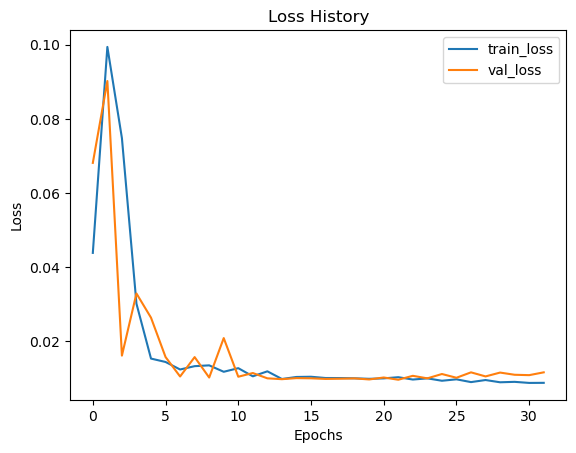

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

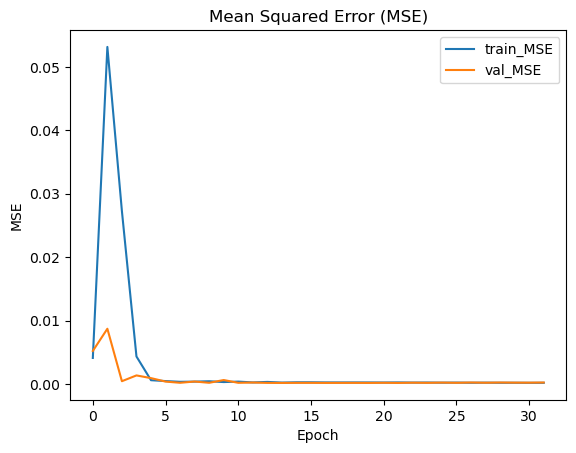

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

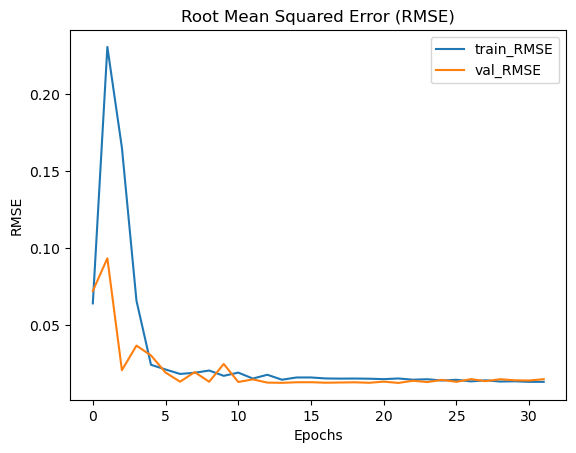

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

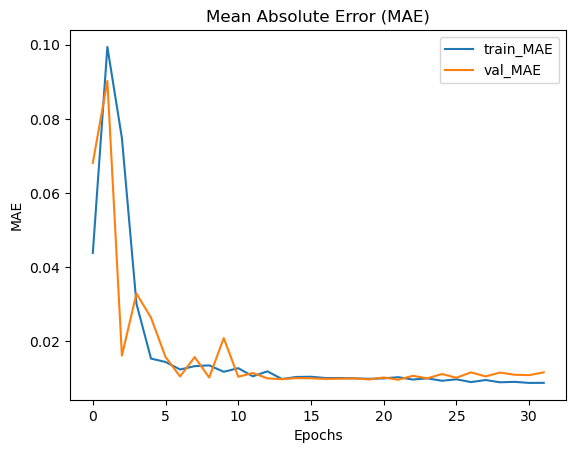

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

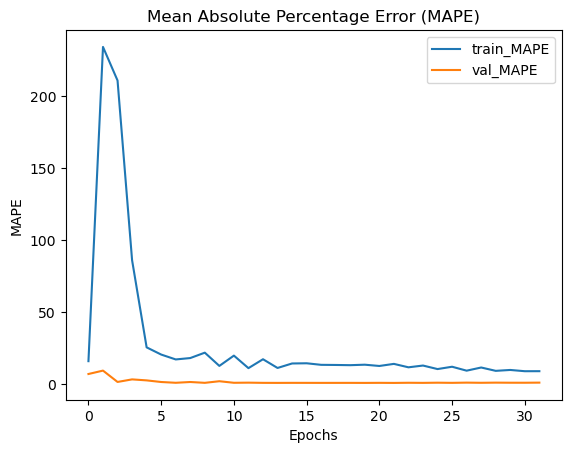

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:03:03.608125: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 1)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


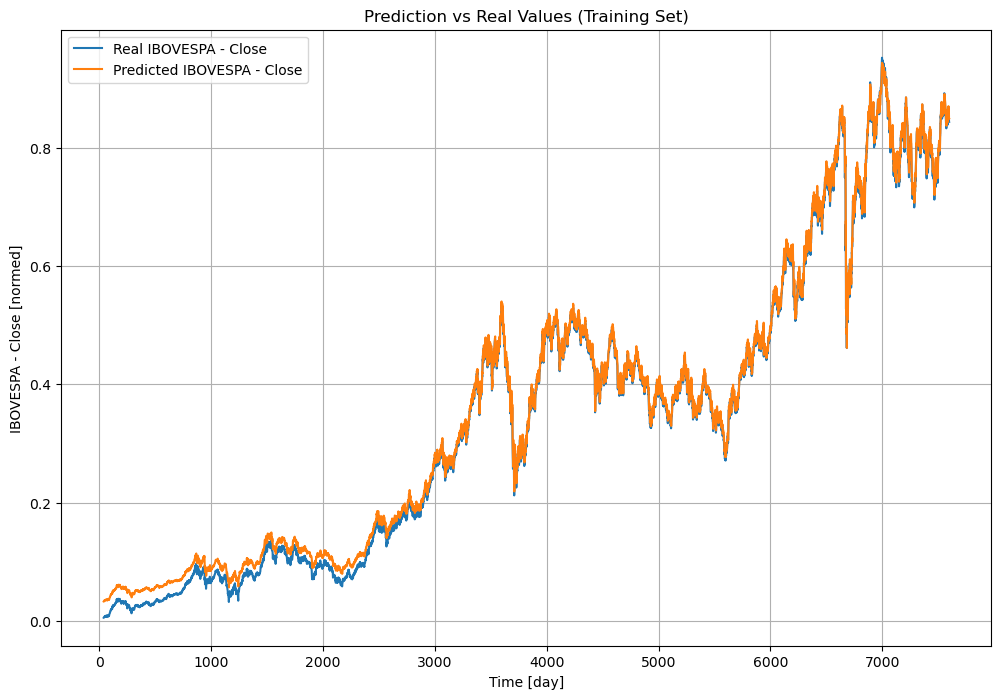

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


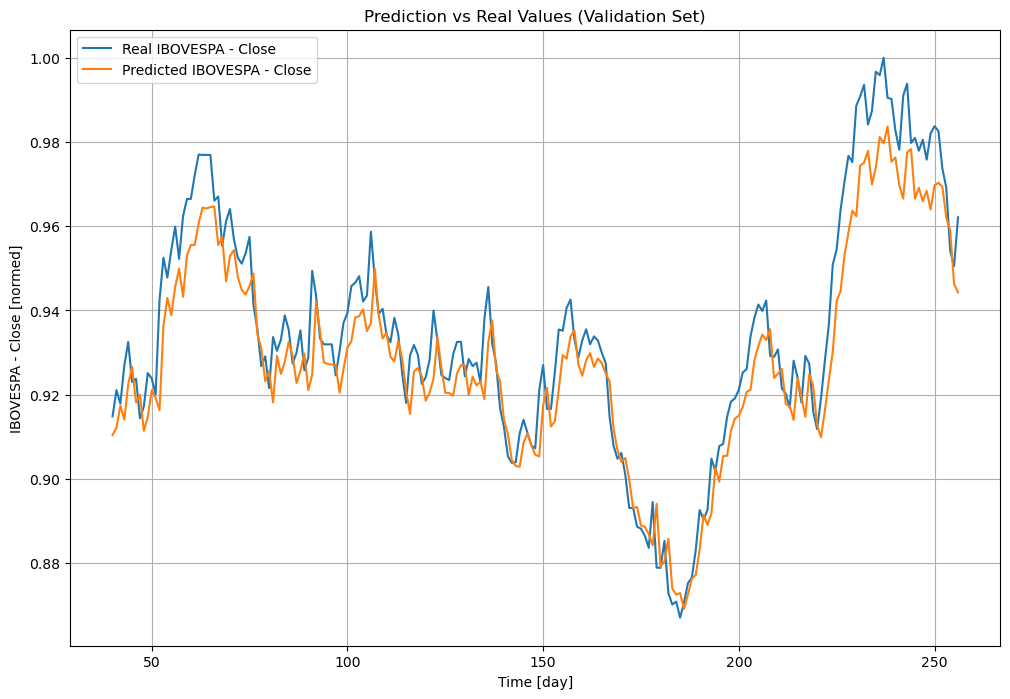

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


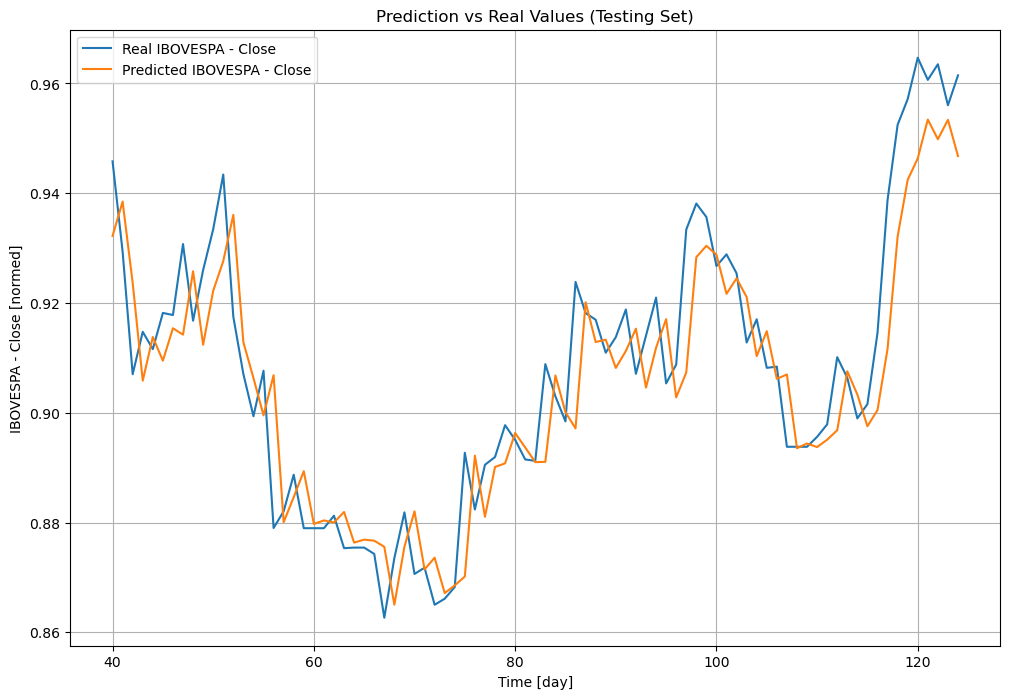

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

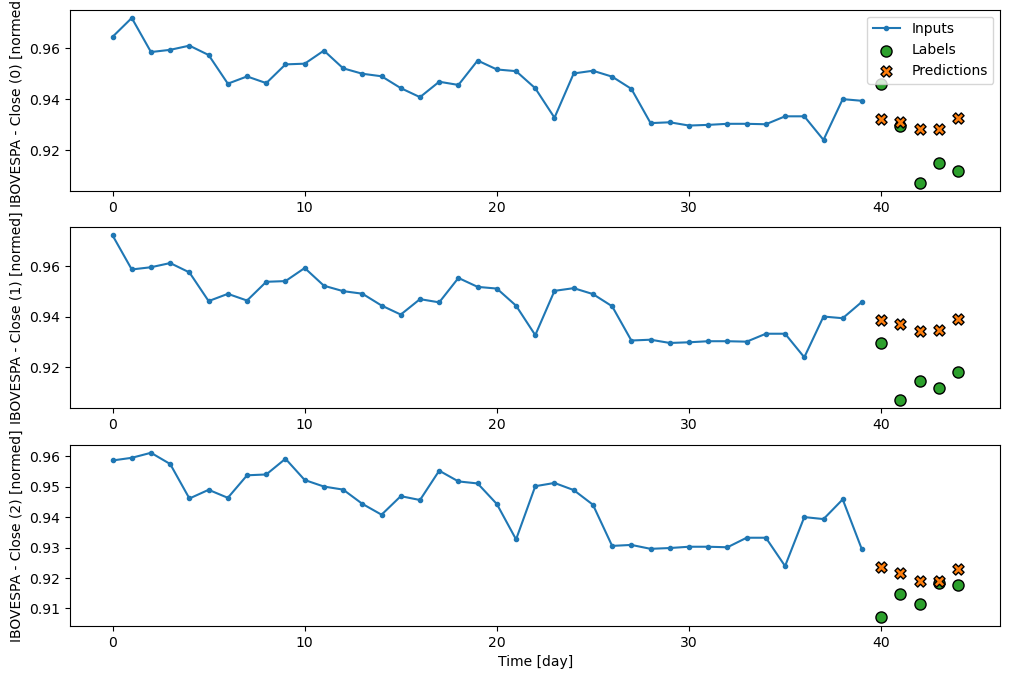

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:45s:768ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


array([[[0.93222904, 0.93222904, 0.93222904, ..., 0.93222904,
         0.93222904, 0.93222904],
        [0.9307847 , 0.9307847 , 0.9307847 , ..., 0.9307847 ,
         0.9307847 , 0.9307847 ],
        [0.9280894 , 0.9280894 , 0.9280894 , ..., 0.9280894 ,
         0.9280894 , 0.9280894 ],
        [0.92833203, 0.92833203, 0.92833203, ..., 0.92833203,
         0.92833203, 0.92833203],
        [0.9324852 , 0.9324852 , 0.9324852 , ..., 0.9324852 ,
         0.9326917 , 0.9326917 ]],

       [[0.9384855 , 0.9384855 , 0.9384855 , ..., 0.9384855 ,
         0.9384855 , 0.9384855 ],
        [0.9372506 , 0.9372506 , 0.9372506 , ..., 0.9372506 ,
         0.9372506 , 0.9372506 ],
        [0.9344604 , 0.9344604 , 0.9344604 , ..., 0.9344604 ,
         0.9344604 , 0.9344604 ],
        [0.93478453, 0.93478453, 0.93478453, ..., 0.93478453,
         0.93478453, 0.93478453],
        [0.939006  , 0.939006  , 0.939006  , ..., 0.939006  ,
         0.9392221 , 0.9392221 ]],

       [[0.9236592 , 0.9236592 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')